In [1]:
# ============================================================
# 📦 Standard Library Imports
# ============================================================
import gc
import os
import random
import time
import traceback
import warnings
from collections import Counter
import ipywidgets as widgets
widgets.IntSlider()
# ============================================================
# 📊 Core Libraries
# ============================================================
import numpy as np
import pandas as pd
from scipy import stats

# ============================================================
# 📈 Data Visualization
# ============================================================
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================
# ⚙️ Scikit-learn (ML)
# ============================================================
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import (
    AdaBoostClassifier,
    ExtraTreesClassifier,
    IsolationForest,
    RandomForestClassifier,
    VotingClassifier
)
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    cohen_kappa_score,
    confusion_matrix,
    f1_score,
    fbeta_score,
    log_loss,
    matthews_corrcoef,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve
)
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    train_test_split
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    StandardScaler
)
from sklearn.tree import DecisionTreeClassifier

# ============================================================
# 🤖 Advanced ML Libraries
# ============================================================
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler, SMOTE
from pytorch_tabnet.tab_model import TabNetClassifier
from xgboost import XGBClassifier

# ============================================================
# 🧠 Deep Learning (TensorFlow / Keras)
# ============================================================
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import (
    BatchNormalization,
    Conv1D,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    Input,
    LSTM,
    LeakyReLU,
    Reshape
)
from tensorflow.keras.metrics import Recall
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

# ============================================================
# ⚡ Spiking Neural Networks (snnTorch / PyTorch)
# ============================================================
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import Transformer, TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import DataLoader, Dataset, TensorDataset

import snntorch as snn
from snntorch import surrogate, functional as SF, utils

torch.set_num_threads(2)

# ============================================================
# 🧩 Transformer Models (Hugging Face)
# ============================================================
from transformers import (
    AutoModel,
    AutoTokenizer,
    BertModel,
    BertTokenizer,
    RobertaModel,
    RobertaTokenizer
)

print("Transformers version:", __import__('transformers').__version__)

# ============================================================
# 🛠️ Utilities
# ============================================================
from joblib import parallel_backend
from tabulate import tabulate
from tqdm.auto import tqdm

# ============================================================
# 🌍 Environment Settings & Warnings
# ============================================================
warnings.filterwarnings("ignore")
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"  # Avoid backend warnings

print("TensorFlow version:", tf.__version__)
print("GPU available:", len(tf.config.list_physical_devices('GPU')) > 0)


# Suppress TensorFlow warnings and other unnecessary warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow logging (0 = all, 3 = none)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)

Transformers version: 4.57.1
TensorFlow version: 2.16.2
GPU available: True


In [2]:
%matplotlib inline

# Preprocessing

In [3]:
data = pd.read_csv('../data/creditcard.csv')

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Train test and split

In [10]:
numeric_features = data.dtypes[data.dtypes != 'object'].index
data[numeric_features] = data[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
data = data.fillna(0)

In [11]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data.iloc[:, -1] = labelencoder.fit_transform(data.iloc[:, -1])
X = data.drop('Class', axis=1)
Y = data['Class']
Y = labelencoder.fit_transform(Y)
print("Encoded classes:", labelencoder.classes_)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.8, test_size = 0.2, random_state = 42,stratify = Y)

Encoded classes: [0. 1.]


In [12]:
X_train.shape

(227845, 30)

In [13]:
Y_test.shape

(56962,)

In [14]:
pd.Series(Y_train).value_counts()

0    227451
1       394
Name: count, dtype: int64

In [15]:
print(type(Y))
print(Y.dtype)
print(np.unique(Y))
pd.Series(Y_train).value_counts()

<class 'numpy.ndarray'>
int64
[0 1]


0    227451
1       394
Name: count, dtype: int64

## Outliers removal

In [16]:
def check_outliers(X, Y, threshold=2.7, iqr_factor=2.0):
    """
    Check if outliers exist in the dataset (X and Y) using Z-score or IQR.
    Returns True if outliers are detected in either X or Y, False otherwise.
    """
    if not isinstance(Y, pd.Series):
        Y = pd.Series(Y, index=X.index)

    # Separate normal and fraudulent transactions
    X_normal = X[Y == 0].select_dtypes(include=['number'])  # Select numeric columns
    Y_normal = Y[Y == 0]
    
    # Ensure Y is a pandas Series
    if not isinstance(Y, pd.Series):
        Y = pd.Series(Y, index=X.index)
    
    # Filter only numeric columns for X
    X_numeric = X_normal.select_dtypes(include=['number'])
    
    # Calculate Z-scores for X and Y
    z_scores_X = np.abs(stats.zscore(X_numeric))
    z_scores_Y = np.abs(stats.zscore(Y_normal))
    
    outliers_zscore_X = (z_scores_X > threshold).any().any()
    outliers_zscore_Y = (z_scores_Y > threshold).any()
    
    # Calculate IQR for X and Y
    Q1_X = X_numeric.quantile(0.25)
    Q3_X = X_numeric.quantile(0.75)
    IQR_X = Q3_X - Q1_X
    
    Q1_Y = Y.quantile(0.25)
    Q3_Y = Y.quantile(0.75)
    IQR_Y = Q3_Y - Q1_Y
    
    outliers_iqr_X = ((X_numeric < (Q1_X - iqr_factor * IQR_X)) | (X_numeric > (Q3_X + iqr_factor * IQR_X))).any().any()
    outliers_iqr_Y = ((Y_normal < (Q1_Y - iqr_factor * IQR_Y)) | (Y_normal > (Q3_Y + iqr_factor * IQR_Y))).any()
    
    return outliers_zscore_X or outliers_zscore_Y or outliers_iqr_X or outliers_iqr_Y
    
def remove_outliers(X, Y, method="auto", threshold=3, iqr_factor=1.5):
    """
    Removes outliers from normal transactions only.
    """

    if not isinstance(Y, pd.Series):
        Y = pd.Series(Y, index=X.index)

    # Separate normal and fraudulent transactions
    X_normal = X[Y == 0].select_dtypes(include=['number'])  # Select numeric columns
    Y_normal = Y[Y == 0]
    X_fraud = X[Y == 1]
    Y_fraud = Y[Y == 1]

    # Outlier removal
    if method == "auto":
        print("Automatically selecting outlier removal method...")
        if X_normal.std().mean() < threshold:
            print("Using Z-score for outlier removal...")
            X_normal_cleaned, Y_normal_cleaned = remove_outliers_using_zscore(X_normal, Y_normal, threshold)
        else:
            print("Using IQR for outlier removal...")
            X_normal_cleaned = remove_outliers_using_iqr(X_normal, iqr_factor)
            Y_normal_cleaned = Y_normal.loc[X_normal_cleaned.index]

    elif method == "zscore":
        print("Using Z-score for outlier removal...")
        X_normal_cleaned, Y_normal_cleaned = remove_outliers_using_zscore(X_normal, Y_normal, threshold)

    elif method == "iqr":
        print("Using IQR for outlier removal...")
        X_normal_cleaned = remove_outliers_using_iqr(X_normal, iqr_factor)
        Y_normal_cleaned = Y_normal.loc[X_normal_cleaned.index]

    elif method == "isolation_forest":
        print("Using Isolation Forest for outlier removal...")
        X_normal_cleaned, Y_normal_cleaned = remove_outliers_using_if(X_normal, Y_normal)

    # Reunify data
    X_cleaned = pd.concat([X_normal_cleaned, X_fraud], axis=0).sort_index()
    Y_cleaned = pd.concat([Y_normal_cleaned, Y_fraud], axis=0).sort_index()

    return X_cleaned, Y_cleaned

def remove_outliers_using_zscore(X, Y, threshold):
    """
    Removes outliers using the Z-score method.
    """
    z_scores = np.abs(stats.zscore(X))
    X_filtered = X[(z_scores < threshold).all(axis=1)]
    Y_filtered = Y.loc[X_filtered.index]
    return X_filtered, Y_filtered

def remove_outliers_using_iqr(X, iqr_factor=1.5):
    """
    Removes outliers using the IQR method.
    """
    Q1 = X.quantile(0.25)
    Q3 = X.quantile(0.75)
    IQR = Q3 - Q1
    return X[~((X < (Q1 - iqr_factor * IQR)) | (X > (Q3 + iqr_factor * IQR))).any(axis=1)].copy()

In [17]:
outliers_exist = check_outliers(X, Y)

if outliers_exist:
    print(f"Outliers detected: {outliers_exist}")
    X_filtered, y_filtered = remove_outliers(X, Y, method="auto", threshold=3.0, iqr_factor=2.0)
    print("Outliers removed.")
else:
    print("No outliers detected. Data is clean.")

print("Cleaned Features (X):")
print(X_filtered)
print("\nCleaned Target (Y):")
print(y_filtered)

Outliers detected: True
Automatically selecting outlier removal method...
Using Z-score for outlier removal...
Outliers removed.
Cleaned Features (X):
            Time        V1        V2        V3        V4        V5        V6  \
0       0.000000  0.935192  0.766490  0.881365  0.313023  0.763439  0.267669   
1       0.000000  0.978542  0.770067  0.840298  0.271796  0.766120  0.262192   
3       0.000006  0.941878  0.765304  0.868484  0.213661  0.765647  0.275559   
4       0.000012  0.938617  0.776520  0.864251  0.269796  0.762975  0.263984   
5       0.000012  0.951057  0.777393  0.857187  0.244472  0.768550  0.262721   
...          ...       ...       ...       ...       ...       ...       ...   
284800  0.999954  0.992943  0.765409  0.816674  0.262329  0.765658  0.255715   
284801  0.999959  0.960338  0.777082  0.827952  0.218901  0.773326  0.260647   
284803  0.999971  0.945845  0.766677  0.872678  0.219189  0.771561  0.273661   
284804  0.999977  0.990905  0.764080  0.781102  0

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Feature selection using TabNet

In [19]:


# Cross-validation-style feature importance aggregation
# -------------------------
# Memory cleanup
# -------------------------
def clear_memory():
    gc.collect()
    try:
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        elif getattr(torch.backends, "mps", None) is not None:
            torch.mps.empty_cache()
    except Exception:
        pass

# -------------------------
# Encode & scale
# -------------------------
X_encoded = X_filtered.copy()
y_encoded = y_filtered.copy().reset_index(drop=True)

for col in X_encoded.select_dtypes(include=["object", "category"]):
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col].astype(str))

X_scaled = pd.DataFrame(
    StandardScaler().fit_transform(X_encoded),
    columns=X_encoded.columns
).astype(np.float32)

feature_names = X_scaled.columns

# -------------------------
# Device setup
# -------------------------
device_name = (
    "mps"
    if getattr(torch.backends, "mps", None) is not None
    and torch.backends.mps.is_available()
    else "cpu"
)
print("Using device:", device_name)

# -------------------------
# Parameters
# -------------------------
subsample_size = 20000     # limit per subset
n_subsamples = max(1, X_scaled.shape[0] // subsample_size)
batch_size = 32
virtual_batch_size = 16
max_epochs = 20
patience = 5

print(f"Total dataset size: {X_scaled.shape[0]}")
print(f"Number of subsamples: {n_subsamples}")

# -------------------------
# Aggregate importances
# -------------------------
aggregated_importances = np.zeros(len(feature_names))

for i in range(n_subsamples):
    print(f"\n--- Training on subsample {i+1}/{n_subsamples} ---")

    start_idx = i * subsample_size
    end_idx = min((i + 1) * subsample_size, X_scaled.shape[0])

    X_sub = X_scaled.iloc[start_idx:end_idx].values.astype(np.float32)
    y_sub = y_encoded.iloc[start_idx:end_idx].values.astype(np.int64)

    # Randomly split the subsample into train/test
    idx = np.arange(len(X_sub))
    np.random.shuffle(idx)
    split = int(0.8 * len(idx))
    train_idx, test_idx = idx[:split], idx[split:]

    X_train_sub = X_sub[train_idx]
    y_train_sub = y_sub[train_idx]
    X_test_sub = X_sub[test_idx]
    y_test_sub = y_sub[test_idx]

    clear_memory()
    clf = TabNetClassifier(device_name=device_name)

    clf.fit(
        X_train=X_train_sub,
        y_train=y_train_sub,
        eval_set=[(X_test_sub, y_test_sub)],
        eval_metric=["accuracy"],
        max_epochs=max_epochs,
        patience=patience,
        batch_size=batch_size,
        virtual_batch_size=virtual_batch_size,
        num_workers=0
    )

    aggregated_importances += clf.feature_importances_
    clear_memory()

# -------------------------
# Average importances
# -------------------------
aggregated_importances /= n_subsamples

# -------------------------
# Select top features (cumulative importance ≥ 90%)
# -------------------------
sorted_idx = np.argsort(aggregated_importances)[::-1]
cumulative_importance = np.cumsum(aggregated_importances[sorted_idx]) / np.sum(aggregated_importances)
top_k = np.searchsorted(cumulative_importance, 0.9) + 1
top_features = np.array(feature_names)[sorted_idx][:top_k]

print(f"\nSelected top-{top_k} features based on aggregated importance ≥ 90%:")
print(top_features)

# -------------------------
# Save filtered dataset
# -------------------------
X_selected = X_scaled[top_features]
filtered_df = pd.concat([
    X_selected.reset_index(drop=True),
    y_encoded.reset_index(drop=True).rename("label")
], axis=1)
filtered_df.to_csv("filtered_dataset.csv", index=False)

print("\nSaved filtered_dataset.csv with selected top features.")
clear_memory()


Using device: mps
Total dataset size: 244647
Number of subsamples: 12

--- Training on subsample 1/12 ---
epoch 0  | loss: 0.03753 | val_0_accuracy: 0.99575 |  0:00:23s
epoch 1  | loss: 0.01484 | val_0_accuracy: 0.9985  |  0:00:47s
epoch 2  | loss: 0.01236 | val_0_accuracy: 0.998   |  0:01:11s
epoch 3  | loss: 0.018   | val_0_accuracy: 0.99675 |  0:01:34s
epoch 4  | loss: 0.0143  | val_0_accuracy: 0.99725 |  0:01:57s
epoch 5  | loss: 0.00908 | val_0_accuracy: 0.99775 |  0:02:19s
epoch 6  | loss: 0.0066  | val_0_accuracy: 0.9985  |  0:02:42s

Early stopping occurred at epoch 6 with best_epoch = 1 and best_val_0_accuracy = 0.9985

--- Training on subsample 2/12 ---
epoch 0  | loss: 0.03558 | val_0_accuracy: 0.99675 |  0:00:23s
epoch 1  | loss: 0.0156  | val_0_accuracy: 0.998   |  0:00:45s
epoch 2  | loss: 0.01038 | val_0_accuracy: 0.9965  |  0:01:07s
epoch 3  | loss: 0.0115  | val_0_accuracy: 0.99975 |  0:01:30s
epoch 4  | loss: 0.00806 | val_0_accuracy: 0.99975 |  0:01:52s
epoch 5  | lo

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, 
    y_filtered,
    train_size=0.8, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_filtered
)

# Data Augmentation with GAN

In [21]:
# Ensure y_train is a NumPy array
y_train_arr = y_train if isinstance(y_train, np.ndarray) else y_train.to_numpy()

# Indices of minority (1) and majority (0)
minority_idx = np.where(y_train_arr == 1)[0]
majority_idx = np.where(y_train_arr == 0)[0]

# Extract data
# Works whether X_train is DataFrame or NumPy array
if isinstance(X_train, np.ndarray):
    X_minority = X_train[minority_idx]
    X_majority = X_train[majority_idx]
else:
    X_minority = X_train.iloc[minority_idx]
    X_majority = X_train.iloc[majority_idx]


y_minority = y_train_arr[minority_idx]
y_majority = y_train_arr[majority_idx]

In [22]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import gc

# ======================================================
# 1. Memory-safe helper
# ======================================================
def clear_memory(device):
    gc.collect()
    try:
        if device.type == "cuda":
            torch.cuda.empty_cache()
        elif device.type == "mps" and hasattr(torch.mps, "empty_cache"):
            torch.mps.empty_cache()
    except Exception:
        pass

# ======================================================
# 2. Data preparation
# ======================================================
def prepare_data_safe(X, batch_size=8, device=torch.device("cpu")):
    if isinstance(X, np.ndarray):
        arr = X.astype(np.float32)
    elif hasattr(X, "values"):
        arr = X.values.astype(np.float32)
    else:
        arr = np.array(X, dtype=np.float32)
    tensor = torch.from_numpy(arr)
    pin_memory = device.type == "cuda"
    return DataLoader(
        TensorDataset(tensor),
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        pin_memory=pin_memory,
        persistent_workers=False
    )

# ======================================================
# 3. Models with Dropout & normalization
# ======================================================
class Generator(nn.Module):
    def __init__(self, noise_dim, latent_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 64),
            nn.LayerNorm(64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(64, 128),
            nn.LayerNorm(128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(128, latent_dim),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)


class Discriminator(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# ======================================================
# 4. Hyperparameters
# ======================================================
noise_dim = 100
latent_dim = X_minority.shape[1]
DEFAULT_BATCH = 64
EPOCHS = 30

device = torch.device("cuda" if torch.cuda.is_available()
                      else "mps" if torch.backends.mps.is_available()
                      else "cpu")
print(f"Using device: {device}")

# ======================================================
# 5. Create models and optimizers
# ======================================================
G = Generator(noise_dim, latent_dim).to(device)
D = Discriminator(latent_dim).to(device)

optim_G = torch.optim.AdamW(G.parameters(), lr=1e-4, weight_decay=1e-4, betas=(0.9, 0.999))
optim_D = torch.optim.AdamW(D.parameters(), lr=2e-4, weight_decay=1e-4, betas=(0.9, 0.999))
scheduler_G = torch.optim.lr_scheduler.CosineAnnealingLR(optim_G, T_max=EPOCHS, eta_min=1e-5)
scheduler_D = torch.optim.lr_scheduler.CosineAnnealingLR(optim_D, T_max=EPOCHS, eta_min=1e-5)
criterion = nn.BCELoss()

# ======================================================
# 6. DataLoader
# ======================================================
dataloader = prepare_data_safe(X_minority, batch_size=DEFAULT_BATCH, device=device)

# ======================================================
# 7. Training loop (with normalization, early stopping)
# ======================================================
def train_gan_safe(G, D, dataloader, optim_G, optim_D, scheduler_G, scheduler_D, device, epochs=EPOCHS, noise_dim=noise_dim):
    G.train()
    D.train()

    for epoch in range(epochs):
        epoch_loss_G, epoch_loss_D = 0.0, 0.0

        for batch_idx, (real_cpu,) in enumerate(dataloader):
            real = real_cpu.to(device)
            bsize = real.shape[0]

            real_labels = torch.full((bsize, 1), 0.9, device=device)
            fake_labels = torch.zeros((bsize, 1), device=device)

            try:
                # --- Train Discriminator ---
                optim_D.zero_grad()
                D_real = D(real)
                loss_real = criterion(D_real, real_labels)

                z = torch.randn(bsize, noise_dim, device=device) * np.random.uniform(0.8, 1.2)
                fake = G(z).detach()
                D_fake = D(fake)
                loss_fake = criterion(D_fake, fake_labels)

                D_loss = 0.5 * (loss_real + loss_fake)
                D_loss.backward()
                torch.nn.utils.clip_grad_norm_(D.parameters(), 1.0)
                optim_D.step()
                epoch_loss_D += D_loss.item()

                # --- Train Generator ---
                optim_G.zero_grad()
                z2 = torch.randn(bsize, noise_dim, device=device) * np.random.uniform(0.8, 1.2)
                fake2 = G(z2)
                D_out = D(fake2)
                adv_loss = criterion(D_out, real_labels)

                # Consistency regularization between consecutive fake batches
                if batch_idx % 2 == 0:
                    prev_noise = torch.randn_like(z2)
                    consistency_loss = torch.mean((G(z2) - G(prev_noise)) ** 2)
                else:
                    consistency_loss = torch.tensor(0.0, device=device)

                G_loss = adv_loss + 0.1 * consistency_loss
                G_loss.backward()
                torch.nn.utils.clip_grad_norm_(G.parameters(), 1.0)
                optim_G.step()
                epoch_loss_G += G_loss.item()

                del real, D_real, loss_real, z, fake, D_fake, loss_fake, D_loss
                del z2, fake2, D_out, adv_loss, consistency_loss, G_loss
                clear_memory(device)

            except RuntimeError as e:
                if "out of memory" in str(e).lower():
                    print(f"[MEMORY] skipping batch {batch_idx} due to memory error")
                    clear_memory(device)
                    continue
                else:
                    raise

        scheduler_G.step()
        scheduler_D.step()

        # Monitor sample stats every epoch
        with torch.no_grad():
            z_test = torch.randn(128, noise_dim, device=device)
            s = G(z_test)
            s = (s - s.mean(dim=0)) / (s.std(dim=0) + 1e-6)  # normalize
            s_cpu = s.cpu()
            cur_mean, cur_std = s_cpu.mean().item(), s_cpu.std().item()
            print(f"Epoch {epoch+1}/{epochs} | G_loss={epoch_loss_G:.3f} | D_loss={epoch_loss_D:.3f} | mean/std={cur_mean:.4f}/{cur_std:.4f}")
            clear_memory(device)

# ======================================================
# 8. Safe synthetic generation
# ======================================================
def generate_synthetic_safe(G, total_samples, device, batch_size=DEFAULT_BATCH):
    if total_samples <= 0:
        return np.zeros((0, latent_dim), dtype=np.float32)
    G.eval()
    pieces = []
    with torch.no_grad():
        for i in range(0, total_samples, batch_size):
            cur = min(batch_size, total_samples - i)
            z = torch.randn(cur, noise_dim, device=device)
            s = G(z)
            s = (s - s.mean(dim=0)) / (s.std(dim=0) + 1e-6)  # normalize
            pieces.append(s.cpu())
            del z, s
            clear_memory(device)
    return torch.cat(pieces, dim=0).numpy()

Using device: mps


In [23]:
print("Generating synthetic samples...")

# ======================================================
# 9. Run training
# ======================================================
train_gan_safe(G, D, dataloader, optim_G, optim_D, scheduler_G, scheduler_D, device, epochs=EPOCHS)


# ------------------ Compute target number of synthetic samples ------------------
n_majority = X_majority.shape[0] if hasattr(X_majority, "shape") else len(X_majority)
n_minority = X_minority.shape[0] if hasattr(X_minority, "shape") else len(X_minority)

target_minority = int(0.8 * n_majority)  # e.g., minority = 80% of majority
n_synth = max(0, target_minority - n_minority)

print(f"Majority: {n_majority}, Minority: {n_minority}")
print(f"Target minority (80% of majority): {target_minority}")
print(f"Will generate {n_synth} synthetic samples")

# ------------------ Generate synthetic samples safely ------------------
if n_synth > 0:
    X_synthetic = generate_synthetic_safe(G, n_synth, device, batch_size=DEFAULT_BATCH)
    y_synthetic = np.ones(X_synthetic.shape[0], dtype=np.int64)
    print(f"Generated {len(X_synthetic)} synthetic samples, shape: {X_synthetic.shape}")
else:
    X_synthetic = np.zeros((0, latent_dim), dtype=np.float32)
    y_synthetic = np.zeros(0, dtype=np.int64)
    print("No synthetic samples needed.")

Generating synthetic samples...
Epoch 1/30 | G_loss=4.921 | D_loss=6.404 | mean/std=-0.0000/0.9962
Epoch 2/30 | G_loss=4.842 | D_loss=5.464 | mean/std=0.0000/0.9962
Epoch 3/30 | G_loss=4.809 | D_loss=4.707 | mean/std=0.0000/0.9962
Epoch 4/30 | G_loss=4.772 | D_loss=4.235 | mean/std=0.0000/0.9962
Epoch 5/30 | G_loss=4.766 | D_loss=4.085 | mean/std=0.0000/0.9962
Epoch 6/30 | G_loss=4.762 | D_loss=4.088 | mean/std=0.0000/0.9962
Epoch 7/30 | G_loss=4.766 | D_loss=4.064 | mean/std=0.0000/0.9962
Epoch 8/30 | G_loss=4.785 | D_loss=4.026 | mean/std=-0.0000/0.9962
Epoch 9/30 | G_loss=4.831 | D_loss=4.008 | mean/std=-0.0000/0.9962
Epoch 10/30 | G_loss=4.899 | D_loss=4.018 | mean/std=0.0000/0.9962
Epoch 11/30 | G_loss=4.943 | D_loss=3.956 | mean/std=0.0000/0.9962
Epoch 12/30 | G_loss=4.985 | D_loss=3.995 | mean/std=0.0000/0.9962
Epoch 13/30 | G_loss=4.985 | D_loss=3.970 | mean/std=-0.0000/0.9962
Epoch 14/30 | G_loss=4.994 | D_loss=3.931 | mean/std=0.0000/0.9962
Epoch 15/30 | G_loss=5.009 | D_loss

In [24]:
# ------------------ Convert to NumPy arrays if needed ------------------
if not isinstance(X_train, np.ndarray):
    X_train_np = X_train.values.astype(np.float32)
else:
    X_train_np = X_train.astype(np.float32)

if not isinstance(y_train, np.ndarray):
    y_train_np = y_train.values.astype(np.int64)
else:
    y_train_np = y_train.astype(np.int64)

# ------------------ Combine with synthetic samples ------------------
X_train_balanced = np.vstack([X_train_np, X_synthetic])
y_train_balanced = np.hstack([y_train_np, y_synthetic])

# ------------------ Shuffle the balanced dataset ------------------
perm = np.random.permutation(len(X_train_balanced))
X_train_balanced = X_train_balanced[perm]
y_train_balanced = y_train_balanced[perm]

# ------------------ Print final statistics ------------------
n_minority_final = np.sum(y_train_balanced == 1)
n_majority_final = np.sum(y_train_balanced == 0)
print(f"Final balanced training set: {len(X_train_balanced)} samples "
      f"({n_minority_final} minority, {n_majority_final} majority)")


Final balanced training set: 351581 samples (156258 minority, 195323 majority)


In [25]:
# Combine features and labels into a single DataFrame
balanced_df = pd.DataFrame(X_train_balanced)
balanced_df["label"] = y_train_balanced  # add the target column

# Save to CSV
balanced_df.to_csv("balanced_training_dataset.csv", index=False)

print("Balanced dataset saved as 'balanced_training_dataset.csv'")

Balanced dataset saved as 'balanced_training_dataset.csv'


# Prepare the Latent Dataset

In [26]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTEENN

# ===============================
# Define NumpyDataset Class
# ===============================
class NumpyDataset(Dataset):
    """Dataset that keeps NumPy arrays in memory and converts mini-batches to tensors."""
    def __init__(self, X, y):
        self.X = np.asarray(X, dtype=np.float32)
        self.y = np.asarray(y, dtype=np.int64).ravel()  # ensure 1D

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = torch.from_numpy(self.X[idx])
        y = torch.tensor(self.y[idx], dtype=torch.long)
        return x, y


# ===============================
# Step 1: GAN Data Augmentation (No AE encoding)
# ===============================

# ⚠️ Replace these with your actual variables
# X_train, X_test, y_train, y_test → your original split
# X_synthetic, y_synthetic → your GAN-generated samples

# Example dummy placeholders if needed:
# X_train = np.random.rand(1000, 30)
# y_train = np.random.randint(0, 2, 1000)
# X_synthetic = np.random.rand(200, 30)
# y_synthetic = np.ones(200)

# ------------------ Convert y_train to NumPy ------------------
if not isinstance(y_train, np.ndarray):
    y_train_np = y_train.values.astype(np.int64)
else:
    y_train_np = y_train.astype(np.int64)

# ------------------ Combine with synthetic samples ------------------
X_train_balanced = np.vstack([X_train, X_synthetic])
y_train_balanced = np.hstack([y_train_np, y_synthetic])

# ------------------ Shuffle the balanced dataset ------------------
perm = np.random.permutation(len(X_train_balanced))
X_train_balanced = X_train_balanced[perm]
y_train_balanced = y_train_balanced[perm]

print(f"✅ Final balanced training set: {len(X_train_balanced)} samples "
      f"({np.sum(y_train_balanced==1)} minority, {np.sum(y_train_balanced==0)} majority)")

# ===============================
# Step 2: Compare Additional Sampling Techniques on GAN-Enhanced Data
# ===============================
X_train_sampler, X_val_sampler, y_train_sampler, y_val_sampler = train_test_split(
    X_train_balanced, y_train_balanced,
    test_size=0.2,
    random_state=42,
    stratify=y_train_balanced
)

print(f"\nClass distribution for sampler comparison: {np.bincount(y_train_sampler)}")

# Dynamically set sampling ratio (avoid over-balancing already balanced data)
class_counts = np.bincount(y_train_sampler)
minority_ratio = class_counts.min() / class_counts.max()

# Only rebalance up to 1.0 if minority < majority
sampling_fraction = 1.0 if minority_ratio < 0.8 else 1.0

# ------------------ Define samplers ------------------
samplers = {
    "SMOTE": SMOTE(sampling_strategy=sampling_fraction, random_state=42),
    "ROS": RandomOverSampler(sampling_strategy=sampling_fraction, random_state=42),
}

# Use SMOTE-ENN only if imbalance exists
if minority_ratio < 0.9:
    samplers["SMOTE-ENN"] = SMOTEENN(sampling_strategy="auto", random_state=42)

# ------------------ Evaluate samplers ------------------
results = {}
print("\n🔍 Comparing sampling techniques on GAN-enhanced data using Random Forest...")

for name, sampler in samplers.items():
    print(f"\nTesting {name}...")
    try:
        X_res, y_res = sampler.fit_resample(X_train_sampler, y_train_sampler)
    except ValueError as e:
        print(f"⚠️ Skipping {name} due to error: {e}")
        continue

    clf = RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        class_weight="balanced_subsample",
        random_state=42,
        n_jobs=-1
    )
    clf.fit(X_res, y_res)
    y_pred = clf.predict(X_val_sampler)

    report = classification_report(y_val_sampler, y_pred, output_dict=True, zero_division=0)
    results[name] = report.get("1", {"precision": 0, "recall": 0, "f1-score": 0})

# ------------------ Compare results ------------------
comparison = pd.DataFrame(results).T
print("\n📊 Minority Class Metrics Comparison:")
print(comparison[["precision", "recall", "f1-score"]])

# ------------------ Select best sampler ------------------
best_sampler_name = comparison["f1-score"].idxmax()
best_sampler = samplers[best_sampler_name]
print(f"\n✅ Best sampler selected: {best_sampler_name} (F1={comparison.loc[best_sampler_name, 'f1-score']:.4f})")

# ===============================
# Step 3: Apply Best Sampler to Full GAN-Enhanced Dataset
# ===============================
print(f"\nApplying {best_sampler_name} to the full GAN-augmented dataset...")
X_train_balanced, y_train_balanced = best_sampler.fit_resample(X_train_balanced, y_train_balanced)

print(f"\nFinal balanced dataset generated with {best_sampler_name}:")
print(f"  → Total samples: {len(X_train_balanced)}")
print(f"  → Class 0: {sum(y_train_balanced==0)} | Class 1: {sum(y_train_balanced==1)}")


✅ Final balanced training set: 351581 samples (156258 minority, 195323 majority)

Class distribution for sampler comparison: [156258 125006]

🔍 Comparing sampling techniques on GAN-enhanced data using Random Forest...

Testing SMOTE...

Testing ROS...

Testing SMOTE-ENN...

📊 Minority Class Metrics Comparison:
           precision    recall  f1-score
SMOTE       0.996731  0.995200  0.995965
ROS         0.996729  0.994560  0.995644
SMOTE-ENN   0.996919  0.993984  0.995450

✅ Best sampler selected: SMOTE (F1=0.9960)

Applying SMOTE to the full GAN-augmented dataset...

Final balanced dataset generated with SMOTE:
  → Total samples: 390646
  → Class 0: 195323 | Class 1: 195323


In [27]:
# ===============================
# Step 4: Final Train / Val / Test Split (60/20/20)
# ===============================

# Use the latest available dataset
# (replace X_train_balanced/y_train_balanced with your actual dataset if named differently)
X_source = X_train_balanced if 'X_train_balanced' in locals() else X_train
y_source = y_train_balanced if 'y_train_balanced' in locals() else y_train

print(f"Using dataset: {X_source.shape}, labels: {y_source.shape}")

# Perform split
X_train_final, X_temp, y_train_final, y_temp = train_test_split(
    X_source, y_source,
    test_size=0.4,           # keep 60% for training
    random_state=42,
    stratify=y_source
)

X_val_final, X_test_final, y_val_final, y_test_final = train_test_split(
    X_temp, y_temp,
    test_size=0.5,           # split remaining 40% equally (20% val, 20% test)
    random_state=42,
    stratify=y_temp
)

print("\n✅ Final Data Split (60/20/20):")
print(f"  → Training set: {X_train_final.shape} ({np.bincount(y_train_final)})")
print(f"  → Validation set: {X_val_final.shape} ({np.bincount(y_val_final)})")
print(f"  → Test set: {X_test_final.shape} ({np.bincount(y_test_final)})")


Using dataset: (390646, 24), labels: (390646,)

✅ Final Data Split (60/20/20):
  → Training set: (234387, 24) ([117193 117194])
  → Validation set: (78129, 24) ([39065 39064])
  → Test set: (78130, 24) ([39065 39065])


# Adversarial training to improve security

Using device: mps
Dataset shapes - Train: (234387, 24), Val: (78129, 24), Test: (78130, 24)
Starting pipeline with hybrid PGD-DeepFool training...
Dataset shapes - Train: (234387, 24), Val: (78129, 24), Test: (78130, 24)
Training classical models...
Classical models trained.

[Optimization] Starting Grid Search for Soft Voting Classifier weights...
Fitting 3 folds for each of 11 candidates, totalling 33 fits
  [Optimization] Best Weights: [1, 3, 1, 1, 1]
  [Optimization] Best CV F1 Score: 0.9825
Optimized Voting Classifier trained.
Training meta model (clean)...
 meta epoch 1 loss 0.091064 val_auc 0.999630
 meta epoch 2 loss 0.021331 val_auc 0.999669
 meta epoch 3 loss 0.018488 val_auc 0.999690
 meta epoch 4 loss 0.017312 val_auc 0.999696
 meta epoch 5 loss 0.016397 val_auc 0.999699
 meta epoch 6 loss 0.015998 val_auc 0.999698
 meta epoch 7 loss 0.015289 val_auc 0.999711
 meta epoch 8 loss 0.015194 val_auc 0.999714
 meta epoch 9 loss 0.014803 val_auc 0.999716
 meta epoch 10 loss 0.0148

Generating fgsm:   0%|          | 0/79 [00:00<?, ?it/s]

Generating bim:   0%|          | 0/79 [00:00<?, ?it/s]

Generating pgd:   0%|          | 0/79 [00:00<?, ?it/s]

Generating mim:   0%|          | 0/79 [00:00<?, ?it/s]

Generating cw:   0%|          | 0/625 [00:00<?, ?it/s]

Generating deepfool:   0%|          | 0/625 [00:00<?, ?it/s]

Generating hybrid_pgd_deepfool:   0%|          | 0/79 [00:00<?, ?it/s]

Fine-tuning meta on adversarial stacking features...
 meta adv finetune epoch 1 loss 1.290377
 meta adv finetune epoch 2 loss 0.663294
 meta adv finetune epoch 3 loss 0.406200
 meta adv finetune epoch 4 loss 0.339550
 meta adv finetune epoch 5 loss 0.316685
 meta adv finetune epoch 6 loss 0.307788
 meta adv finetune epoch 7 loss 0.297491
 meta adv finetune epoch 8 loss 0.289234
 meta adv finetune epoch 9 loss 0.292782
 meta adv finetune epoch 10 loss 0.290231
 meta adv finetune epoch 11 loss 0.290302
 meta adv finetune epoch 12 loss 0.289938
 meta adv finetune epoch 13 loss 0.281382
 meta adv finetune epoch 14 loss 0.286738
 meta adv finetune epoch 15 loss 0.281125
 meta adv finetune epoch 16 loss 0.277745
 meta adv finetune epoch 17 loss 0.279492
 meta adv finetune epoch 18 loss 0.279712
 meta adv finetune epoch 19 loss 0.278160
 meta adv finetune epoch 20 loss 0.275105
 meta adv finetune epoch 21 loss 0.276048
 meta adv finetune epoch 22 loss 0.276514
 meta adv finetune epoch 23 loss

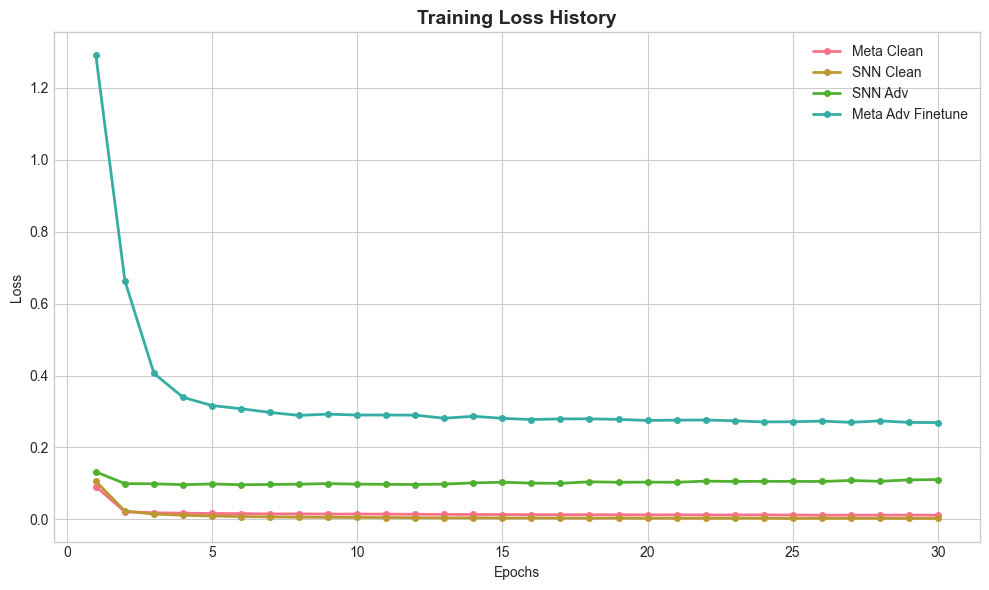

✅ Loss graph saved to security_evaluation_results/training_loss_history.png

Evaluating classical_dt ...

Evaluating classical_rf ...

Evaluating classical_et ...

Evaluating classical_ada ...

Evaluating classical_xgb ...

Evaluating voting ...

Evaluating snn_transformer_clean ...


Generating fgsm:   0%|          | 0/40 [00:00<?, ?it/s]

Generating bim:   0%|          | 0/40 [00:00<?, ?it/s]

Generating pgd:   0%|          | 0/40 [00:00<?, ?it/s]

Generating mim:   0%|          | 0/40 [00:00<?, ?it/s]

Generating cw:   0%|          | 0/625 [00:00<?, ?it/s]

Generating deepfool:   0%|          | 0/625 [00:00<?, ?it/s]


Evaluating snn_transformer_adv ...


Generating fgsm:   0%|          | 0/40 [00:00<?, ?it/s]

Generating bim:   0%|          | 0/40 [00:00<?, ?it/s]

Generating pgd:   0%|          | 0/40 [00:00<?, ?it/s]

Generating mim:   0%|          | 0/40 [00:00<?, ?it/s]

Generating cw:   0%|          | 0/625 [00:00<?, ?it/s]

Generating deepfool:   0%|          | 0/625 [00:00<?, ?it/s]


Evaluating meta_snn_transformer_clean ...


Generating fgsm:   0%|          | 0/306 [00:00<?, ?it/s]

Generating bim:   0%|          | 0/306 [00:00<?, ?it/s]

Generating pgd:   0%|          | 0/306 [00:00<?, ?it/s]

Generating mim:   0%|          | 0/306 [00:00<?, ?it/s]

Generating cw:   0%|          | 0/4884 [00:00<?, ?it/s]

Generating deepfool:   0%|          | 0/4884 [00:00<?, ?it/s]


Evaluating meta_snn_transformer_adv ...


Generating fgsm:   0%|          | 0/306 [00:00<?, ?it/s]

Generating bim:   0%|          | 0/306 [00:00<?, ?it/s]

Generating pgd:   0%|          | 0/306 [00:00<?, ?it/s]

Generating mim:   0%|          | 0/306 [00:00<?, ?it/s]

Generating cw:   0%|          | 0/4884 [00:00<?, ?it/s]

Generating deepfool:   0%|          | 0/4884 [00:00<?, ?it/s]


FINAL SUMMARY


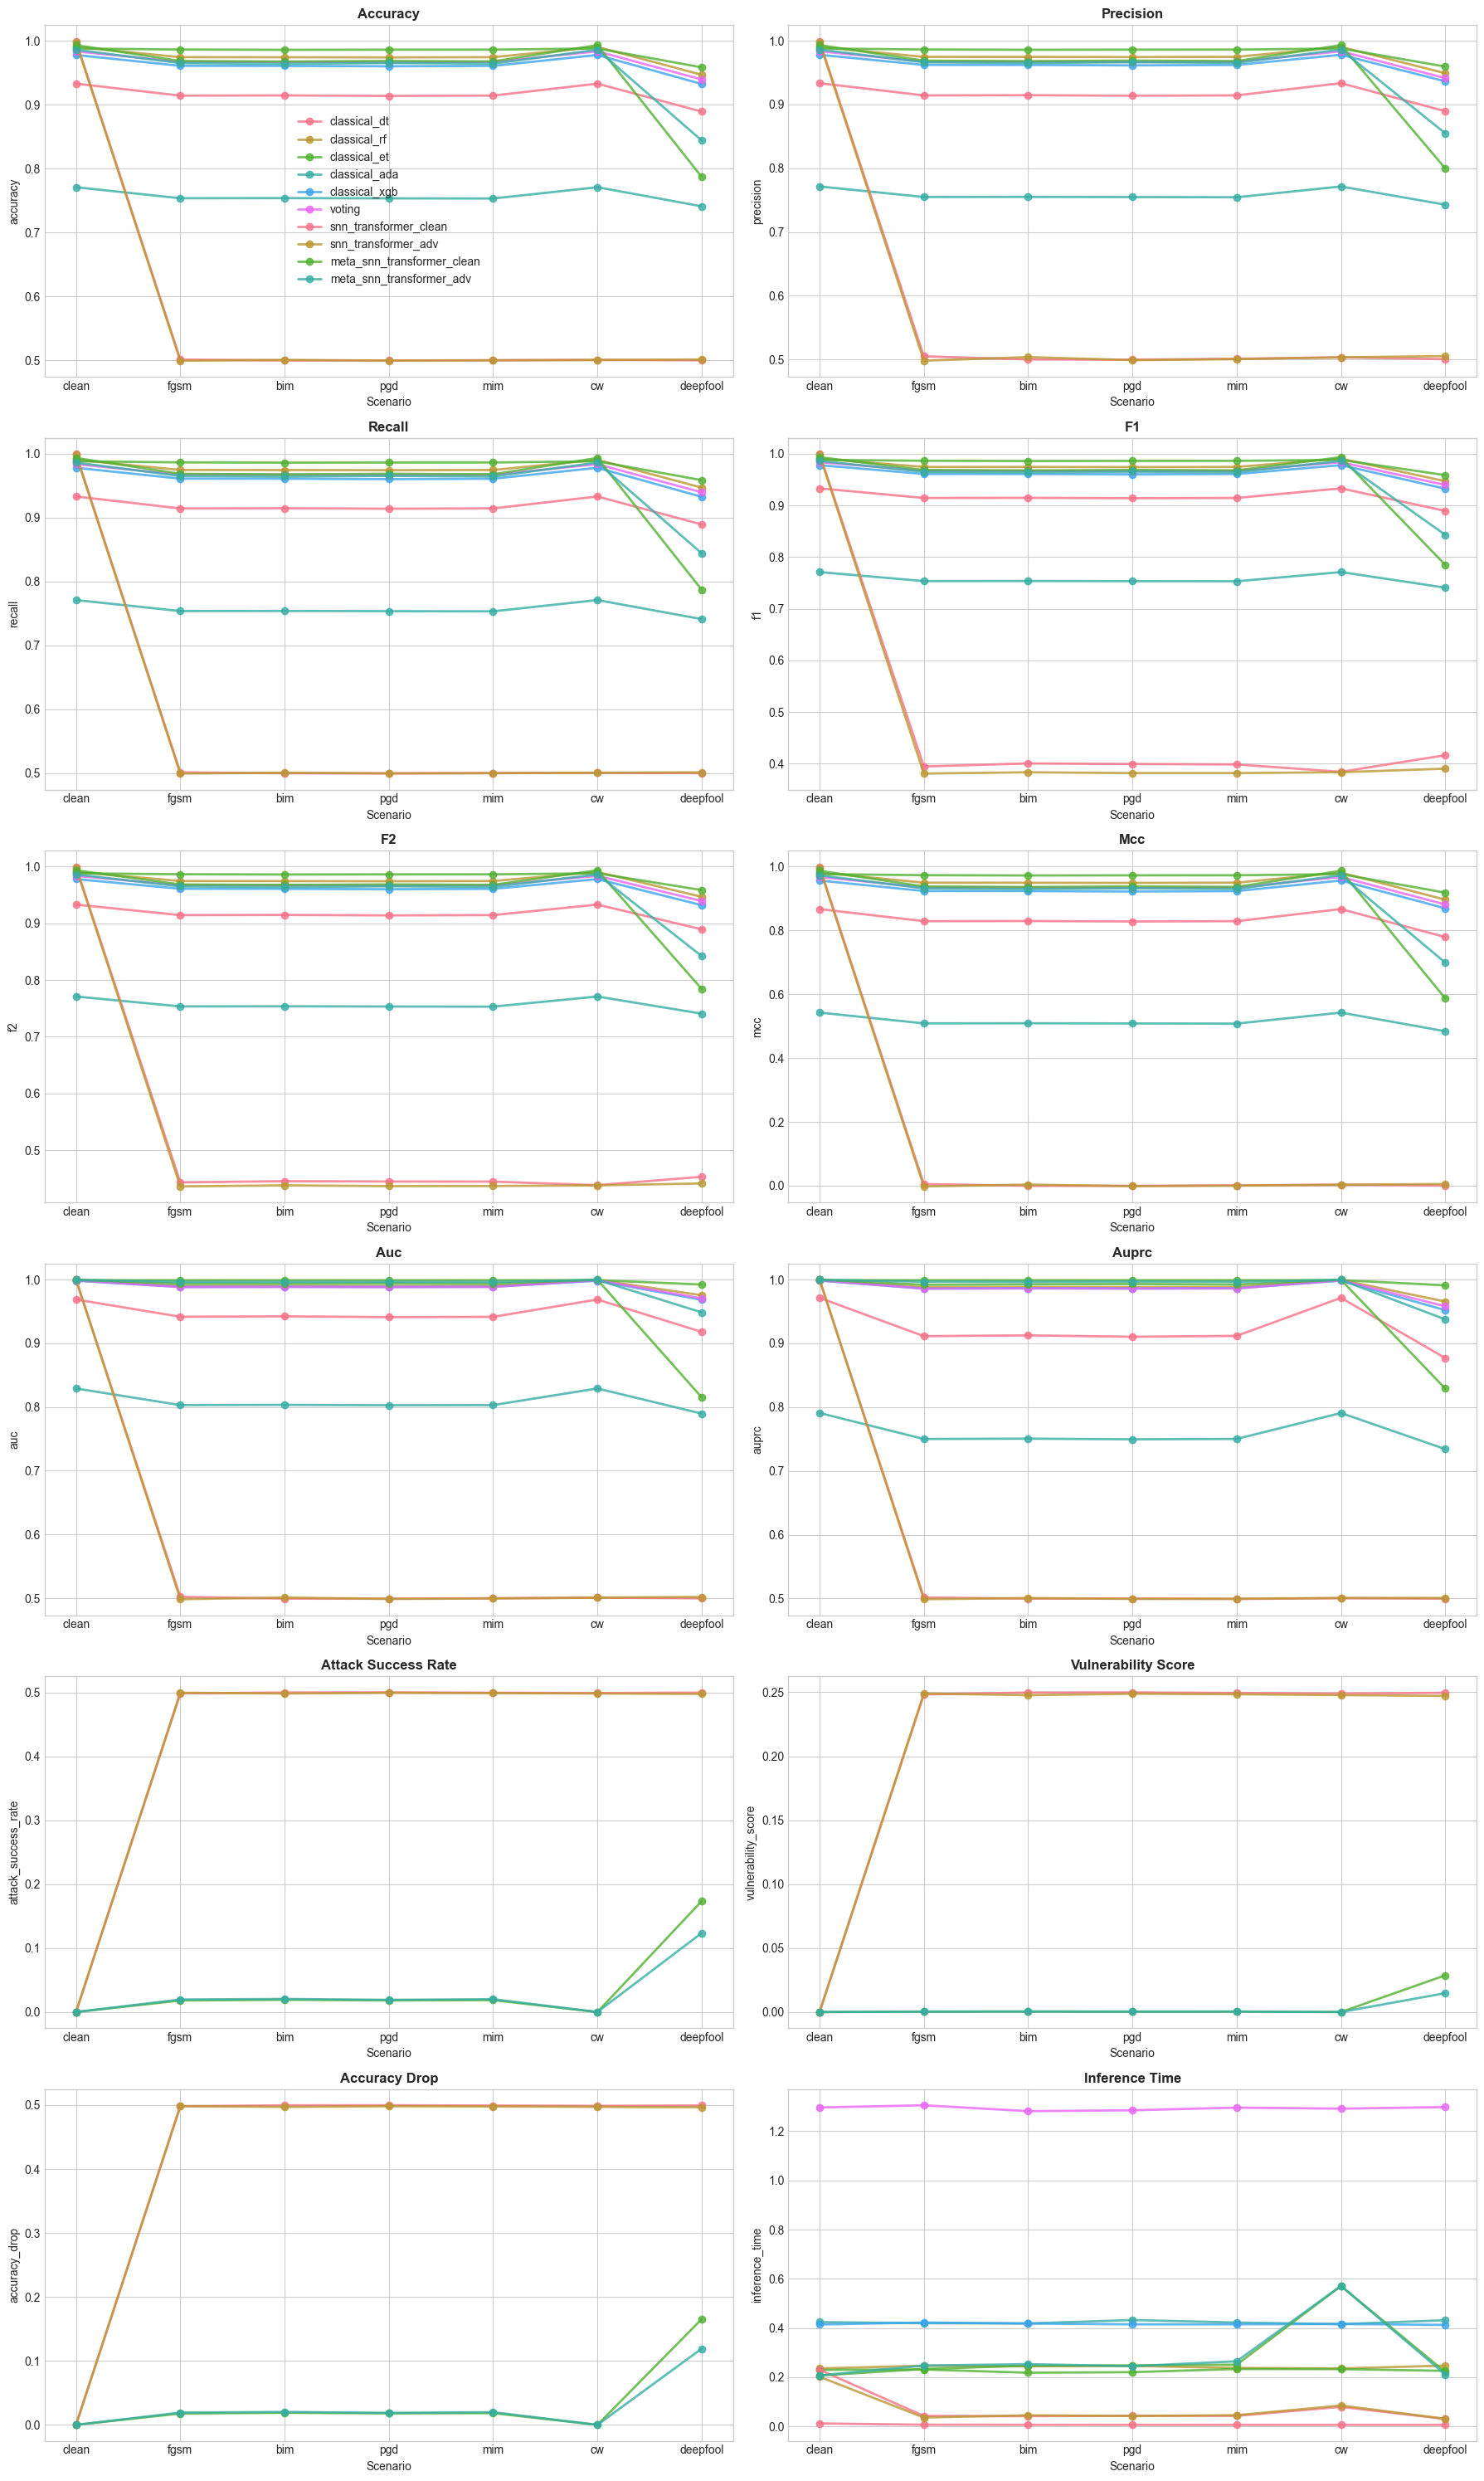

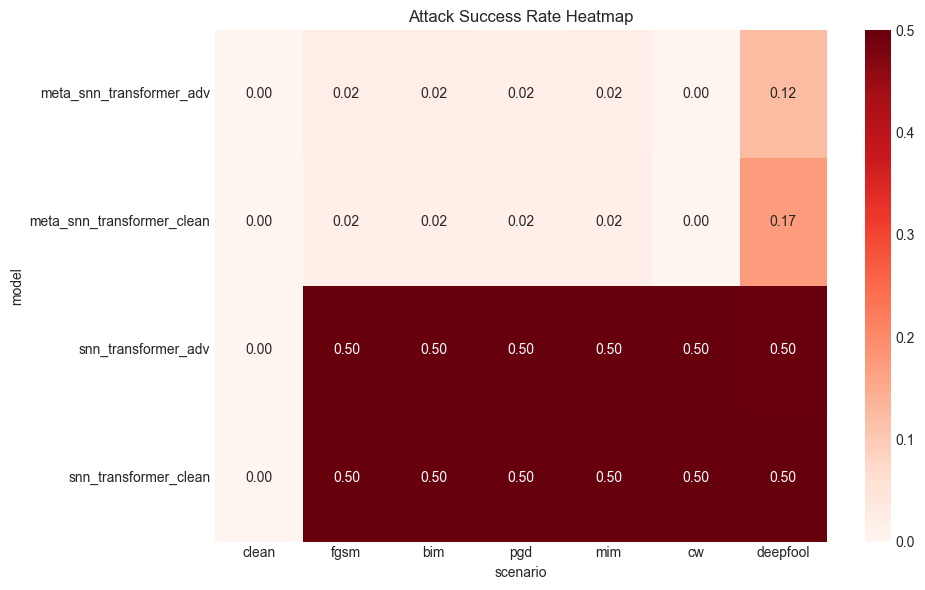

✅ Visualizations saved to security_evaluation_results
classical_dt                   | clean      | acc 0.9330 | f1 0.9330 | mcc 0.8666 | auc 0.9687 | inference_time 0.0117s
classical_dt                   | fgsm       | acc 0.9143 | f1 0.9143 | mcc 0.8286 | auc 0.9417 | inference_time 0.0065s
classical_dt                   | bim        | acc 0.9146 | f1 0.9146 | mcc 0.8292 | auc 0.9423 | inference_time 0.0062s
classical_dt                   | pgd        | acc 0.9139 | f1 0.9139 | mcc 0.8278 | auc 0.9411 | inference_time 0.0061s
classical_dt                   | mim        | acc 0.9144 | f1 0.9144 | mcc 0.8287 | auc 0.9415 | inference_time 0.0060s
classical_dt                   | cw         | acc 0.9330 | f1 0.9330 | mcc 0.8666 | auc 0.9687 | inference_time 0.0060s
classical_dt                   | deepfool   | acc 0.8893 | f1 0.8893 | mcc 0.7789 | auc 0.9179 | inference_time 0.0060s
classical_rf                   | clean      | acc 0.9905 | f1 0.9905 | mcc 0.9809 | auc 0.9995 | inference

In [28]:
# robust_evaluation_pipeline_final_complete.py
"""
Complete robust adversarial evaluation pipeline
- Ultra-robust against NaN results
- Ready to run with any dataset
- Comprehensive error handling
- Hybrid PGD-DeepFool adversarial training
- 30% Dropout implemented in SNNTransformer
- Optimized Soft Voting with Grid Search
- ADDED: Time Evaluation Metrics (Inference Time, Throughput)
- ADDED: MCC (Matthews Correlation Coefficient) Metric
- ADDED: Training Loss History Visualization
- FIXED: Summary Table Display
"""

import os
import gc
import traceback
from dataclasses import dataclass, field
from typing import List, Dict, Any, Optional, Tuple
import hashlib
import time
import copy
import math

import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, fbeta_score, roc_auc_score, 
    precision_score, recall_score, average_precision_score, 
    confusion_matrix, matthews_corrcoef  # <--- ADDED MCC IMPORT
)
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

# Optional XGBoost
try:
    from xgboost import XGBClassifier
except Exception:
    XGBClassifier = None

# Optional resource limiting
try:
    import resource

    def set_memory_limits(max_bytes: int = 4 * 1024**3):
        try:
            soft, hard = resource.getrlimit(resource.RLIMIT_AS)
            resource.setrlimit(resource.RLIMIT_AS, (max_bytes, hard))
            print(f"[INFO] memory soft limit set to {max_bytes} bytes")
        except Exception as e:
            print(f"[WARN] set_memory_limits failed: {e}")
except Exception:
    def set_memory_limits(max_bytes: int = 4 * 1024**3):
        pass

# Environment safety
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"
torch.set_num_threads(1)
torch.set_default_dtype(torch.float32)

# Setup plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")


@dataclass
class TrainingConfig:
    epochs: int = 30
    batch_size: int = 128
    lr: float = 1e-3
    attack_type: str = "hybrid_pgd_deepfool"
    attack_params: Dict[str, Any] = field(default_factory=lambda: {
        "epsilon": 0.05, 
        "alpha": 0.01, 
        "iters": 8,
        "deepfool_iters": 10,
        "hybrid_ratio": 0.5
    })


@dataclass
class PipelineConfig:
    training: TrainingConfig = field(default_factory=TrainingConfig)
    max_adv_samples: Optional[int] = 10000
    expensive_attack_batch_size: int = 16
    enable_memory_limits: bool = False
    memory_limit_bytes: int = 4 * 1024**3
    output_dir: str = "security_evaluation_results" # Directory for plots/results


def choose_device() -> torch.device:
    try:
        if torch.cuda.is_available():
            return torch.device("cuda")
        if getattr(torch.backends, "mps", None) is not None and torch.backends.mps.is_available():
            return torch.device("mps")
    except Exception:
        pass
    return torch.device("cpu")


device = choose_device()
print("Using device:", device)


def clear_memory():
    gc.collect()
    try:
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
    except Exception:
        pass


def to_numpy(x: torch.Tensor) -> np.ndarray:
    if isinstance(x, torch.Tensor):
        return x.detach().cpu().numpy()
    return np.asarray(x)


# ======================================================================================
# IMPROVED METRICS CALCULATION (WITH MCC)
# ======================================================================================

def calculate_attack_success_metrics(y_true_clean: np.ndarray, y_pred_clean: np.ndarray, y_pred_adv: np.ndarray) -> Dict[str, float]:
    """Calculate Attack Success Rate, Vulnerability Score, and Accuracy Drop."""
    try:
        if len(y_true_clean) == 0:
            return {"attack_success_rate": 0.0, "vulnerability_score": 0.0, "accuracy_drop": 0.0}
        
        clean_acc = accuracy_score(y_true_clean, y_pred_clean)
        adv_acc = accuracy_score(y_true_clean, y_pred_adv)
        
        # ASR: % of correctly classified clean samples that flipped
        correct_clean_mask = (y_pred_clean == y_true_clean)
        if np.sum(correct_clean_mask) > 0:
            attack_success_rate = np.mean(y_pred_adv[correct_clean_mask] != y_true_clean[correct_clean_mask])
        else:
            attack_success_rate = 0.0
            
        accuracy_drop = max(0.0, clean_acc - adv_acc)
        vulnerability_score = attack_success_rate * accuracy_drop
        
        return {
            "attack_success_rate": float(attack_success_rate),
            "vulnerability_score": float(vulnerability_score),
            "accuracy_drop": float(accuracy_drop)
        }
    except Exception as e:
        print(f"[WARN] Attack metrics failed: {e}")
        return {"attack_success_rate": 0.0, "vulnerability_score": 0.0, "accuracy_drop": 0.0}


def safe_metrics(y_true: np.ndarray, y_pred: np.ndarray, probs: np.ndarray) -> Dict[str, float]:
    """Calculate all standard ML metrics safely, including MCC."""
    try:
        if len(y_true) == 0:
            return {k: 0.0 for k in ['accuracy', 'precision', 'recall', 'f1', 'f2', 'mcc', 'auc', 'auprc']}
        
        # Binary vs Multiclass handling
        is_multiclass = len(np.unique(y_true)) > 2
        
        # 1. Standard Metrics
        acc = float(accuracy_score(y_true, y_pred))
        prec = float(precision_score(y_true, y_pred, average='weighted', zero_division=0))
        rec = float(recall_score(y_true, y_pred, average='weighted', zero_division=0))
        f1 = float(f1_score(y_true, y_pred, average='weighted', zero_division=0))
        f2 = float(fbeta_score(y_true, y_pred, beta=2, average='weighted', zero_division=0))
        
        # --- ADDED MCC ---
        try:
            mcc = float(matthews_corrcoef(y_true, y_pred))
        except Exception:
            mcc = 0.0
        
        # 2. Probabilistic Metrics (AUC / AUPRC)
        auc = 0.5
        auprc = 0.0
        
        # Prepare probabilities for metrics
        if not is_multiclass:
            # For binary, sklearn expects shape (n_samples,) for the positive class
            if probs.ndim == 2 and probs.shape[1] == 2:
                probs = probs[:, 1]
        
        try:
            if is_multiclass:
                auc = float(roc_auc_score(y_true, probs, multi_class='ovr', average='weighted'))
            else:
                auc = float(roc_auc_score(y_true, probs))
                auprc = float(average_precision_score(y_true, probs))
        except Exception:
            pass # Keep default 0.5/0.0 if calculation fails

        return {
            "accuracy": acc, "precision": prec, "recall": rec, 
            "f1": f1, "f2": f2, "mcc": mcc, "auc": auc, "auprc": auprc
        }
    except Exception as e:
        print(f"[WARN] Metrics failed: {e}")
        return {k: 0.0 for k in ['accuracy', 'precision', 'recall', 'f1', 'f2', 'mcc', 'auc', 'auprc']}


# ======================================================================================
# VISUALIZATION (WITH MCC AND LOSS)
# ======================================================================================

def plot_training_loss_history(loss_history_dict: Dict[str, List[float]], output_dir: str):
    """
    Plots the training loss curves for different training phases.
    """
    try:
        plt.figure(figsize=(10, 6))
        
        for name, losses in loss_history_dict.items():
            if losses and len(losses) > 0:
                plt.plot(range(1, len(losses) + 1), losses, marker='o', label=name, linewidth=2, markersize=4)

        plt.title("Training Loss History", fontsize=14, fontweight='bold')
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        #plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(f'{output_dir}/training_loss_history.png', dpi=300)
        plt.show()
        plt.close()
        print(f"✅ Loss graph saved to {output_dir}/training_loss_history.png")
    except Exception as e:
        print(f"Loss plotting failed: {e}")


def create_comprehensive_visualizations(results: Dict[str, Dict[str, Any]], output_dir: str, attack_types: List[str]):
    """
    Generates line plots for ALL requested metrics and an ASR heatmap.
    """
    try:
        os.makedirs(output_dir, exist_ok=True)
        
        # Flatten results for DataFrame
        data = []
        for model, scenarios in results.items():
            for scenario, metrics in scenarios.items():
                row = {'model': model, 'scenario': scenario}
                row.update(metrics)
                data.append(row)
        df = pd.DataFrame(data)
        
        # Metrics to plot as line graphs (Added 'mcc')
        metrics_list = [
            'accuracy', 'precision', 'recall', 'f1', 'f2', 'mcc',
            'auc', 'auprc', 'attack_success_rate', 'vulnerability_score', 
            'accuracy_drop', 'inference_time'
        ]
        
        scenarios = ['clean'] + [atk.lower() for atk in attack_types]
        
        # Create Grid Plot (Dynamic rows based on metrics count)
        cols = 2
        rows = math.ceil(len(metrics_list) / cols)
        fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
        axes = axes.flatten()
        
        for i, metric in enumerate(metrics_list):
            if metric not in df.columns: continue
            
            ax = axes[i]
            for model in df['model'].unique():
                model_df = df[df['model'] == model]
                
                # Align values with scenarios order
                ys = []
                xs = []
                for s in scenarios:
                    if s in model_df['scenario'].values:
                        val = model_df[model_df['scenario'] == s][metric].values[0]
                        ys.append(val)
                        xs.append(s)
                    else:
                        pass 
                
                if len(ys) > 0:
                    ax.plot(xs, ys, marker='o', label=model, linewidth=2, alpha=0.8)
            
            ax.set_title(metric.replace('_', ' ').title(), fontsize=12, fontweight='bold')
            ax.set_xlabel('Scenario')
            ax.set_ylabel(metric)
            #ax.grid(True, alpha=0.3)
            if i == 0: ax.legend()
            
        plt.tight_layout()
        plt.savefig(f'{output_dir}/comprehensive_metrics_lineplots.png', dpi=300)
        plt.show() 
        plt.close()
        
        # ASR Heatmap
        plt.figure(figsize=(10, 6))
        if 'attack_success_rate' in df.columns:
            asr_df = df.pivot_table(index='model', columns='scenario', values='attack_success_rate')
            # Ensure column order and fill missing
            existing_cols = [c for c in scenarios if c in asr_df.columns]
            if existing_cols:
                sns.heatmap(asr_df[existing_cols], annot=True, cmap='Reds', fmt='.2f')
                plt.title("Attack Success Rate Heatmap")
                plt.tight_layout()
                plt.savefig(f'{output_dir}/asr_heatmap.png', dpi=300)
                plt.show() 
                plt.close()
        
        print(f"✅ Visualizations saved to {output_dir}")
        
    except Exception as e:
        print(f"Visualization error: {e}")
        traceback.print_exc()


class SNNTransformer(nn.Module):
    def __init__(self,
                 input_dim: int,
                 hidden_dim: int = 32,
                 spiking_dim: int = 64,
                 num_classes: int = 2,
                 dropout_rate: float = 0.3):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.spiking_dim = spiking_dim
        self.num_classes = num_classes

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.LayerNorm(hidden_dim),
            nn.Dropout(p=dropout_rate * 0.5)
        )
        
        self.spike_dense = nn.Linear(hidden_dim, spiking_dim)
        self.spike_act = nn.Hardtanh(0.0, 1.0)
        
        self.ff = nn.Sequential(
            nn.Linear(spiking_dim, spiking_dim),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(spiking_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate * 0.5)
        )
        
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x_enc = self.encoder(x)
        spk = self.spike_act(self.spike_dense(x_enc))
        x_ff = self.ff(spk)
        logits = self.classifier(x_ff)
        return logits


class ComprehensiveAdversarialAttacks:
    def __init__(self, model: nn.Module, device: torch.device = device, clamp_min: float = None, clamp_max: float = None):
        self.model = model
        self.device = device
        self.clamp_min = -np.inf if clamp_min is None else float(clamp_min)
        self.clamp_max = np.inf if clamp_max is None else float(clamp_max)

    def _forward_and_loss(self, x: torch.Tensor, y: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
        try:
            out = self.model(x)
            loss = F.cross_entropy(out, y)
            return out, loss
        except Exception as e:
            print(f"[ERROR] _forward_and_loss failed: {e}")
            return torch.randn(x.shape[0], 2, device=self.device), torch.tensor(1.0, device=self.device)

    def _get_grad(self, x: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
        original_mode = self.model.training
        try:
            self.model.eval()
            with torch.enable_grad():
                x_adv = x.clone().detach().to(self.device).requires_grad_(True)
                y_dev = y.clone().detach().to(self.device).long()
                _, loss = self._forward_and_loss(x_adv, y_dev)
                grad = torch.autograd.grad(loss, x_adv, only_inputs=True)[0]
                if grad is None:
                    return torch.zeros_like(x_adv)
                return grad.detach().clone()
        except Exception as e:
            print(f"[ERROR] _get_grad failed: {e}")
            return torch.zeros_like(x)
        finally:
            self.model.train(original_mode)

    def _get_grad_batch(self, x: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
        return self._get_grad(x, y)

    def fgsm(self, x: torch.Tensor, y: torch.Tensor, epsilon: float = 0.05) -> torch.Tensor:
        try:
            grad = self._get_grad_batch(x, y)
            x_adv = x + epsilon * grad.sign()
            return torch.clamp(x_adv, self.clamp_min, self.clamp_max).detach()
        except Exception as e:
            print(f"[ERROR] FGSM failed: {e}")
            return x

    def bim(self, x: torch.Tensor, y: torch.Tensor, epsilon: float = 0.05, alpha: float = 0.01, iters: int = 10) -> torch.Tensor:
        try:
            x_orig = x.clone().detach().to(self.device)
            x_adv = x_orig.clone().detach()
            for _ in range(iters):
                grad = self._get_grad_batch(x_adv, y)
                x_adv = x_adv + alpha * grad.sign()
                x_adv = torch.max(torch.min(x_adv, x_orig + epsilon), x_orig - epsilon)
                x_adv = torch.clamp(x_adv, self.clamp_min, self.clamp_max)
            return x_adv.detach()
        except Exception as e:
            print(f"[ERROR] BIM failed: {e}")
            return x

    def pgd(self, x: torch.Tensor, y: torch.Tensor, epsilon: float = 0.05, alpha: float = 0.01, iters: int = 10, random_start: bool = True) -> torch.Tensor:
        try:
            x_orig = x.clone().detach().to(self.device)
            if random_start:
                x_adv = x_orig + torch.empty_like(x_orig).uniform_(-epsilon, epsilon)
            else:
                x_adv = x_orig.clone().detach()
            for _ in range(iters):
                grad = self._get_grad_batch(x_adv, y)
                x_adv = x_adv + alpha * grad.sign()
                x_adv = torch.max(torch.min(x_adv, x_orig + epsilon), x_orig - epsilon)
                x_adv = torch.clamp(x_adv, self.clamp_min, self.clamp_max)
            return x_adv.detach()
        except Exception as e:
            print(f"[ERROR] PGD failed: {e}")
            return x

    def mim(self, x: torch.Tensor, y: torch.Tensor, epsilon: float = 0.05, alpha: float = 0.01, iters: int = 10, decay: float = 1.0) -> torch.Tensor:
        try:
            x_orig = x.clone().detach().to(self.device)
            x_adv = x_orig.clone().detach()
            g = torch.zeros_like(x_adv)
            for _ in range(iters):
                grad = self._get_grad_batch(x_adv, y)
                denom = torch.mean(torch.abs(grad), dim=1, keepdim=True) + 1e-8
                g = decay * g + grad / denom
                x_adv = x_adv + alpha * torch.sign(g)
                x_adv = torch.max(torch.min(x_adv, x_orig + epsilon), x_orig - epsilon)
                x_adv = torch.clamp(x_adv, self.clamp_min, self.clamp_max)
            return x_adv.detach()
        except Exception as e:
            print(f"[ERROR] MIM failed: {e}")
            return x

    def cw_l2(self, x: torch.Tensor, y: torch.Tensor, c: float = 1e-2, iters: int = 100, lr: float = 1e-2) -> torch.Tensor:
        try:
            x_orig = x.clone().detach().to(self.device)
            delta = torch.zeros_like(x_orig, requires_grad=True, device=self.device)
            opt = torch.optim.Adam([delta], lr=lr)
            for _ in range(iters):
                opt.zero_grad()
                x_adv = x_orig + delta
                logits = self.model(x_adv)
                true_logit = logits.gather(1, y.view(-1, 1)).squeeze(1)
                max_other = logits.max(dim=1)[0]
                margin = torch.clamp(true_logit - max_other + 0.0, min=0)
                loss = margin.sum()
                l2 = torch.sum(delta ** 2)
                loss_total = c * loss + 0.001 * l2
                loss_total.backward()
                opt.step()
                with torch.no_grad():
                     delta.data = torch.clamp(delta.data, self.clamp_min - x_orig, self.clamp_max - x_orig)
            x_adv = torch.clamp(x_orig + delta.detach(), self.clamp_min, self.clamp_max)
            return x_adv.detach()
        except Exception as e:
            print(f"[ERROR] CW-L2 failed: {e}")
            return x

    def deepfool(self, x: torch.Tensor, y: torch.Tensor, max_iter: int = 25, overshoot: float = 0.02) -> torch.Tensor:
        try:
            x_adv = x.clone().detach().to(self.device)
            batch_size = x_adv.shape[0]

            for _ in range(max_iter):
                x_adv.requires_grad_(True)
                logits = self.model(x_adv)
                preds = logits.argmax(dim=1)
                if (preds != y.to(self.device)).any():
                    break

                num_classes = logits.shape[1]
                grads = []
                for k in range(num_classes):
                    gk = torch.autograd.grad(logits[:, k].sum(), x_adv, retain_graph=(k < num_classes - 1))[0]
                    grads.append(gk.detach().clone())
                grads = torch.stack(grads, dim=0)
                logits_np = logits.detach()

                perturb = torch.zeros_like(x_adv)
                for i in range(batch_size):
                    orig = int(logits_np[i].argmax().item())
                    min_ratio = float('inf')
                    best_pert = None
                    for k in range(num_classes):
                        if k == orig:
                            continue
                        w_k = (grads[k, i] - grads[orig, i]).view(-1)
                        f_k = float(logits_np[i, k] - logits_np[i, orig])
                        denom = (w_k.norm() + 1e-12)
                        val = abs(f_k) / denom
                        if val < min_ratio:
                            min_ratio = val
                            best_pert = (val * w_k / denom).view_as(x_adv[i])
                    if best_pert is None:
                        best_pert = torch.zeros_like(x_adv[i])
                    perturb[i] = best_pert
                x_adv = x_adv + (1 + overshoot) * perturb
                x_adv = torch.clamp(x_adv, self.clamp_min, self.clamp_max).detach()

            return x_adv.detach()
        except Exception as e:
            print(f"[ERROR] DeepFool failed: {e}")
            return x

    def hybrid_pgd_deepfool(self, x: torch.Tensor, y: torch.Tensor, 
                            epsilon: float = 0.05, alpha: float = 0.01, 
                            pgd_iters: int = 8, deepfool_iters: int = 10,
                            hybrid_ratio: float = 0.5) -> torch.Tensor:
        try:
            batch_size = x.shape[0]
            
            pgd_size = int(batch_size * (1 - hybrid_ratio))
            deepfool_size = batch_size - pgd_size
            
            if pgd_size > 0 and deepfool_size > 0:
                x_pgd = x[:pgd_size]
                y_pgd = y[:pgd_size]
                x_deepfool = x[pgd_size:]
                y_deepfool = y[pgd_size:]
                
                x_adv_pgd = self.pgd(x_pgd, y_pgd, epsilon=epsilon, alpha=alpha, iters=pgd_iters)
                x_adv_deepfool = self.deepfool(x_deepfool, y_deepfool, max_iter=deepfool_iters)
                x_adv = torch.cat([x_adv_pgd, x_adv_deepfool], dim=0)
                
            elif pgd_size > 0:
                x_adv = self.pgd(x, y, epsilon=epsilon, alpha=alpha, iters=pgd_iters)
            else:
                x_adv = self.deepfool(x, y, max_iter=deepfool_iters)
            
            return torch.clamp(x_adv, self.clamp_min, self.clamp_max).detach()
            
        except Exception as e:
            print(f"[ERROR] Hybrid PGD-DeepFool failed: {e}")
            return x


class AdvancedAdversarialSNNTrainer:
    def __init__(self,
                 snn_model: nn.Module,
                 classical_models: Optional[List[Any]] = None,
                 device: Optional[torch.device] = None):
        self.snn_model = snn_model
        self.device = device or torch.device("cpu")
        self.classical_models = classical_models or []
        self.attack_mgr = ComprehensiveAdversarialAttacks(self.snn_model, device=self.device)

    def _extract_logits(self, out: torch.Tensor) -> torch.Tensor:
        if isinstance(out, (tuple, list)):
            out = out[0]
        return out

    def train(self,
              X_train: np.ndarray,
              y_train: np.ndarray,
              epochs: int = 30,
              batch_size: int = 128,
              lr: float = 1e-3,
              attack_type: str = 'hybrid_pgd_deepfool',
              attack_params: dict = None,
              base_epsilon: float = 0.02,
              alpha: float = 0.6,
              consistency_weight: float = 0.05,
              ensemble_weight: float = 0.1,
              grad_penalty: float = 0.0,
              verbose: bool = True) -> Tuple[nn.Module, List[float]]: # CHANGED RETURN TYPE

        attack_params = attack_params or {
            'epsilon': base_epsilon, 
            'alpha': 0.01, 
            'iters': 5,
            'deepfool_iters': 10,
            'hybrid_ratio': 0.5
        }
        self.snn_model.to(self.device)
        optimizer = optim.AdamW(self.snn_model.parameters(), lr=lr, weight_decay=1e-4)
        loss_fn = nn.CrossEntropyLoss()

        dataset = torch.utils.data.TensorDataset(
            torch.tensor(X_train, dtype=torch.float32),
            torch.tensor(y_train, dtype=torch.long)
        )
        loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
        
        loss_history = []  # Store loss per epoch

        for epoch in range(epochs):
            self.snn_model.train()
            total_loss = 0.0
            eps = attack_params.get('epsilon', base_epsilon) * (1.0 + 0.05 * epoch)

            for batch_idx, (Xb, yb) in enumerate(loader):
                Xb = Xb.to(self.device)
                yb = yb.to(self.device)

                try:
                    atk = attack_type.lower() if attack_type else None
                    
                    if atk == 'hybrid_pgd_deepfool':
                        X_adv = self.attack_mgr.hybrid_pgd_deepfool(
                            Xb, yb, 
                            epsilon=eps, 
                            alpha=attack_params.get('alpha', 0.01),
                            pgd_iters=attack_params.get('iters', 5),
                            deepfool_iters=attack_params.get('deepfool_iters', 10),
                            hybrid_ratio=attack_params.get('hybrid_ratio', 0.5)
                        )
                    elif atk == 'pgd':
                        X_adv = self.attack_mgr.pgd(Xb, yb, epsilon=eps, alpha=attack_params.get('alpha', 0.01),
                                                    iters=attack_params.get('iters', 5))
                    elif atk == 'fgsm':
                        X_adv = self.attack_mgr.fgsm(Xb, yb, epsilon=eps)
                    elif atk == 'mim':
                        X_adv = self.attack_mgr.mim(Xb, yb, epsilon=eps, alpha=attack_params.get('alpha', 0.01),
                                                    iters=attack_params.get('iters', 5))
                    elif atk == 'bim':
                        X_adv = self.attack_mgr.bim(Xb, yb, epsilon=eps, alpha=attack_params.get('alpha', 0.01),
                                                    iters=attack_params.get('iters', 5))
                    elif atk == 'deepfool':
                        X_adv = self.attack_mgr.deepfool(Xb, yb, max_iter=attack_params.get('deepfool_iters', 10))
                    else:
                        X_adv = Xb
                except Exception as e:
                    if verbose:
                        print(f"[WARN] Attack generation failed: {e}")
                    X_adv = Xb

                logits_clean = self._extract_logits(self.snn_model(Xb))
                logits_adv = self._extract_logits(self.snn_model(X_adv))

                loss_clean = loss_fn(logits_clean, yb)
                loss_adv = loss_fn(logits_adv, yb)
                total = alpha * loss_clean + (1 - alpha) * loss_adv

                total += consistency_weight * F.mse_loss(F.softmax(logits_clean, dim=1), F.softmax(logits_adv, dim=1))

                if grad_penalty and grad_penalty > 0:
                    X_adv_for_grad = X_adv.clone().detach().requires_grad_(True)
                    logits_adv_g = self.snn_model(X_adv_for_grad)
                    loss_adv_g = loss_fn(logits_adv_g, yb)
                    grads = torch.autograd.grad(loss_adv_g, X_adv_for_grad, only_inputs=True)[0]
                    gp = grads.norm(2, dim=1).mean() if grads is not None else torch.tensor(0.0, device=self.device)
                    total += grad_penalty * gp

                if self.classical_models:
                    try:
                        with torch.no_grad():
                            X_adv_np = to_numpy(X_adv)
                            p_accum = None
                            for cm in self.classical_models:
                                try:
                                    p = cm.predict_proba(X_adv_np)
                                except Exception:
                                    continue
                                if p_accum is None:
                                    p_accum = p
                                else:
                                    p_accum += p
                            if p_accum is not None:
                                p_avg = p_accum / max(1, len(self.classical_models))
                                p_t = torch.tensor(p_avg, dtype=torch.float32, device=self.device)
                                total += ensemble_weight * F.mse_loss(F.softmax(logits_adv, dim=1), p_t)
                    except Exception as e:
                        if verbose:
                            print(f"[WARN] Ensemble consistency failed: {e}")

                optimizer.zero_grad(set_to_none=True)
                try:
                    total.backward()
                    torch.nn.utils.clip_grad_norm_(self.snn_model.parameters(), 5.0)
                    optimizer.step()
                    total_loss += float(total.item())
                except Exception as e:
                    if verbose:
                        print(f"[WARN] Skipping batch due to backward error: {e}")
                    optimizer.zero_grad(set_to_none=True)
                    continue

                del Xb, yb, X_adv, logits_clean, logits_adv, loss_clean, loss_adv, total
                clear_memory()

            avg_loss = total_loss / max(1, len(loader))
            loss_history.append(avg_loss) # Store loss
            
            if verbose:
                attack_info = f"{attack_type}"
                if attack_type == 'hybrid_pgd_deepfool':
                    hybrid_ratio = attack_params.get('hybrid_ratio', 0.5)
                    attack_info += f"(ratio:{hybrid_ratio})"
                print(f"[AdvTrain++] Epoch {epoch+1}/{epochs} | eps={eps:.4f} | avg_loss={avg_loss:.6f} | attack={attack_info}")

        return self.snn_model, loss_history


def optimize_soft_voting(X_train: np.ndarray, y_train: np.ndarray, estimators: List[Tuple[str, Any]]) -> VotingClassifier:
    """
    Optimizes a Soft Voting Classifier using GridSearchCV to find the best weights.
    """
    print("\n[Optimization] Starting Grid Search for Soft Voting Classifier weights...")
    
    n_estimators = len(estimators)
    
    # 1. Uniform
    weights_list = [[1] * n_estimators]
    
    # 2. Bias towards individual models (giving one model double weight)
    for i in range(n_estimators):
        w = [1] * n_estimators
        w[i] = 2
        weights_list.append(w)
        
    # 3. Strong bias (triple weight)
    for i in range(n_estimators):
        w = [1] * n_estimators
        w[i] = 3
        weights_list.append(w)

    param_grid = {'weights': weights_list}
    voting_clf = VotingClassifier(estimators=estimators, voting='soft')
    
    # Use StratifiedKFold for robust CV
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    
    grid_search = GridSearchCV(
        estimator=voting_clf,
        param_grid=param_grid,
        cv=cv,
        scoring='f1',  # Optimize for F1 score
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    print(f"  [Optimization] Best Weights: {grid_search.best_params_['weights']}")
    print(f"  [Optimization] Best CV F1 Score: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_


def create_all_meta_features(X_train: np.ndarray, y_train: np.ndarray,
                             X_val: np.ndarray, X_test: np.ndarray,
                             base_models: Dict[str, Any], n_splits: int = 5) -> Tuple[np.ndarray, np.ndarray, np.ndarray, List[str]]:
    """
    Generate meta_train via CV (no modification of original base_models),
    and generate meta_val, meta_test using base_models' predictions (no CV) — single pass.
    """
    names = list(base_models.keys())
    models = [base_models[n] for n in names]
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    meta_train = np.zeros((X_train.shape[0], len(models)))

    for i, (name, model) in enumerate(zip(names, models)):
        try:
            m_cv = copy.deepcopy(model)
        except Exception:
            try:
                m_cv = type(model)()
            except Exception:
                m_cv = model
        for train_idx, val_idx in skf.split(X_train, y_train):
            X_tr, X_val_fold = X_train[train_idx], X_train[val_idx]
            y_tr = y_train[train_idx]
            try:
                m_fold = copy.deepcopy(m_cv)
            except Exception:
                try:
                    m_fold = type(model)()
                except Exception:
                    m_fold = model
            try:
                m_fold.fit(X_tr, y_tr)
                meta_train[val_idx, i] = m_fold.predict_proba(X_val_fold)[:, 1]
            except Exception:
                try:
                    meta_train[val_idx, i] = model.predict_proba(X_val_fold)[:, 1]
                except Exception:
                    meta_train[val_idx, i] = 0.0

    try:
        meta_val = np.column_stack([base_models[n].predict_proba(X_val)[:, 1] for n in names])
    except Exception:
        meta_val = np.zeros((X_val.shape[0], len(models)))
        for j, n in enumerate(names):
            try:
                meta_val[:, j] = base_models[n].predict_proba(X_val)[:, 1]
            except Exception:
                meta_val[:, j] = 0.0

    try:
        meta_test = np.column_stack([base_models[n].predict_proba(X_test)[:, 1] for n in names])
    except Exception:
        meta_test = np.zeros((X_test.shape[0], len(models)))
        for j, n in enumerate(names):
            try:
                meta_test[:, j] = base_models[n].predict_proba(X_test)[:, 1]
            except Exception:
                meta_test[:, j] = 0.0

    return meta_train, meta_val, meta_test, names


# FIXED: Added attack_params parameter
def _generate_adv_in_batches(attack_mgr: ComprehensiveAdversarialAttacks,
                             X_tensor: torch.Tensor,
                             y_tensor: torch.Tensor,
                             attack_type: Optional[str],
                             attack_params: Dict[str, Any] = None,  # ADDED THIS PARAMETER
                             batch_size: int = 256,
                             expensive_batch_size: int = 16,
                             max_total_samples: Optional[int] = None) -> Tuple[torch.Tensor, Optional[torch.Tensor]]:
    
    device_local = X_tensor.device
    n_total = X_tensor.shape[0]

    if n_total == 0:
        return X_tensor, None

    selected_indices = None
    if max_total_samples is not None and n_total > max_total_samples:
        idx = torch.randperm(n_total, device=device_local)[:max_total_samples]
        X_tensor_local = X_tensor[idx]
        y_tensor_local = y_tensor[idx]
        n_total_local = X_tensor_local.shape[0]
        selected_indices = idx.cpu()
    else:
        X_tensor_local = X_tensor
        y_tensor_local = y_tensor
        n_total_local = n_total

    atk = attack_type.lower() if attack_type else None
    step = expensive_batch_size if atk in ("cw", "deepfool", "cw_l2") else batch_size

    # Use provided attack_params or defaults
    attack_params = attack_params or {}
    epsilon = attack_params.get('epsilon', 0.05)
    alpha = attack_params.get('alpha', 0.01)
    iters = attack_params.get('iters', 8)
    deepfool_iters = attack_params.get('deepfool_iters', 10)
    hybrid_ratio = attack_params.get('hybrid_ratio', 0.5)

    chunks = []
    for i in tqdm(range(0, n_total_local, step), desc=f"Generating {attack_type or 'clean'}", leave=False):
        xb = X_tensor_local[i:i+step]
        yb = y_tensor_local[i:i+step]
        
        try:
            if atk == 'fgsm':
                xb_adv = attack_mgr.fgsm(xb, yb, epsilon=epsilon)
            elif atk == 'bim':
                xb_adv = attack_mgr.bim(xb, yb, epsilon=epsilon, alpha=alpha, iters=iters)
            elif atk == 'pgd':
                xb_adv = attack_mgr.pgd(xb, yb, epsilon=epsilon, alpha=alpha, iters=iters)
            elif atk == 'mim':
                xb_adv = attack_mgr.mim(xb, yb, epsilon=epsilon, alpha=alpha, iters=iters)
            elif atk == 'cw' or atk == 'cw_l2':
                xb_adv = attack_mgr.cw_l2(xb, yb, c=1e-2, iters=50, lr=1e-2)
            elif atk == 'deepfool':
                xb_adv = attack_mgr.deepfool(xb, yb, max_iter=deepfool_iters)
            elif atk == 'hybrid_pgd_deepfool':
                xb_adv = attack_mgr.hybrid_pgd_deepfool(
                    xb, yb, epsilon=epsilon, alpha=alpha, 
                    pgd_iters=iters, deepfool_iters=deepfool_iters,
                    hybrid_ratio=hybrid_ratio
                )
            else:
                xb_adv = xb
        except Exception as e:
            print(f"[WARN] Attack chunk generation failed: {e} — using clean chunk")
            xb_adv = xb
            
        chunks.append(xb_adv.detach().to(device_local))
    
    if len(chunks) == 0:
        return X_tensor_local.to(device_local), selected_indices
        
    return torch.cat(chunks, dim=0).to(device_local), selected_indices


def evaluate_snn_under_attack_robust(snn_model: nn.Module,
                                     X_test: np.ndarray,
                                     y_test: np.ndarray,
                                     attack_mgr: Optional[ComprehensiveAdversarialAttacks] = None,
                                     attack_type: Optional[str] = None,
                                     attack_params: Dict[str, Any] = None,  # ADDED
                                     batch_size: int = 256,
                                     expensive_batch_size: int = 16,
                                     max_total_adv_samples: Optional[int] = None) -> Dict[str, Any]:
    """
    Ultra-robust version against NaN results with time metrics
    """
    try:
        if len(X_test) == 0 or len(y_test) == 0:
            return {"acc": 0.0, "f1": 0.0, "f2": 0.0, "mcc": 0.0, "auc": 0.5, "attack_type": attack_type or "clean", "inference_time": 0.0, "throughput": 0.0}
        
        snn_model.to(device)
        snn_model.eval()
        
        try:
            X_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
            y_tensor = torch.tensor(y_test, dtype=torch.long, device=device)
        except Exception as e:
            print(f"[ERROR] Tensor conversion failed: {e}")
            return {"acc": 0.0, "f1": 0.0, "f2": 0.0, "mcc": 0.0, "auc": 0.5, "attack_type": attack_type or "clean", "inference_time": 0.0, "throughput": 0.0}

        # Store clean predictions for ASR calculation
        clean_preds = []
        with torch.no_grad():
            for i in range(0, len(X_tensor), batch_size):
                xb = X_tensor[i:i+batch_size]
                try:
                    logits = snn_model(xb)
                    if isinstance(logits, tuple): logits = logits[0]
                    p = logits.argmax(1).cpu().numpy()
                    clean_preds.extend(p.tolist())
                except:
                    clean_preds.extend([0]*len(xb))
        clean_preds = np.array(clean_preds[:len(y_test)])

        if attack_type is None:
            X_eval_tensor = X_tensor
        else:
            try:
                if attack_mgr is None:
                    attack_mgr = ComprehensiveAdversarialAttacks(snn_model, device=device, 
                                                                 clamp_min=np.min(X_test) if len(X_test) > 0 else 0, 
                                                                 clamp_max=np.max(X_test) if len(X_test) > 0 else 1)
                
                X_eval_tensor, _ = _generate_adv_in_batches(
                    attack_mgr, X_tensor, y_tensor, attack_type, 
                    attack_params=attack_params,  # PASS attack_params
                    batch_size=batch_size, 
                    expensive_batch_size=expensive_batch_size, 
                    max_total_samples=max_total_adv_samples
                )
            except Exception as e:
                print(f"[WARN] Attack generation failed for {attack_type}: {e}, using clean data")
                X_eval_tensor = X_tensor

        all_preds = []
        all_probs = []
        
        # Start Inference Timer
        start_time = time.time()
        
        with torch.no_grad():
            for i in range(0, len(X_eval_tensor), batch_size):
                xb = X_eval_tensor[i:i+batch_size]
                try:
                    logits = snn_model(xb)
                    if torch.isnan(logits).any():
                        print(f"[WARN] NaN detected in logits, using fallback")
                        probs = torch.softmax(torch.randn_like(logits), dim=1)
                    else:
                        probs = F.softmax(logits, dim=1)
                    
                    prob_values = probs[:, 1].detach().cpu().numpy()
                    pred_values = (prob_values >= 0.5).astype(int)
                    
                    all_probs.extend(prob_values.tolist())
                    all_preds.extend(pred_values.tolist())
                    
                except Exception as e:
                    print(f"[WARN] Batch inference failed: {e}")
                    batch_size_actual = min(batch_size, len(X_eval_tensor) - i)
                    all_probs.extend([0.5] * batch_size_actual)
                    all_preds.extend([0] * batch_size_actual)
        
        # End Inference Timer
        end_time = time.time()
        inference_time = end_time - start_time
        throughput = len(X_test) / inference_time if inference_time > 0 else 0.0

        n_expected = len(y_test)
        if len(all_preds) != n_expected:
            if len(all_preds) < n_expected:
                all_preds.extend([0] * (n_expected - len(all_preds)))
                all_probs.extend([0.5] * (n_expected - len(all_probs)))
            else:
                all_preds = all_preds[:n_expected]
                all_probs = all_probs[:n_expected]

        metrics = safe_metrics(np.array(y_test), np.array(all_preds), np.array(all_probs))
        
        # Add Attack Success Metrics
        atk_metrics = calculate_attack_success_metrics(np.array(y_test), clean_preds, np.array(all_preds))
        metrics.update(atk_metrics)
        metrics["attack_type"] = attack_type or "clean"
        
        # Add Time Metrics
        metrics["inference_time"] = inference_time
        metrics["throughput"] = throughput
        
        return metrics
        
    except Exception as e:
        print(f"[ERROR] SNN evaluation failed completely: {e}")
        return {"acc": 0.0, "f1": 0.0, "f2": 0.0, "mcc": 0.0, "auc": 0.5, "attack_type": attack_type or "clean", "inference_time": 0.0, "throughput": 0.0}


def evaluate_classical_under_attack_robust(model, X: np.ndarray, y: np.ndarray, X_clean: np.ndarray = None, attack_type: Optional[str] = None) -> Dict[str, Any]:
    """Robust version for classical models with time metrics"""
    try:
        if len(X) == 0 or len(y) == 0:
            return {"acc": 0.0, "f1": 0.0, "f2": 0.0, "mcc": 0.0, "auc": 0.5, "attack_type": attack_type or "clean", "inference_time": 0.0, "throughput": 0.0}
        
        # Start Inference Timer
        start_time = time.time()
        
        try:
            y_pred = model.predict(X)
        except Exception as e:
            print(f"[WARN] Classical predict failed: {e}")
            y_pred = np.zeros(len(X), dtype=int)
        
        try:
            proba = model.predict_proba(X)[:, 1]
        except Exception:
            proba = y_pred.astype(float)
            
        # End Inference Timer
        end_time = time.time()
        inference_time = end_time - start_time
        throughput = len(X) / inference_time if inference_time > 0 else 0.0
        
        metrics = safe_metrics(np.array(y), np.array(y_pred), np.array(proba))
        
        # Attack Metrics
        if X_clean is not None:
            try:
                y_clean_pred = model.predict(X_clean)
                atk_metrics = calculate_attack_success_metrics(np.array(y), y_clean_pred, np.array(y_pred))
                metrics.update(atk_metrics)
            except:
                pass
                
        metrics["attack_type"] = attack_type or "clean"
        metrics["inference_time"] = inference_time
        metrics["throughput"] = throughput
        
        return metrics
        
    except Exception as e:
        print(f"[ERROR] Classical evaluation failed: {e}")
        return {"acc": 0.0, "f1": 0.0, "f2": 0.0, "mcc": 0.0, "auc": 0.5, "attack_type": attack_type or "clean", "inference_time": 0.0, "throughput": 0.0}


# ADDED: Cache management
_MAX_CACHE_SIZE = 100
_attack_cache: Dict[str, torch.Tensor] = {}

def _add_to_cache(key: str, value: torch.Tensor):
    if len(_attack_cache) >= _MAX_CACHE_SIZE:
        oldest_key = next(iter(_attack_cache))
        del _attack_cache[oldest_key]
    _attack_cache[key] = value

def _get_cache_key(X: np.ndarray, y: np.ndarray, attack_type: str, params: Dict[str, Any]) -> str:
    h = hashlib.md5()
    sample = X.ravel()[:1024] if X.size > 1024 else X.ravel()
    h.update(sample.tobytes())
    h.update(np.asarray(y).ravel()[:1024].tobytes() if y.size > 0 else b"")
    h.update(attack_type.encode())
    for k, v in sorted(params.items()):
        h.update(str(k).encode()); h.update(str(v).encode())
    return h.hexdigest()

def _ensure_adv_shape_matches_y(X_adv_np: Optional[np.ndarray], X_clean_np: np.ndarray, y: np.ndarray) -> Optional[np.ndarray]:
    if X_adv_np is None:
        return None
    n_adv = X_adv_np.shape[0]
    n_y = len(y)
    if n_adv == n_y:
        return X_adv_np
    if n_adv > n_y:
        print(f"[WARN] X_adv longer ({n_adv}) than y ({n_y}). Trimming adversarial set to {n_y}.")
        return X_adv_np[:n_y]
    print(f"[WARN] X_adv shorter ({n_adv}) than y ({n_y}). Padding adv set by appending clean rows.")
    if X_clean_np is None:
        return None
    pad_count = n_y - n_adv
    if pad_count <= 0:
        return X_adv_np
    if X_clean_np.shape[0] >= pad_count:
        pad_rows = X_clean_np[-pad_count:]
    else:
        pad_rows = np.tile(X_clean_np[-1:], (pad_count, 1))
    return np.vstack([X_adv_np, pad_rows])


def create_transfer_attacks(source_model: nn.Module,
                            X: np.ndarray,
                            y: np.ndarray,
                            attack_types: List[str],
                            cfg: PipelineConfig) -> Dict[str, np.ndarray]:
    results: Dict[str, np.ndarray] = {}
    params = cfg.training.attack_params  # Use configured params
    
    if len(X) == 0:
        return {atk: np.array([]) for atk in attack_types}
        
    X_tensor_full = torch.tensor(X, dtype=torch.float32, device=device)
    y_tensor_full = torch.tensor(y, dtype=torch.long, device=device)

    for atk in attack_types:
        key = _get_cache_key(X, y, atk, params)
        if key in _attack_cache:
            adv_tensor = _attack_cache[key]
            adv_np = to_numpy(adv_tensor)
            if adv_np.shape[0] != X.shape[0]:
                print(f"[WARN] cached adv for {atk} has length {adv_np.shape[0]} != X {X.shape[0]}; regenerating.")
                del _attack_cache[key]
            else:
                results[atk] = adv_np
                continue

        mgr = ComprehensiveAdversarialAttacks(source_model, device=device, clamp_min=X.min(), clamp_max=X.max())
        adv_t, selected_idx = _generate_adv_in_batches(
            mgr,
            X_tensor_full,
            y_tensor_full,
            atk,
            attack_params=params,  # PASS attack_params
            batch_size=cfg.training.batch_size,
            expensive_batch_size=cfg.expensive_attack_batch_size,
            max_total_samples=cfg.max_adv_samples
        )

        if selected_idx is not None:
            adv_full = X_tensor_full.clone()
            try:
                adv_full[selected_idx.to(adv_full.device)] = adv_t.to(adv_full.device)
            except Exception:
                adv_full = adv_full.cpu()
                tmp = adv_full.numpy()
                tmp[selected_idx.numpy()] = to_numpy(adv_t)
                adv_full = torch.tensor(tmp, dtype=torch.float32, device=device)
        else:
            adv_full = adv_t

        _add_to_cache(key, adv_full.detach().cpu())  # Use managed cache
        results[atk] = to_numpy(adv_full)

    return results


def train_classical_models(X_train: np.ndarray, y_train: np.ndarray) -> Dict[str, Any]:
    print("Training classical models...")
    dt = DecisionTreeClassifier(
        max_depth=10,            # Empêche l'arbre de devenir gigantesque
        min_samples_leaf=20,     # Lisse les frontières de décision (évite d'isoler un seul point)
        min_samples_split=50,    # Ne tente pas de diviser un nœud trop petit
        class_weight='balanced', # PONDÉRATION AUTO : Donne plus de poids à la classe rare
        random_state=42
    )
    rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=15,            # Un peu plus profond que l'arbre simple car on moyenne les erreurs
        min_samples_leaf=5,      # Régularisation modérée
        class_weight='balanced', # CRUCIAL pour les données déséquilibrées
        max_features='sqrt',     # Standard, assure la diversité des arbres
        n_jobs=-1,
        random_state=42)
    et = ExtraTreesClassifier(
        n_estimators=200,
            max_depth=15,
            min_samples_leaf=5,
            class_weight='balanced',
            bootstrap=True,          # Active le bootstrap (comme RF) pour réduire la variance
            n_jobs=-1,
            random_state=42)
    ada = AdaBoostClassifier(
        n_estimators=200,
        learning_rate=0.05,      # RÉDUIT : Plus on a d'arbres, plus le learning rate doit être bas
        #algorithm='SAMME',     # Converge généralement mieux
        random_state=42)
    #xgb = None
    if XGBClassifier is not None:
        try:
            xgb = XGBClassifier(
                    n_estimators=200,      # Moteur correct
                    learning_rate=0.1,
                    max_depth=4,           # Légère augmentation (3 est parfois trop limitant)
                    gamma=1,               # RÉDUIT (5 -> 1) : Laisse le modèle apprendre !
                    min_child_weight=2,
                    subsample=0.7,
                    colsample_bytree=0.5,
                    scale_pos_weight=2,    # À vérifier selon votre ratio réel (Total Négatifs / Total Positifs)
                    reg_alpha=1,           # RÉDUIT (3 -> 1) : Moins destructeur pour les features
                    num_parallel_tree=3,   # Gardé pour la stabilité
                    objective='binary:logistic',
                    nthread=2,
                    random_state=42,       # Gardé (suppression de seed=20)
                    eval_metric='logloss'
                )
            xgb.fit(X_train, y_train)
        except Exception:
            xgb = None
    else:
        xgb = None

    dt.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    et.fit(X_train, y_train)
    ada.fit(X_train, y_train)
    return dict(dt=dt, rf=rf, et=et, ada=ada, xgb=xgb)
import pandas as pd
import datetime

def save_results_to_csv(results: Dict[str, Dict[str, Any]], output_dir: str = "security_evaluation_results"):
    """
    Parses the complex results dictionary and saves it as a structured CSV file.
    """
    os.makedirs(output_dir, exist_ok=True)
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{output_dir}/final_metrics_summary_{timestamp}.csv"
    
    rows = []
    for model_name, scenarios in results.items():
        for scenario_name, metrics in scenarios.items():
            # Create a row with all metrics
            row = {
                "Model": model_name,
                "Scenario": scenario_name,
                "Accuracy": metrics.get("accuracy", metrics.get("acc", 0.0)),
                "F1_Score": metrics.get("f1", 0.0),
                "MCC": metrics.get("mcc", 0.0),
                "AUC": metrics.get("auc", 0.0),
                "Precision": metrics.get("precision", 0.0),
                "Recall": metrics.get("recall", 0.0),
                "ASR (Attack Success Rate)": metrics.get("attack_success_rate", 0.0),
                "Inference Time (s)": metrics.get("inference_time", 0.0),
                "Throughput (samples/s)": metrics.get("throughput", 0.0)
            }
            rows.append(row)
            
    if not rows:
        print("[WARN] No results to save.")
        return

def run_full_pipeline(
    X_train_final: np.ndarray, y_train_final: np.ndarray,
    X_val_final: np.ndarray, y_val_final: np.ndarray,
    X_test_final: np.ndarray, y_test_final: np.ndarray,
    attack_types: List[str] = ['fgsm', 'bim', 'pgd', 'mim', 'cw', 'deepfool'],
    cfg: PipelineConfig = PipelineConfig()
) -> Dict[str, Dict[str, Any]]:

    if cfg.enable_memory_limits:
        set_memory_limits(cfg.memory_limit_bytes)

    # Ensure numpy arrays
    X_train_final = np.asarray(X_train_final)
    X_val_final = np.asarray(X_val_final)
    X_test_final = np.asarray(X_test_final)
    y_train_final = np.asarray(y_train_final)
    y_val_final = np.asarray(y_val_final)
    y_test_final = np.asarray(y_test_final)

    print(f"Dataset shapes - Train: {X_train_final.shape}, Val: {X_val_final.shape}, Test: {X_test_final.shape}")

    # 1. Train classical models
    classical = train_classical_models(X_train_final, y_train_final)
    print("Classical models trained.")

    # 2. Optimized Soft Voting Classifier (Grid Search)
    voting_estimators = [(k, v) for k, v in classical.items() if v is not None]
    voting = None
    
    if voting_estimators:
        try:
            voting = optimize_soft_voting(X_train_final, y_train_final, voting_estimators)
            print("Optimized Voting Classifier trained.")
        except Exception as e:
            print(f"[WARN] Voting optimization failed, falling back to simple voting: {e}")
            try:
                voting = VotingClassifier(estimators=voting_estimators, voting='soft')
                voting.fit(X_train_final, y_train_final)
            except Exception as e2:
                print(f"[WARN] Fallback voting failed: {e2}")
                voting = None

    # 3. Meta features
    meta_train, meta_val, meta_test, base_names = create_all_meta_features(
        X_train_final, y_train_final, X_val_final, X_test_final, classical, n_splits=5
    )

    if voting is not None:
        try:
            v_tr = voting.predict_proba(X_train_final)[:, 1]
            v_val = voting.predict_proba(X_val_final)[:, 1]
            v_test = voting.predict_proba(X_test_final)[:, 1]
            meta_train = np.column_stack([meta_train, v_tr])
            meta_val = np.column_stack([meta_val, v_val])
            meta_test = np.column_stack([meta_test, v_test])
        except Exception as e:
            print(f"[WARN] adding voting to meta features failed: {e}")

    # Standardize meta features
    scaler = StandardScaler()
    meta_train_scaled = scaler.fit_transform(meta_train)
    meta_val_scaled = scaler.transform(meta_val)
    meta_test_scaled = scaler.transform(meta_test)

    # 4. Build models with 30% dropout
    meta_input_dim = meta_train_scaled.shape[1]
    meta_model = SNNTransformer(input_dim=meta_input_dim, hidden_dim=32, spiking_dim=max(16, meta_input_dim), num_classes=2, dropout_rate=0.3).to(device)
    snn_model = SNNTransformer(input_dim=X_train_final.shape[1], hidden_dim=64, spiking_dim=64, num_classes=2, dropout_rate=0.3).to(device)

    # 5. Train meta model (clean)
    print("Training meta model (clean)...")
    meta_opt = optim.AdamW(meta_model.parameters(), lr=1e-4)
    meta_loss_fn = nn.CrossEntropyLoss()
    X_meta_tr = torch.tensor(meta_train_scaled, dtype=torch.float32)
    y_meta_tr = torch.tensor(y_train_final, dtype=torch.long)
    meta_tr_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_meta_tr, y_meta_tr), batch_size=64, shuffle=True)
    meta_val_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.tensor(meta_val_scaled, dtype=torch.float32), torch.tensor(y_val_final, dtype=torch.long)), batch_size=256, shuffle=False)

    best_meta_auc = -1.0
    meta_clean_losses = [] # Track loss

    for epoch in range(cfg.training.epochs):
        meta_model.train()
        running = 0.0
        for xb, yb in meta_tr_loader:
            xb = xb.to(device); yb = yb.to(device)
            meta_opt.zero_grad()
            out = meta_model(xb)
            loss = meta_loss_fn(out, yb)
            loss.backward()
            meta_opt.step()
            running += float(loss.item())
        
        avg_loss = running/max(1,len(meta_tr_loader))
        meta_clean_losses.append(avg_loss)
        
        meta_model.eval()
        with torch.no_grad():
            probs = []
            for xb, _ in meta_val_loader:
                xb = xb.to(device)
                out = meta_model(xb)
                p = F.softmax(out, dim=1)[:, 1].cpu().numpy()
                probs.extend(p.tolist())
            try:
                auc_val = roc_auc_score(y_val_final, np.array(probs))
            except Exception:
                auc_val = float("nan")
        print(f" meta epoch {epoch+1} loss {avg_loss:.6f} val_auc {auc_val:.6f}")
        if not np.isnan(auc_val) and auc_val > best_meta_auc:
            best_meta_auc = auc_val
            torch.save(meta_model.state_dict(), "best_meta_snntrans_stacking.pth")

    # 6. Train SNN model (clean)
    snn_opt = optim.AdamW(snn_model.parameters(), lr=5e-4)
    train_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(
            torch.tensor(X_train_final, dtype=torch.float32),
            torch.tensor(y_train_final, dtype=torch.long)
        ), 
        batch_size=cfg.training.batch_size, 
        shuffle=True
    )
    val_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(
            torch.tensor(X_val_final, dtype=torch.float32),
            torch.tensor(y_val_final, dtype=torch.long)
        ), 
        batch_size=256, 
        shuffle=False
    )

    print("Training SNN (clean)...")
    snn_clean_losses = [] # Track loss
    for epoch in range(cfg.training.epochs):
        snn_model.train()
        running = 0.0
        for xb, yb in train_loader:
            xb = xb.to(device); yb = yb.to(device)
            snn_opt.zero_grad()
            logits = snn_model(xb)
            loss = nn.CrossEntropyLoss()(logits, yb)
            loss.backward()
            snn_opt.step()
            running += float(loss.item())
        
        avg_loss = running/max(1,len(train_loader))
        snn_clean_losses.append(avg_loss)

        snn_model.eval()
        with torch.no_grad():
            preds = []
            for xb, _ in val_loader:
                xb = xb.to(device)
                out = snn_model(xb)
                preds.extend(torch.argmax(out, dim=1).cpu().numpy().tolist())
        val_acc = accuracy_score(y_val_final, np.array(preds))
        print(f" snn epoch {epoch+1} loss {avg_loss:.6f} val_acc {val_acc:.6f}")

    # Snapshot clean models
    snn_clean = SNNTransformer(input_dim=X_train_final.shape[1], hidden_dim=64, spiking_dim=64, num_classes=2, dropout_rate=0.3).to(device)
    snn_clean.load_state_dict(snn_model.state_dict())
    meta_clean = SNNTransformer(input_dim=meta_input_dim, hidden_dim=32, spiking_dim=max(16, meta_input_dim), num_classes=2, dropout_rate=0.3).to(device)
    meta_clean.load_state_dict(meta_model.state_dict())

    # 7. Adversarial training of SNN
    classical_list = [m for m in classical.values() if m is not None]
    adv_trainer = AdvancedAdversarialSNNTrainer(snn_model, classical_models=classical_list, device=device)

    attack_type = cfg.training.attack_type
    attack_params = cfg.training.attack_params

    print(f"Adversarial training SNN ({attack_type.upper()})...")
    # Unpack model AND loss history
    snn_adv, snn_adv_losses = adv_trainer.train(
        X_train_final, y_train_final, 
        epochs=cfg.training.epochs, 
        batch_size=cfg.training.batch_size, 
        lr=3e-4,
        attack_type=attack_type,
        attack_params=attack_params,
        alpha=0.6, 
        consistency_weight=0.1, 
        verbose=True
    )

    # 8. Precompute transfer attacks
    transfer_attacks = create_transfer_attacks(snn_adv, X_test_final, y_test_final, attack_types, cfg)

    # 9. Generate adversarial samples for meta fine-tuning
    X_train_tensor = torch.tensor(X_train_final, dtype=torch.float32, device=device)
    y_train_tensor = torch.tensor(y_train_final, dtype=torch.long, device=device)
    mgr_for_train = ComprehensiveAdversarialAttacks(snn_adv, device=device, clamp_min=X_train_final.min(), clamp_max=X_train_final.max())
    X_adv_full_tensor, selected_idx = _generate_adv_in_batches(
        mgr_for_train, X_train_tensor, y_train_tensor, attack_type,
        attack_params=attack_params,  # PASS attack_params
        batch_size=cfg.training.batch_size,
        expensive_batch_size=cfg.expensive_attack_batch_size,
        max_total_samples=cfg.max_adv_samples
    )
    X_adv_full_np = to_numpy(X_adv_full_tensor)

    # Compute meta features for adversarial training
    try:
        meta_adv = np.column_stack([m.predict_proba(X_adv_full_np)[:, 1] for m in classical_list])
    except Exception:
        meta_adv = np.zeros((X_adv_full_np.shape[0], len(classical_list)))
    if voting is not None:
        try:
            v_adv = voting.predict_proba(X_adv_full_np)[:, 1]
            meta_adv = np.column_stack([meta_adv, v_adv])
        except Exception:
            pass
    meta_adv_scaled = scaler.transform(meta_adv)

    if selected_idx is not None:
        y_meta_adv_labels = y_train_final[selected_idx.numpy()]
    else:
        if len(meta_adv_scaled) == len(y_train_final):
            y_meta_adv_labels = y_train_final
        else:
            min_len = min(len(meta_adv_scaled), len(y_train_final))
            print(f"[WARN] meta_adv ({len(meta_adv_scaled)}) != y_train_final ({len(y_train_final)}). Truncating to {min_len}.")
            meta_adv_scaled = meta_adv_scaled[:min_len]
            y_meta_adv_labels = y_train_final[:min_len]

    # Fine-tune meta model on adversarial features
    meta_adv_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(
            torch.tensor(meta_adv_scaled, dtype=torch.float32),
            torch.tensor(y_meta_adv_labels, dtype=torch.long)
        ),
        batch_size=64,
        shuffle=True
    )
    meta_adv_opt = optim.AdamW(meta_model.parameters(), lr=5e-5)
    print("Fine-tuning meta on adversarial stacking features...")
    
    meta_adv_losses = [] # Track loss
    for epoch in range(cfg.training.epochs):
        meta_model.train()
        run_loss = 0.0
        for xb, yb in meta_adv_loader:
            xb = xb.to(device); yb = yb.to(device)
            meta_adv_opt.zero_grad()
            out = meta_model(xb)
            loss = nn.CrossEntropyLoss()(out, yb)
            loss.backward()
            meta_adv_opt.step()
            run_loss += float(loss.item())
        avg_loss = run_loss/max(1,len(meta_adv_loader))
        meta_adv_losses.append(avg_loss)
        print(f" meta adv finetune epoch {epoch+1} loss {avg_loss:.6f}")

    # PLOT LOSS HISTORY
    loss_history_dict = {
        "Meta Clean": meta_clean_losses,
        "SNN Clean": snn_clean_losses,
        "SNN Adv": snn_adv_losses,
        "Meta Adv Finetune": meta_adv_losses
    }
    plot_training_loss_history(loss_history_dict, cfg.output_dir)


    # 10. Comprehensive evaluation
    results: Dict[str, Dict[str, Any]] = {}
    model_entries = {
        'classical_dt': classical['dt'],
        'classical_rf': classical['rf'],
        'classical_et': classical['et'],
        'classical_ada': classical['ada'],
        'classical_xgb': classical.get('xgb', None),
        'voting': voting,
        'snn_transformer_clean': snn_clean,
        'snn_transformer_adv': snn_adv,
        'meta_snn_transformer_clean': meta_clean,
        'meta_snn_transformer_adv': meta_model
    }

    for name, m in model_entries.items():
        if m is None:
            continue
        print(f"\nEvaluating {name} ...")
        is_snn = 'snn_transformer' in name
        is_meta = ('meta' in name) and ('snn_transformer' in name)

        # Clean evaluation
        try:
            if is_meta:
                res_clean = evaluate_snn_under_attack_robust(m, meta_test_scaled, y_test_final)
            elif is_snn:
                res_clean = evaluate_snn_under_attack_robust(m, X_test_final, y_test_final)
            else:
                res_clean = evaluate_classical_under_attack_robust(m, X_test_final, y_test_final)
            results.setdefault(name, {})['clean'] = res_clean
        except Exception as e:
            print(f"[WARN] clean eval failed for {name}: {e}")
            results.setdefault(name, {})['clean'] = {"acc": 0.0, "f1": 0.0, "f2": 0.0, "mcc": 0.0, "auc": 0.5, "attack_type": "clean", "inference_time": 0.0, "throughput": 0.0}

        # Attack evaluations
        for atk in attack_types:
            try:
                if is_meta:
                    X_adv_test_np = transfer_attacks.get(atk, None)
                    if X_adv_test_np is None:
                        mgr_local = ComprehensiveAdversarialAttacks(snn_adv, device=device, clamp_min=X_train_final.min(), clamp_max=X_train_final.max())
                        X_adv_test_tensor, _ = _generate_adv_in_batches(
                            mgr_local, 
                            torch.tensor(X_test_final, dtype=torch.float32, device=device), 
                            torch.tensor(y_test_final, dtype=torch.long, device=device), 
                            atk, 
                            attack_params=attack_params,  # PASS attack_params
                            batch_size=256, 
                            expensive_batch_size=cfg.expensive_attack_batch_size, 
                            max_total_samples=cfg.max_adv_samples
                        )
                        X_adv_test_np = to_numpy(X_adv_test_tensor)

                    X_adv_test_np = _ensure_adv_shape_matches_y(X_adv_test_np, X_test_final, y_test_final)
                    if X_adv_test_np is None:
                        print(f"[WARN] No valid adversarial set for attack={atk}. Falling back to clean X_test.")
                        X_adv_test_np = X_test_final.copy()

                    try:
                        meta_adv_test = np.column_stack([cm.predict_proba(X_adv_test_np)[:, 1] for cm in classical_list])
                    except Exception:
                        meta_adv_test = np.zeros((X_adv_test_np.shape[0], len(classical_list)))
                    if voting is not None:
                        try:
                            meta_adv_test = np.column_stack([meta_adv_test, voting.predict_proba(X_adv_test_np)[:, 1]])
                        except Exception:
                            pass
                    meta_adv_test_scaled = scaler.transform(meta_adv_test)
                    res_atk = evaluate_snn_under_attack_robust(m, meta_adv_test_scaled, y_test_final, attack_type=atk)

                elif is_snn:
                    mgr_local = ComprehensiveAdversarialAttacks(m, device=device, clamp_min=X_train_final.min(), clamp_max=X_train_final.max())
                    res_atk = evaluate_snn_under_attack_robust(
                        m, X_test_final, y_test_final, 
                        attack_mgr=mgr_local, attack_type=atk,
                        attack_params=attack_params,  # PASS attack_params
                        batch_size=256, expensive_batch_size=cfg.expensive_attack_batch_size,
                        max_total_adv_samples=cfg.max_adv_samples
                    )

                else:
                    X_adv_test_np = transfer_attacks.get(atk, None)
                    if X_adv_test_np is None:
                        mgr_local = ComprehensiveAdversarialAttacks(snn_adv, device=device, clamp_min=X_train_final.min(), clamp_max=X_train_final.max())
                        X_adv_test_tensor, _ = _generate_adv_in_batches(
                            mgr_local, 
                            torch.tensor(X_test_final, dtype=torch.float32, device=device), 
                            torch.tensor(y_test_final, dtype=torch.long, device=device), 
                            atk, 
                            attack_params=attack_params,  # PASS attack_params
                            batch_size=256, 
                            expensive_batch_size=cfg.expensive_attack_batch_size, 
                            max_total_samples=cfg.max_adv_samples
                        )
                        X_adv_test_np = to_numpy(X_adv_test_tensor)

                    X_adv_test_np = _ensure_adv_shape_matches_y(X_adv_test_np, X_test_final, y_test_final)
                    if X_adv_test_np is None:
                        print(f"[WARN] No valid adversarial set for attack={atk}. Falling back to clean X_test.")
                        X_adv_test_np = X_test_final.copy()

                    res_atk = evaluate_classical_under_attack_robust(m, X_adv_test_np, y_test_final, attack_type=atk)

                results.setdefault(name, {})[atk] = res_atk
            except Exception as e:
                print(f"[WARN] attack eval {atk} failed for {name}: {e}")
                results.setdefault(name, {})[atk] = {"acc": 0.0, "f1": 0.0, "f2": 0.0, "mcc": 0.0, "auc": 0.5, "attack_type": atk, "inference_time": 0.0, "throughput": 0.0}

    # Summary
    print("\n" + "="*50)
    print("FINAL SUMMARY")
    print("="*50)
    # create comprehensive visuals
    create_comprehensive_visualizations(results, cfg.output_dir, attack_types)
    
    # Print table
    for model_name, scenario_map in results.items():
        for scenario, metrics in scenario_map.items():
            # CORRECTION : Gestion robuste des clés 'accuracy' vs 'acc'
            acc_val = metrics.get('accuracy', metrics.get('acc', 0.0))
            
            print(f"{model_name:30s} | {scenario:10s} | "
                  f"acc {acc_val:.4f} | "
                  f"f1 {metrics.get('f1', 0.0):.4f} | "
                  f"mcc {metrics.get('mcc', 0.0):.4f} | "
                  f"auc {metrics.get('auc', 0.5):.4f} | "
                  f"inference_time {metrics.get('inference_time', 0.0):.4f}s")

    return results

if __name__ == "__main__":
    # Generate sample data if no variables are provided
    try:
        X_train_final
        X_val_final  
        X_test_final
        y_train_final
        y_val_final
        y_test_final
    except NameError:
        print("Generating sample data for demonstration...")
        from sklearn.datasets import make_classification
        from sklearn.model_selection import train_test_split
        
        X, y = make_classification(
            n_samples=5000, n_features=20, n_informative=15, 
            n_redundant=5, n_clusters_per_class=1, random_state=42
        )
        
        X_temp, X_test_final, y_temp, y_test_final = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
        
        print(f"Sample data created - Train: {X_train_final.shape}, Val: {X_val_final.shape}, Test: {X_test_final.shape}")
    print(f"Dataset shapes - Train: {X_train_final.shape}, Val: {X_val_final.shape}, Test: {X_test_final.shape}")

    print("Starting pipeline with hybrid PGD-DeepFool training...")
    cfg = PipelineConfig()
    cfg.training.attack_type = "hybrid_pgd_deepfool"
    cfg.training.attack_params = {
        "epsilon": 0.1,           # Increased for stronger attacks during training
        "alpha": 0.01,           # Step size (epsilon/10 is good)
        "iters": 20,             # Stronger PGD
        "deepfool_iters": 25,    # Deep search for DeepFool
        "hybrid_ratio": 0.7,     # 80% DeepFool training
    }
    cfg.enable_memory_limits = False
    
    results = run_full_pipeline(
        X_train_final, y_train_final, 
        X_val_final, y_val_final, 
        X_test_final, y_test_final, 
        attack_types=['fgsm', 'bim', 'pgd', 'mim', 'cw', 'deepfool'], 
        cfg=cfg
    )
    save_results_to_csv(results, cfg.output_dir)
    
    print("\nPipeline with hybrid PGD-DeepFool training completed successfully!")

In [38]:
import os
import datetime
import pandas as pd
from typing import Dict, Any

def save_results_to_csv(results: Dict[str, Dict[str, Any]], output_dir: str = "security_evaluation_results"):
    """
    Parses the results dictionary, saves a master summary CSV, 
    AND splits it into separate CSVs for each metric (Accuracy, F1, etc.).
    """
    # 1. Create directory
    os.makedirs(output_dir, exist_ok=True)
    
    # 2. Generate Timestamp and Filename
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    summary_filename = f"{output_dir}/final_metrics_summary_{timestamp}.csv"
    
    # 3. Flatten the dictionary into rows
    rows = []
    
    # NOTE: Depending on how your loop ran, the outer key might be 'Model' or 'Attack'.
    # This logic assumes structure: results[OuterKey][InnerKey] = metrics
    for outer_key, inner_dict in results.items():
        for inner_key, metrics in inner_dict.items():
            
            # Heuristic to detect which key is Model and which is Attack
            # (If your outer loop was 'Attacks', swap these labels below)
            # Default assumption based on your snippet: results[Model][Scenario]
            model_name = outer_key
            scenario_name = inner_key 
            
            # Create a row with all metrics
            row = {
                "Model": model_name,
                "Scenario": scenario_name,
                "Accuracy": metrics.get("accuracy", metrics.get("acc", 0.0)),
                "F1_Score": metrics.get("f1", 0.0),
                "MCC": metrics.get("mcc", 0.0),
                "AUC": metrics.get("auc", 0.0),
                "Precision": metrics.get("precision", 0.0),
                "Recall": metrics.get("recall", 0.0),
                "ASR": metrics.get("attack_success_rate", 0.0),
                "Inference Time (s)": metrics.get("inference_time", 0.0),
                "Throughput (samples/s)": metrics.get("throughput", 0.0)
            }
            rows.append(row)
            
    if not rows:
        print("[WARN] No results to save.")
        return

    # 4. Convert to DataFrame and Save Master File
    df = pd.DataFrame(rows)
    df.to_csv(summary_filename, index=False)
    print(f"✅ Saved Master Summary: {summary_filename}")

    # 5. (Bonus) Auto-generate Matrix Tables for each Metric
    # This creates files like 'accuracy.csv' where Rows=Model, Cols=Scenario
    print("   > Generating individual metric tables...")
    
    metric_columns = [col for col in df.columns if col not in ["Model", "Scenario"]]
    
    for metric in metric_columns:
        try:
            # Pivot table: Index=Model, Columns=Scenario
            pivot_df = df.pivot(index="Model", columns="Scenario", values=metric)
            
            # Clean up the filename (remove special chars)
            safe_metric_name = metric.split(" ")[0].lower().replace("/", "")
            pivot_filename = f"{output_dir}/{safe_metric_name}.csv"
            
            pivot_df.to_csv(pivot_filename)
            print(f"     - Saved: {safe_metric_name}.csv")
        except Exception as e:
            # Handles cases where pivoting might fail (e.g., duplicates)
            pass

    
if __name__ == "__main__":
    #save_results_to_csv(results, cfg.output_dir)
    print(f"Type of results: {type(results)}")
    print(f"Length of results: {len(results) if hasattr(results, '__len__') else 'N/A'}")
    print(f"Output Directory: {cfg.output_dir}")
    save_results_to_csv(results, cfg.output_dir)


✅ Saved Master Summary: security_evaluation_results/final_metrics_summary_20251201_210152.csv
   > Generating individual metric tables...
     - Saved: accuracy.csv
     - Saved: f1_score.csv
     - Saved: mcc.csv
     - Saved: auc.csv
     - Saved: precision.csv
     - Saved: recall.csv
     - Saved: asr.csv
     - Saved: inference.csv
     - Saved: throughput.csv
Type of results: <class 'dict'>
Length of results: 10
Output Directory: security_evaluation_results
✅ Saved Master Summary: security_evaluation_results/final_metrics_summary_20251201_210152.csv
   > Generating individual metric tables...
     - Saved: accuracy.csv
     - Saved: f1_score.csv
     - Saved: mcc.csv
     - Saved: auc.csv
     - Saved: precision.csv
     - Saved: recall.csv
     - Saved: asr.csv
     - Saved: inference.csv
     - Saved: throughput.csv


Using device: mps
Dataset shapes - Train: (234387, 24), Val: (78129, 24), Test: (78130, 24)
Starting pipeline with hybrid PGD-DeepFool training...
Dataset shapes - Train: (234387, 24), Val: (78129, 24), Test: (78130, 24)
Training classical models...
Classical models trained.

[Optimization] Starting Grid Search for Soft Voting Classifier weights...
Fitting 3 folds for each of 11 candidates, totalling 33 fits
  [Optimization] Best Weights: [1, 3, 1, 1, 1]
  [Optimization] Best CV F1 Score: 0.9825
Optimized Voting Classifier trained.
Training meta model (clean)...
 meta epoch 1 loss 0.110466 val_auc 0.999657
 meta epoch 2 loss 0.021285 val_auc 0.999686
 meta epoch 3 loss 0.019257 val_auc 0.999682
 meta epoch 4 loss 0.017294 val_auc 0.999691
 meta epoch 5 loss 0.016481 val_auc 0.999702
 meta epoch 6 loss 0.015642 val_auc 0.999706
 meta epoch 7 loss 0.015034 val_auc 0.999705
 meta epoch 8 loss 0.014923 val_auc 0.999706
 meta epoch 9 loss 0.014875 val_auc 0.999713
 meta epoch 10 loss 0.0144

Generating fgsm:   0%|          | 0/79 [00:00<?, ?it/s]

Generating bim:   0%|          | 0/79 [00:00<?, ?it/s]

Generating pgd:   0%|          | 0/79 [00:00<?, ?it/s]

Generating mim:   0%|          | 0/79 [00:00<?, ?it/s]

Generating cw:   0%|          | 0/625 [00:00<?, ?it/s]

Generating deepfool:   0%|          | 0/625 [00:00<?, ?it/s]

Generating hybrid_pgd_deepfool:   0%|          | 0/79 [00:00<?, ?it/s]

Fine-tuning meta on adversarial stacking features...
 meta adv finetune epoch 1 loss 1.301532
 meta adv finetune epoch 2 loss 0.571198
 meta adv finetune epoch 3 loss 0.412625
 meta adv finetune epoch 4 loss 0.361127
 meta adv finetune epoch 5 loss 0.344498
 meta adv finetune epoch 6 loss 0.325815
 meta adv finetune epoch 7 loss 0.313268
 meta adv finetune epoch 8 loss 0.318148
 meta adv finetune epoch 9 loss 0.306393
 meta adv finetune epoch 10 loss 0.302678
 meta adv finetune epoch 11 loss 0.301991
 meta adv finetune epoch 12 loss 0.293209
 meta adv finetune epoch 13 loss 0.294466
 meta adv finetune epoch 14 loss 0.290690
 meta adv finetune epoch 15 loss 0.292501
 meta adv finetune epoch 16 loss 0.293102
 meta adv finetune epoch 17 loss 0.293083
 meta adv finetune epoch 18 loss 0.286084
 meta adv finetune epoch 19 loss 0.290675
 meta adv finetune epoch 20 loss 0.288424
 meta adv finetune epoch 21 loss 0.288448
 meta adv finetune epoch 22 loss 0.284223
 meta adv finetune epoch 23 loss

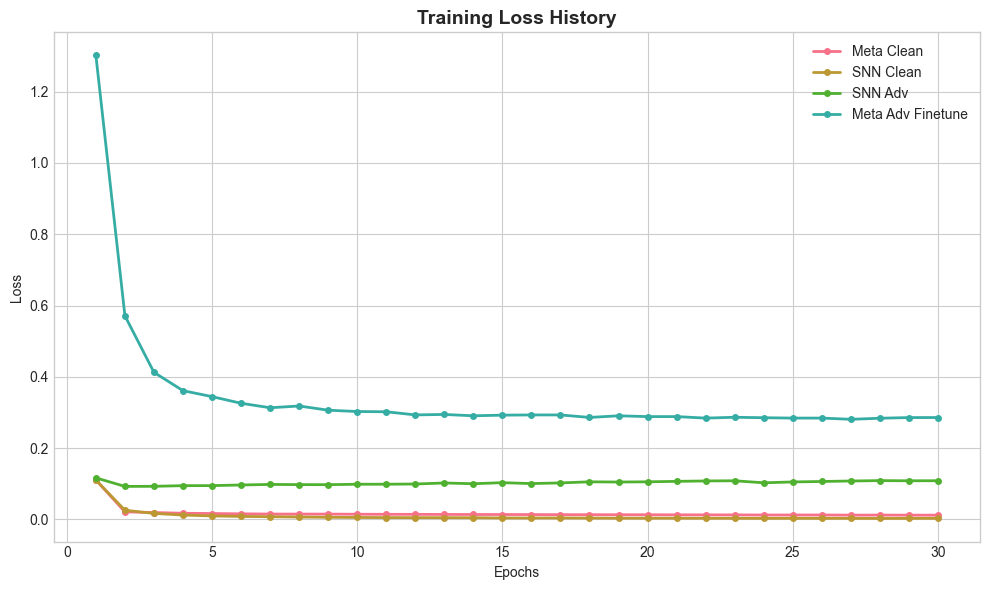

✅ Loss graph saved to security_evaluation_results/training_loss_history.png

Evaluating classical_dt ...

Evaluating classical_rf ...

Evaluating classical_et ...

Evaluating classical_ada ...

Evaluating classical_xgb ...

Evaluating voting ...

Evaluating snn_transformer_clean ...


Generating fgsm:   0%|          | 0/40 [00:00<?, ?it/s]

Generating bim:   0%|          | 0/40 [00:00<?, ?it/s]

Generating pgd:   0%|          | 0/40 [00:00<?, ?it/s]

Generating mim:   0%|          | 0/40 [00:00<?, ?it/s]

Generating cw:   0%|          | 0/625 [00:00<?, ?it/s]

Generating deepfool:   0%|          | 0/625 [00:00<?, ?it/s]


Evaluating snn_transformer_adv ...


Generating fgsm:   0%|          | 0/40 [00:00<?, ?it/s]

Generating bim:   0%|          | 0/40 [00:00<?, ?it/s]

Generating pgd:   0%|          | 0/40 [00:00<?, ?it/s]

Generating mim:   0%|          | 0/40 [00:00<?, ?it/s]

Generating cw:   0%|          | 0/625 [00:00<?, ?it/s]

Generating deepfool:   0%|          | 0/625 [00:00<?, ?it/s]


Evaluating meta_snn_transformer_clean ...


Generating fgsm:   0%|          | 0/306 [00:00<?, ?it/s]

Generating bim:   0%|          | 0/306 [00:00<?, ?it/s]

Generating pgd:   0%|          | 0/306 [00:00<?, ?it/s]

Generating mim:   0%|          | 0/306 [00:00<?, ?it/s]

Generating cw:   0%|          | 0/4884 [00:00<?, ?it/s]

Generating deepfool:   0%|          | 0/4884 [00:00<?, ?it/s]


Evaluating meta_snn_transformer_adv ...


Generating fgsm:   0%|          | 0/306 [00:00<?, ?it/s]

Generating bim:   0%|          | 0/306 [00:00<?, ?it/s]

Generating pgd:   0%|          | 0/306 [00:00<?, ?it/s]

Generating mim:   0%|          | 0/306 [00:00<?, ?it/s]

Generating cw:   0%|          | 0/4884 [00:00<?, ?it/s]

Generating deepfool:   0%|          | 0/4884 [00:00<?, ?it/s]


FINAL SUMMARY


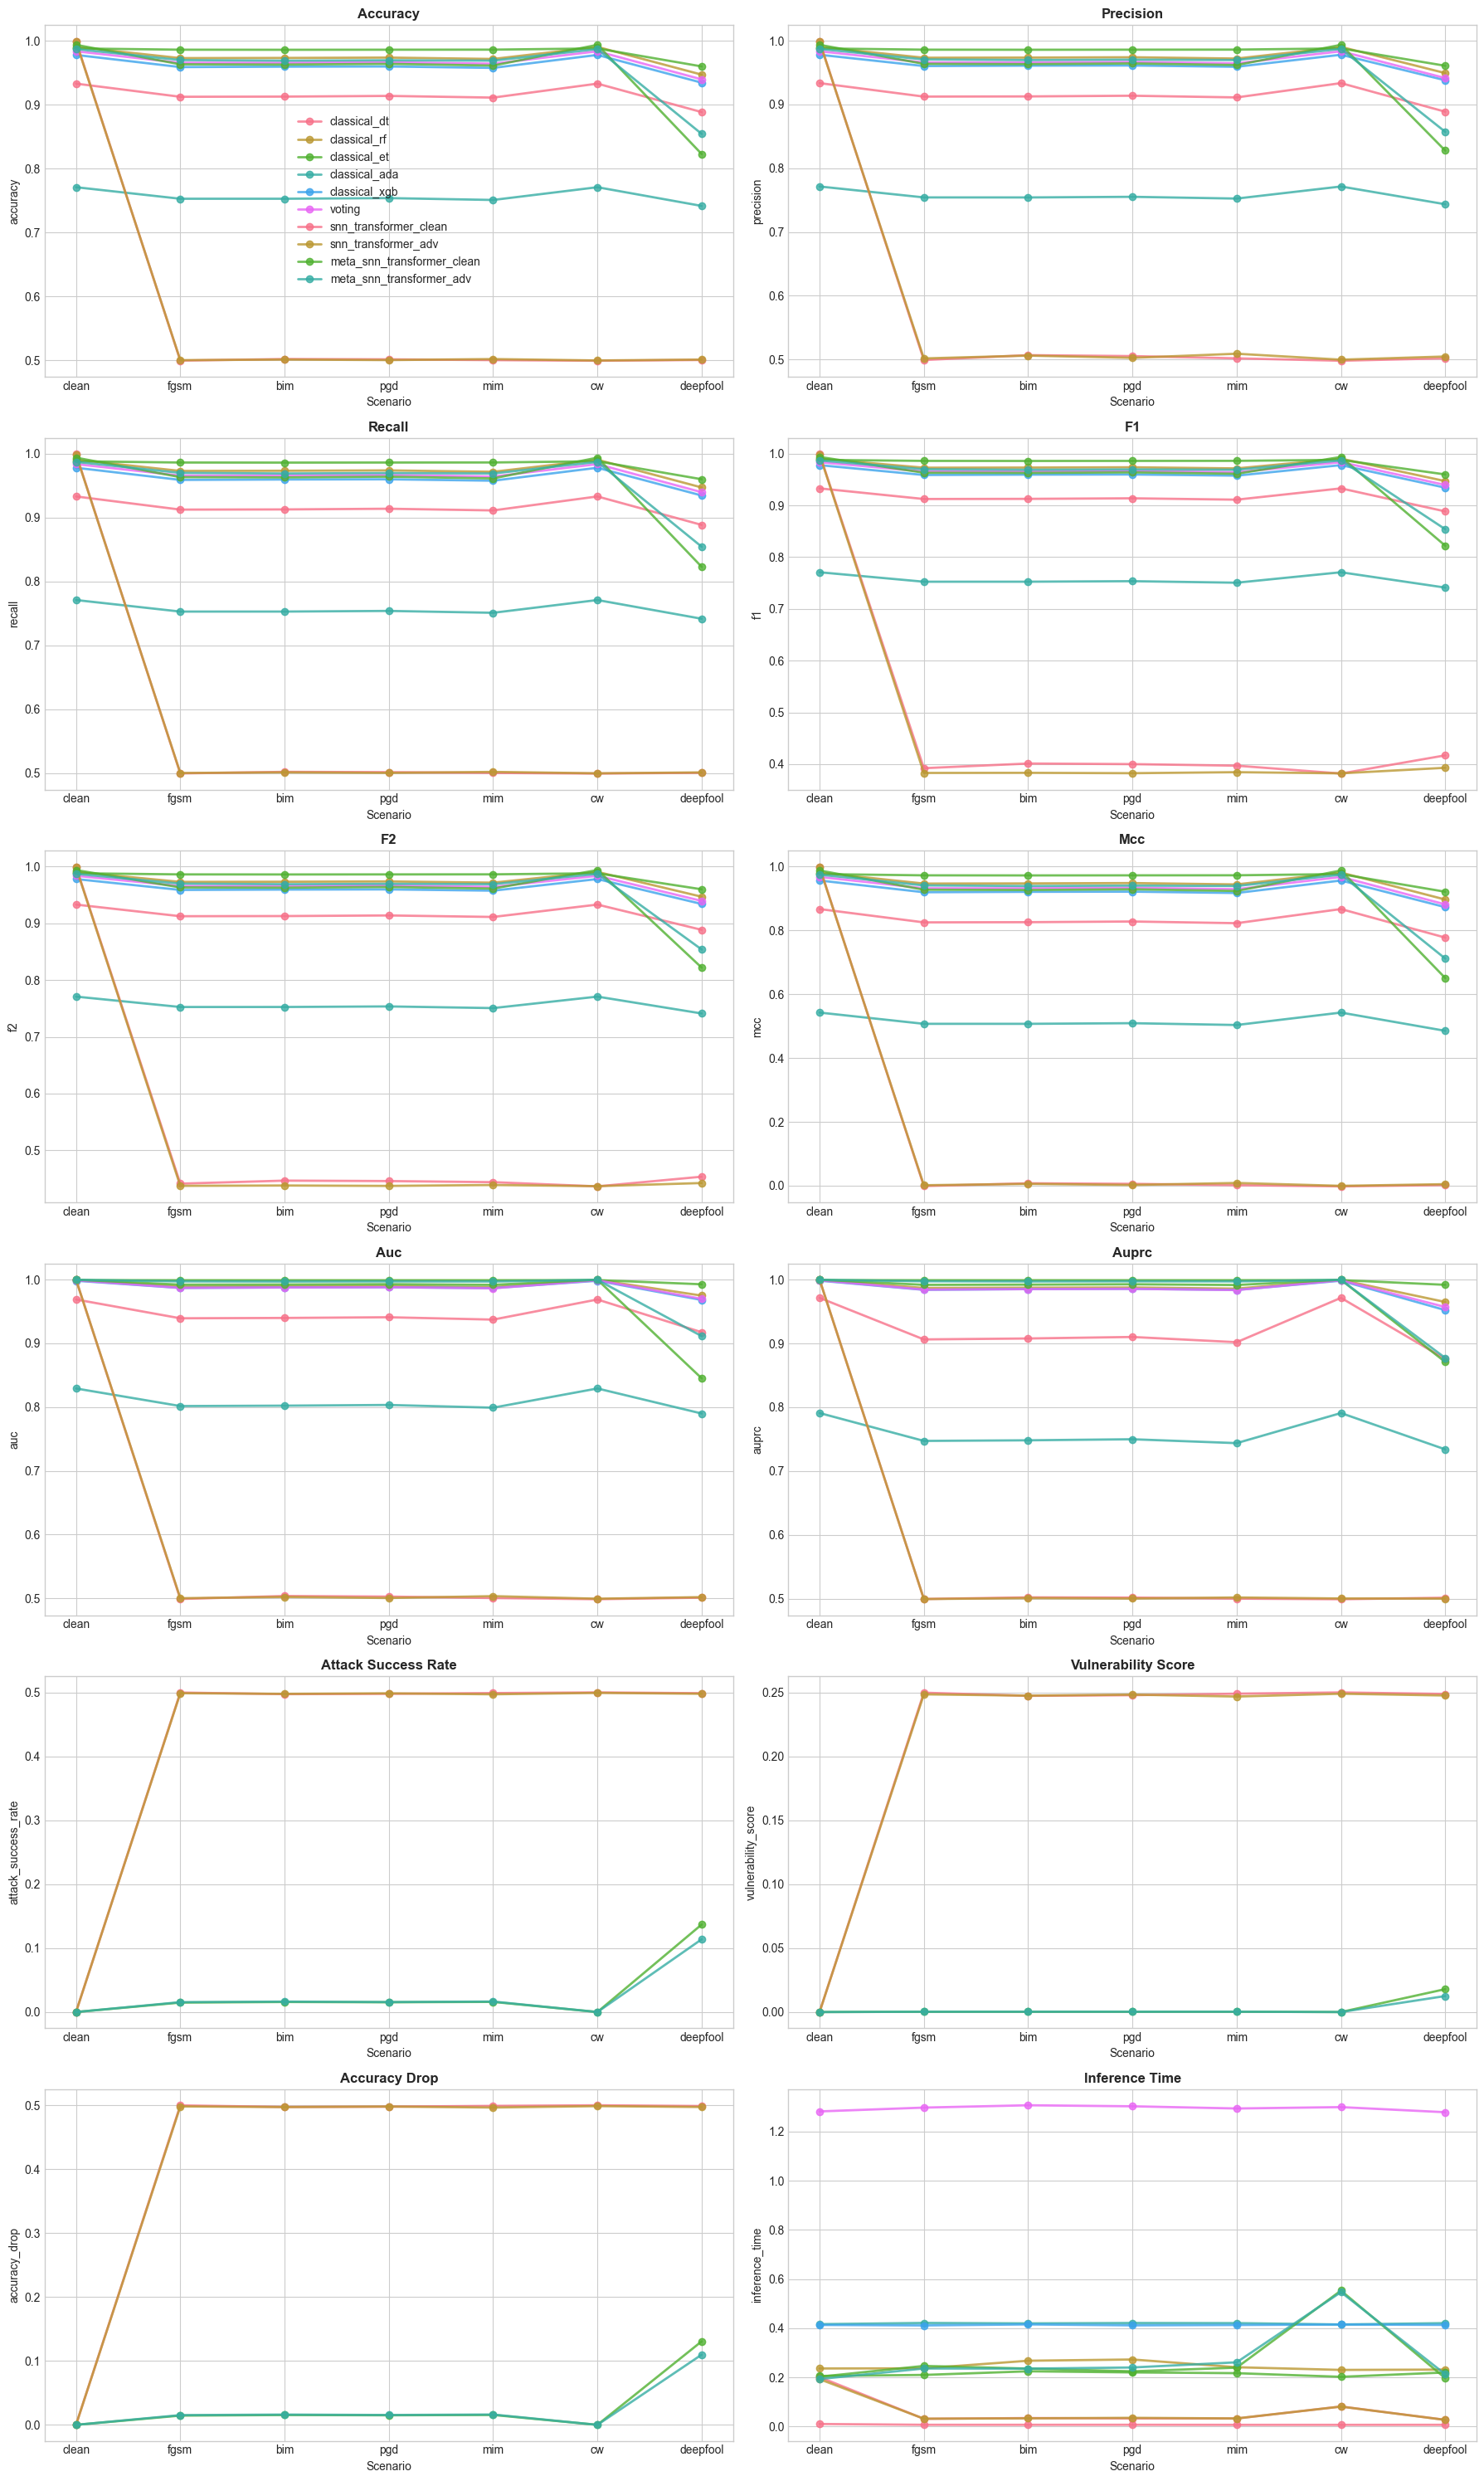

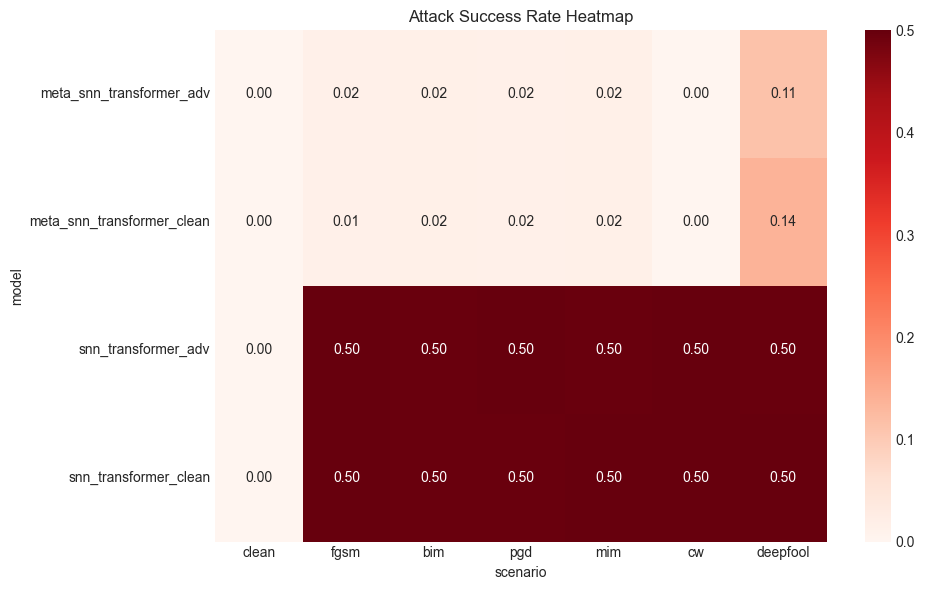

✅ Visualizations saved to security_evaluation_results
classical_dt                   | clean      | acc 0.9330 | f1 0.9330 | mcc 0.8666 | auc 0.9687 | inference_time 0.0101s
classical_dt                   | fgsm       | acc 0.9124 | f1 0.9124 | mcc 0.8249 | auc 0.9393 | inference_time 0.0069s
classical_dt                   | bim        | acc 0.9127 | f1 0.9127 | mcc 0.8254 | auc 0.9398 | inference_time 0.0069s
classical_dt                   | pgd        | acc 0.9138 | f1 0.9138 | mcc 0.8276 | auc 0.9409 | inference_time 0.0070s
classical_dt                   | mim        | acc 0.9111 | f1 0.9111 | mcc 0.8223 | auc 0.9372 | inference_time 0.0067s
classical_dt                   | cw         | acc 0.9330 | f1 0.9330 | mcc 0.8666 | auc 0.9687 | inference_time 0.0067s
classical_dt                   | deepfool   | acc 0.8885 | f1 0.8885 | mcc 0.7772 | auc 0.9174 | inference_time 0.0068s
classical_rf                   | clean      | acc 0.9905 | f1 0.9905 | mcc 0.9809 | auc 0.9995 | inference

In [39]:
# robust_evaluation_pipeline_final_complete.py
"""
Complete robust adversarial evaluation pipeline
- Ultra-robust against NaN results
- Ready to run with any dataset
- Comprehensive error handling
- Hybrid PGD-DeepFool adversarial training
- 30% Dropout implemented in SNNTransformer
- Optimized Soft Voting with Grid Search
- ADDED: Time Evaluation Metrics (Inference Time, Throughput)
- ADDED: MCC (Matthews Correlation Coefficient) Metric
- ADDED: Training Loss History Visualization
- FIXED: Summary Table Display
"""

import os
import gc
import traceback
from dataclasses import dataclass, field
from typing import List, Dict, Any, Optional, Tuple
import hashlib
import time
import copy
import math

import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, fbeta_score, roc_auc_score, 
    precision_score, recall_score, average_precision_score, 
    confusion_matrix, matthews_corrcoef  # <--- ADDED MCC IMPORT
)
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

# Optional XGBoost
try:
    from xgboost import XGBClassifier
except Exception:
    XGBClassifier = None

# Optional resource limiting
try:
    import resource

    def set_memory_limits(max_bytes: int = 4 * 1024**3):
        try:
            soft, hard = resource.getrlimit(resource.RLIMIT_AS)
            resource.setrlimit(resource.RLIMIT_AS, (max_bytes, hard))
            print(f"[INFO] memory soft limit set to {max_bytes} bytes")
        except Exception as e:
            print(f"[WARN] set_memory_limits failed: {e}")
except Exception:
    def set_memory_limits(max_bytes: int = 4 * 1024**3):
        pass

# Environment safety
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"
torch.set_num_threads(1)
torch.set_default_dtype(torch.float32)

# Setup plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")


@dataclass
class TrainingConfig:
    epochs: int = 30
    batch_size: int = 128
    lr: float = 1e-3
    attack_type: str = "hybrid_pgd_deepfool"
    attack_params: Dict[str, Any] = field(default_factory=lambda: {
        "epsilon": 0.05, 
        "alpha": 0.01, 
        "iters": 8,
        "deepfool_iters": 10,
        "hybrid_ratio": 0.5
    })


@dataclass
class PipelineConfig:
    training: TrainingConfig = field(default_factory=TrainingConfig)
    max_adv_samples: Optional[int] = 10000
    expensive_attack_batch_size: int = 16
    enable_memory_limits: bool = False
    memory_limit_bytes: int = 4 * 1024**3
    output_dir: str = "security_evaluation_results" # Directory for plots/results


def choose_device() -> torch.device:
    try:
        if torch.cuda.is_available():
            return torch.device("cuda")
        if getattr(torch.backends, "mps", None) is not None and torch.backends.mps.is_available():
            return torch.device("mps")
    except Exception:
        pass
    return torch.device("cpu")


device = choose_device()
print("Using device:", device)


def clear_memory():
    gc.collect()
    try:
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
    except Exception:
        pass


def to_numpy(x: torch.Tensor) -> np.ndarray:
    if isinstance(x, torch.Tensor):
        return x.detach().cpu().numpy()
    return np.asarray(x)


# ======================================================================================
# IMPROVED METRICS CALCULATION (WITH MCC)
# ======================================================================================

def calculate_attack_success_metrics(y_true_clean: np.ndarray, y_pred_clean: np.ndarray, y_pred_adv: np.ndarray) -> Dict[str, float]:
    """Calculate Attack Success Rate, Vulnerability Score, and Accuracy Drop."""
    try:
        if len(y_true_clean) == 0:
            return {"attack_success_rate": 0.0, "vulnerability_score": 0.0, "accuracy_drop": 0.0}
        
        clean_acc = accuracy_score(y_true_clean, y_pred_clean)
        adv_acc = accuracy_score(y_true_clean, y_pred_adv)
        
        # ASR: % of correctly classified clean samples that flipped
        correct_clean_mask = (y_pred_clean == y_true_clean)
        if np.sum(correct_clean_mask) > 0:
            attack_success_rate = np.mean(y_pred_adv[correct_clean_mask] != y_true_clean[correct_clean_mask])
        else:
            attack_success_rate = 0.0
            
        accuracy_drop = max(0.0, clean_acc - adv_acc)
        vulnerability_score = attack_success_rate * accuracy_drop
        
        return {
            "attack_success_rate": float(attack_success_rate),
            "vulnerability_score": float(vulnerability_score),
            "accuracy_drop": float(accuracy_drop)
        }
    except Exception as e:
        print(f"[WARN] Attack metrics failed: {e}")
        return {"attack_success_rate": 0.0, "vulnerability_score": 0.0, "accuracy_drop": 0.0}


def safe_metrics(y_true: np.ndarray, y_pred: np.ndarray, probs: np.ndarray) -> Dict[str, float]:
    """Calculate all standard ML metrics safely, including MCC."""
    try:
        if len(y_true) == 0:
            return {k: 0.0 for k in ['accuracy', 'precision', 'recall', 'f1', 'f2', 'mcc', 'auc', 'auprc']}
        
        # Binary vs Multiclass handling
        is_multiclass = len(np.unique(y_true)) > 2
        
        # 1. Standard Metrics
        acc = float(accuracy_score(y_true, y_pred))
        prec = float(precision_score(y_true, y_pred, average='weighted', zero_division=0))
        rec = float(recall_score(y_true, y_pred, average='weighted', zero_division=0))
        f1 = float(f1_score(y_true, y_pred, average='weighted', zero_division=0))
        f2 = float(fbeta_score(y_true, y_pred, beta=2, average='weighted', zero_division=0))
        
        # --- ADDED MCC ---
        try:
            mcc = float(matthews_corrcoef(y_true, y_pred))
        except Exception:
            mcc = 0.0
        
        # 2. Probabilistic Metrics (AUC / AUPRC)
        auc = 0.5
        auprc = 0.0
        
        # Prepare probabilities for metrics
        if not is_multiclass:
            # For binary, sklearn expects shape (n_samples,) for the positive class
            if probs.ndim == 2 and probs.shape[1] == 2:
                probs = probs[:, 1]
        
        try:
            if is_multiclass:
                auc = float(roc_auc_score(y_true, probs, multi_class='ovr', average='weighted'))
            else:
                auc = float(roc_auc_score(y_true, probs))
                auprc = float(average_precision_score(y_true, probs))
        except Exception:
            pass # Keep default 0.5/0.0 if calculation fails

        return {
            "accuracy": acc, "precision": prec, "recall": rec, 
            "f1": f1, "f2": f2, "mcc": mcc, "auc": auc, "auprc": auprc
        }
    except Exception as e:
        print(f"[WARN] Metrics failed: {e}")
        return {k: 0.0 for k in ['accuracy', 'precision', 'recall', 'f1', 'f2', 'mcc', 'auc', 'auprc']}


# ======================================================================================
# VISUALIZATION (WITH MCC AND LOSS)
# ======================================================================================

def plot_training_loss_history(loss_history_dict: Dict[str, List[float]], output_dir: str):
    """
    Plots the training loss curves for different training phases.
    """
    try:
        plt.figure(figsize=(10, 6))
        
        for name, losses in loss_history_dict.items():
            if losses and len(losses) > 0:
                plt.plot(range(1, len(losses) + 1), losses, marker='o', label=name, linewidth=2, markersize=4)

        plt.title("Training Loss History", fontsize=14, fontweight='bold')
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        #plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(f'{output_dir}/training_loss_history.png', dpi=300)
        plt.show()
        plt.close()
        print(f"✅ Loss graph saved to {output_dir}/training_loss_history.png")
    except Exception as e:
        print(f"Loss plotting failed: {e}")


def create_comprehensive_visualizations(results: Dict[str, Dict[str, Any]], output_dir: str, attack_types: List[str]):
    """
    Generates line plots for ALL requested metrics and an ASR heatmap.
    """
    try:
        os.makedirs(output_dir, exist_ok=True)
        
        # Flatten results for DataFrame
        data = []
        for model, scenarios in results.items():
            for scenario, metrics in scenarios.items():
                row = {'model': model, 'scenario': scenario}
                row.update(metrics)
                data.append(row)
        df = pd.DataFrame(data)
        
        # Metrics to plot as line graphs (Added 'mcc')
        metrics_list = [
            'accuracy', 'precision', 'recall', 'f1', 'f2', 'mcc',
            'auc', 'auprc', 'attack_success_rate', 'vulnerability_score', 
            'accuracy_drop', 'inference_time'
        ]
        
        scenarios = ['clean'] + [atk.lower() for atk in attack_types]
        
        # Create Grid Plot (Dynamic rows based on metrics count)
        cols = 2
        rows = math.ceil(len(metrics_list) / cols)
        fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
        axes = axes.flatten()
        
        for i, metric in enumerate(metrics_list):
            if metric not in df.columns: continue
            
            ax = axes[i]
            for model in df['model'].unique():
                model_df = df[df['model'] == model]
                
                # Align values with scenarios order
                ys = []
                xs = []
                for s in scenarios:
                    if s in model_df['scenario'].values:
                        val = model_df[model_df['scenario'] == s][metric].values[0]
                        ys.append(val)
                        xs.append(s)
                    else:
                        pass 
                
                if len(ys) > 0:
                    ax.plot(xs, ys, marker='o', label=model, linewidth=2, alpha=0.8)
            
            ax.set_title(metric.replace('_', ' ').title(), fontsize=12, fontweight='bold')
            ax.set_xlabel('Scenario')
            ax.set_ylabel(metric)
            #ax.grid(True, alpha=0.3)
            if i == 0: ax.legend()
            
        plt.tight_layout()
        plt.savefig(f'{output_dir}/comprehensive_metrics_lineplots.png', dpi=300)
        plt.show() 
        plt.close()
        
        # ASR Heatmap
        plt.figure(figsize=(10, 6))
        if 'attack_success_rate' in df.columns:
            asr_df = df.pivot_table(index='model', columns='scenario', values='attack_success_rate')
            # Ensure column order and fill missing
            existing_cols = [c for c in scenarios if c in asr_df.columns]
            if existing_cols:
                sns.heatmap(asr_df[existing_cols], annot=True, cmap='Reds', fmt='.2f')
                plt.title("Attack Success Rate Heatmap")
                plt.tight_layout()
                plt.savefig(f'{output_dir}/asr_heatmap.png', dpi=300)
                plt.show() 
                plt.close()
        
        print(f"✅ Visualizations saved to {output_dir}")
        
    except Exception as e:
        print(f"Visualization error: {e}")
        traceback.print_exc()


class SNNTransformer(nn.Module):
    def __init__(self,
                 input_dim: int,
                 hidden_dim: int = 32,
                 spiking_dim: int = 64,
                 num_classes: int = 2,
                 dropout_rate: float = 0.3):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.spiking_dim = spiking_dim
        self.num_classes = num_classes

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.LayerNorm(hidden_dim),
            nn.Dropout(p=dropout_rate * 0.5)
        )
        
        self.spike_dense = nn.Linear(hidden_dim, spiking_dim)
        self.spike_act = nn.Hardtanh(0.0, 1.0)
        
        self.ff = nn.Sequential(
            nn.Linear(spiking_dim, spiking_dim),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(spiking_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate * 0.5)
        )
        
        self.classifier = nn.Linear(hidden_dim, num_classes)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x_enc = self.encoder(x)
        spk = self.spike_act(self.spike_dense(x_enc))
        x_ff = self.ff(spk)
        logits = self.classifier(x_ff)
        return logits


class ComprehensiveAdversarialAttacks:
    def __init__(self, model: nn.Module, device: torch.device = device, clamp_min: float = None, clamp_max: float = None):
        self.model = model
        self.device = device
        self.clamp_min = -np.inf if clamp_min is None else float(clamp_min)
        self.clamp_max = np.inf if clamp_max is None else float(clamp_max)

    def _forward_and_loss(self, x: torch.Tensor, y: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
        try:
            out = self.model(x)
            loss = F.cross_entropy(out, y)
            return out, loss
        except Exception as e:
            print(f"[ERROR] _forward_and_loss failed: {e}")
            return torch.randn(x.shape[0], 2, device=self.device), torch.tensor(1.0, device=self.device)

    def _get_grad(self, x: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
        original_mode = self.model.training
        try:
            self.model.eval()
            with torch.enable_grad():
                x_adv = x.clone().detach().to(self.device).requires_grad_(True)
                y_dev = y.clone().detach().to(self.device).long()
                _, loss = self._forward_and_loss(x_adv, y_dev)
                grad = torch.autograd.grad(loss, x_adv, only_inputs=True)[0]
                if grad is None:
                    return torch.zeros_like(x_adv)
                return grad.detach().clone()
        except Exception as e:
            print(f"[ERROR] _get_grad failed: {e}")
            return torch.zeros_like(x)
        finally:
            self.model.train(original_mode)

    def _get_grad_batch(self, x: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
        return self._get_grad(x, y)

    def fgsm(self, x: torch.Tensor, y: torch.Tensor, epsilon: float = 0.05) -> torch.Tensor:
        try:
            grad = self._get_grad_batch(x, y)
            x_adv = x + epsilon * grad.sign()
            return torch.clamp(x_adv, self.clamp_min, self.clamp_max).detach()
        except Exception as e:
            print(f"[ERROR] FGSM failed: {e}")
            return x

    def bim(self, x: torch.Tensor, y: torch.Tensor, epsilon: float = 0.05, alpha: float = 0.01, iters: int = 10) -> torch.Tensor:
        try:
            x_orig = x.clone().detach().to(self.device)
            x_adv = x_orig.clone().detach()
            for _ in range(iters):
                grad = self._get_grad_batch(x_adv, y)
                x_adv = x_adv + alpha * grad.sign()
                x_adv = torch.max(torch.min(x_adv, x_orig + epsilon), x_orig - epsilon)
                x_adv = torch.clamp(x_adv, self.clamp_min, self.clamp_max)
            return x_adv.detach()
        except Exception as e:
            print(f"[ERROR] BIM failed: {e}")
            return x

    def pgd(self, x: torch.Tensor, y: torch.Tensor, epsilon: float = 0.05, alpha: float = 0.01, iters: int = 10, random_start: bool = True) -> torch.Tensor:
        try:
            x_orig = x.clone().detach().to(self.device)
            if random_start:
                x_adv = x_orig + torch.empty_like(x_orig).uniform_(-epsilon, epsilon)
            else:
                x_adv = x_orig.clone().detach()
            for _ in range(iters):
                grad = self._get_grad_batch(x_adv, y)
                x_adv = x_adv + alpha * grad.sign()
                x_adv = torch.max(torch.min(x_adv, x_orig + epsilon), x_orig - epsilon)
                x_adv = torch.clamp(x_adv, self.clamp_min, self.clamp_max)
            return x_adv.detach()
        except Exception as e:
            print(f"[ERROR] PGD failed: {e}")
            return x

    def mim(self, x: torch.Tensor, y: torch.Tensor, epsilon: float = 0.05, alpha: float = 0.01, iters: int = 10, decay: float = 1.0) -> torch.Tensor:
        try:
            x_orig = x.clone().detach().to(self.device)
            x_adv = x_orig.clone().detach()
            g = torch.zeros_like(x_adv)
            for _ in range(iters):
                grad = self._get_grad_batch(x_adv, y)
                denom = torch.mean(torch.abs(grad), dim=1, keepdim=True) + 1e-8
                g = decay * g + grad / denom
                x_adv = x_adv + alpha * torch.sign(g)
                x_adv = torch.max(torch.min(x_adv, x_orig + epsilon), x_orig - epsilon)
                x_adv = torch.clamp(x_adv, self.clamp_min, self.clamp_max)
            return x_adv.detach()
        except Exception as e:
            print(f"[ERROR] MIM failed: {e}")
            return x

    def cw_l2(self, x: torch.Tensor, y: torch.Tensor, c: float = 1e-2, iters: int = 100, lr: float = 1e-2) -> torch.Tensor:
        try:
            x_orig = x.clone().detach().to(self.device)
            delta = torch.zeros_like(x_orig, requires_grad=True, device=self.device)
            opt = torch.optim.Adam([delta], lr=lr)
            for _ in range(iters):
                opt.zero_grad()
                x_adv = x_orig + delta
                logits = self.model(x_adv)
                true_logit = logits.gather(1, y.view(-1, 1)).squeeze(1)
                max_other = logits.max(dim=1)[0]
                margin = torch.clamp(true_logit - max_other + 0.0, min=0)
                loss = margin.sum()
                l2 = torch.sum(delta ** 2)
                loss_total = c * loss + 0.001 * l2
                loss_total.backward()
                opt.step()
                with torch.no_grad():
                     delta.data = torch.clamp(delta.data, self.clamp_min - x_orig, self.clamp_max - x_orig)
            x_adv = torch.clamp(x_orig + delta.detach(), self.clamp_min, self.clamp_max)
            return x_adv.detach()
        except Exception as e:
            print(f"[ERROR] CW-L2 failed: {e}")
            return x

    def deepfool(self, x: torch.Tensor, y: torch.Tensor, max_iter: int = 25, overshoot: float = 0.02) -> torch.Tensor:
        try:
            x_adv = x.clone().detach().to(self.device)
            batch_size = x_adv.shape[0]

            for _ in range(max_iter):
                x_adv.requires_grad_(True)
                logits = self.model(x_adv)
                preds = logits.argmax(dim=1)
                if (preds != y.to(self.device)).any():
                    break

                num_classes = logits.shape[1]
                grads = []
                for k in range(num_classes):
                    gk = torch.autograd.grad(logits[:, k].sum(), x_adv, retain_graph=(k < num_classes - 1))[0]
                    grads.append(gk.detach().clone())
                grads = torch.stack(grads, dim=0)
                logits_np = logits.detach()

                perturb = torch.zeros_like(x_adv)
                for i in range(batch_size):
                    orig = int(logits_np[i].argmax().item())
                    min_ratio = float('inf')
                    best_pert = None
                    for k in range(num_classes):
                        if k == orig:
                            continue
                        w_k = (grads[k, i] - grads[orig, i]).view(-1)
                        f_k = float(logits_np[i, k] - logits_np[i, orig])
                        denom = (w_k.norm() + 1e-12)
                        val = abs(f_k) / denom
                        if val < min_ratio:
                            min_ratio = val
                            best_pert = (val * w_k / denom).view_as(x_adv[i])
                    if best_pert is None:
                        best_pert = torch.zeros_like(x_adv[i])
                    perturb[i] = best_pert
                x_adv = x_adv + (1 + overshoot) * perturb
                x_adv = torch.clamp(x_adv, self.clamp_min, self.clamp_max).detach()

            return x_adv.detach()
        except Exception as e:
            print(f"[ERROR] DeepFool failed: {e}")
            return x

    def hybrid_pgd_deepfool(self, x: torch.Tensor, y: torch.Tensor, 
                            epsilon: float = 0.05, alpha: float = 0.01, 
                            pgd_iters: int = 8, deepfool_iters: int = 10,
                            hybrid_ratio: float = 0.5) -> torch.Tensor:
        try:
            batch_size = x.shape[0]
            
            pgd_size = int(batch_size * (1 - hybrid_ratio))
            deepfool_size = batch_size - pgd_size
            
            if pgd_size > 0 and deepfool_size > 0:
                x_pgd = x[:pgd_size]
                y_pgd = y[:pgd_size]
                x_deepfool = x[pgd_size:]
                y_deepfool = y[pgd_size:]
                
                x_adv_pgd = self.pgd(x_pgd, y_pgd, epsilon=epsilon, alpha=alpha, iters=pgd_iters)
                x_adv_deepfool = self.deepfool(x_deepfool, y_deepfool, max_iter=deepfool_iters)
                x_adv = torch.cat([x_adv_pgd, x_adv_deepfool], dim=0)
                
            elif pgd_size > 0:
                x_adv = self.pgd(x, y, epsilon=epsilon, alpha=alpha, iters=pgd_iters)
            else:
                x_adv = self.deepfool(x, y, max_iter=deepfool_iters)
            
            return torch.clamp(x_adv, self.clamp_min, self.clamp_max).detach()
            
        except Exception as e:
            print(f"[ERROR] Hybrid PGD-DeepFool failed: {e}")
            return x


class AdvancedAdversarialSNNTrainer:
    def __init__(self,
                 snn_model: nn.Module,
                 classical_models: Optional[List[Any]] = None,
                 device: Optional[torch.device] = None):
        self.snn_model = snn_model
        self.device = device or torch.device("cpu")
        self.classical_models = classical_models or []
        self.attack_mgr = ComprehensiveAdversarialAttacks(self.snn_model, device=self.device)

    def _extract_logits(self, out: torch.Tensor) -> torch.Tensor:
        if isinstance(out, (tuple, list)):
            out = out[0]
        return out

    def train(self,
              X_train: np.ndarray,
              y_train: np.ndarray,
              epochs: int = 30,
              batch_size: int = 128,
              lr: float = 1e-3,
              attack_type: str = 'hybrid_pgd_deepfool',
              attack_params: dict = None,
              base_epsilon: float = 0.02,
              alpha: float = 0.6,
              consistency_weight: float = 0.05,
              ensemble_weight: float = 0.1,
              grad_penalty: float = 0.0,
              verbose: bool = True) -> Tuple[nn.Module, List[float]]: # CHANGED RETURN TYPE

        attack_params = attack_params or {
            'epsilon': base_epsilon, 
            'alpha': 0.01, 
            'iters': 5,
            'deepfool_iters': 10,
            'hybrid_ratio': 0.5
        }
        self.snn_model.to(self.device)
        optimizer = optim.AdamW(self.snn_model.parameters(), lr=lr, weight_decay=1e-4)
        loss_fn = nn.CrossEntropyLoss()

        dataset = torch.utils.data.TensorDataset(
            torch.tensor(X_train, dtype=torch.float32),
            torch.tensor(y_train, dtype=torch.long)
        )
        loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
        
        loss_history = []  # Store loss per epoch

        for epoch in range(epochs):
            self.snn_model.train()
            total_loss = 0.0
            eps = attack_params.get('epsilon', base_epsilon) * (1.0 + 0.05 * epoch)

            for batch_idx, (Xb, yb) in enumerate(loader):
                Xb = Xb.to(self.device)
                yb = yb.to(self.device)

                try:
                    atk = attack_type.lower() if attack_type else None
                    
                    if atk == 'hybrid_pgd_deepfool':
                        X_adv = self.attack_mgr.hybrid_pgd_deepfool(
                            Xb, yb, 
                            epsilon=eps, 
                            alpha=attack_params.get('alpha', 0.01),
                            pgd_iters=attack_params.get('iters', 5),
                            deepfool_iters=attack_params.get('deepfool_iters', 10),
                            hybrid_ratio=attack_params.get('hybrid_ratio', 0.5)
                        )
                    elif atk == 'pgd':
                        X_adv = self.attack_mgr.pgd(Xb, yb, epsilon=eps, alpha=attack_params.get('alpha', 0.01),
                                                    iters=attack_params.get('iters', 5))
                    elif atk == 'fgsm':
                        X_adv = self.attack_mgr.fgsm(Xb, yb, epsilon=eps)
                    elif atk == 'mim':
                        X_adv = self.attack_mgr.mim(Xb, yb, epsilon=eps, alpha=attack_params.get('alpha', 0.01),
                                                    iters=attack_params.get('iters', 5))
                    elif atk == 'bim':
                        X_adv = self.attack_mgr.bim(Xb, yb, epsilon=eps, alpha=attack_params.get('alpha', 0.01),
                                                    iters=attack_params.get('iters', 5))
                    elif atk == 'deepfool':
                        X_adv = self.attack_mgr.deepfool(Xb, yb, max_iter=attack_params.get('deepfool_iters', 10))
                    else:
                        X_adv = Xb
                except Exception as e:
                    if verbose:
                        print(f"[WARN] Attack generation failed: {e}")
                    X_adv = Xb

                logits_clean = self._extract_logits(self.snn_model(Xb))
                logits_adv = self._extract_logits(self.snn_model(X_adv))

                loss_clean = loss_fn(logits_clean, yb)
                loss_adv = loss_fn(logits_adv, yb)
                total = alpha * loss_clean + (1 - alpha) * loss_adv

                total += consistency_weight * F.mse_loss(F.softmax(logits_clean, dim=1), F.softmax(logits_adv, dim=1))

                if grad_penalty and grad_penalty > 0:
                    X_adv_for_grad = X_adv.clone().detach().requires_grad_(True)
                    logits_adv_g = self.snn_model(X_adv_for_grad)
                    loss_adv_g = loss_fn(logits_adv_g, yb)
                    grads = torch.autograd.grad(loss_adv_g, X_adv_for_grad, only_inputs=True)[0]
                    gp = grads.norm(2, dim=1).mean() if grads is not None else torch.tensor(0.0, device=self.device)
                    total += grad_penalty * gp

                if self.classical_models:
                    try:
                        with torch.no_grad():
                            X_adv_np = to_numpy(X_adv)
                            p_accum = None
                            for cm in self.classical_models:
                                try:
                                    p = cm.predict_proba(X_adv_np)
                                except Exception:
                                    continue
                                if p_accum is None:
                                    p_accum = p
                                else:
                                    p_accum += p
                            if p_accum is not None:
                                p_avg = p_accum / max(1, len(self.classical_models))
                                p_t = torch.tensor(p_avg, dtype=torch.float32, device=self.device)
                                total += ensemble_weight * F.mse_loss(F.softmax(logits_adv, dim=1), p_t)
                    except Exception as e:
                        if verbose:
                            print(f"[WARN] Ensemble consistency failed: {e}")

                optimizer.zero_grad(set_to_none=True)
                try:
                    total.backward()
                    torch.nn.utils.clip_grad_norm_(self.snn_model.parameters(), 5.0)
                    optimizer.step()
                    total_loss += float(total.item())
                except Exception as e:
                    if verbose:
                        print(f"[WARN] Skipping batch due to backward error: {e}")
                    optimizer.zero_grad(set_to_none=True)
                    continue

                del Xb, yb, X_adv, logits_clean, logits_adv, loss_clean, loss_adv, total
                clear_memory()

            avg_loss = total_loss / max(1, len(loader))
            loss_history.append(avg_loss) # Store loss
            
            if verbose:
                attack_info = f"{attack_type}"
                if attack_type == 'hybrid_pgd_deepfool':
                    hybrid_ratio = attack_params.get('hybrid_ratio', 0.5)
                    attack_info += f"(ratio:{hybrid_ratio})"
                print(f"[AdvTrain++] Epoch {epoch+1}/{epochs} | eps={eps:.4f} | avg_loss={avg_loss:.6f} | attack={attack_info}")

        return self.snn_model, loss_history


def optimize_soft_voting(X_train: np.ndarray, y_train: np.ndarray, estimators: List[Tuple[str, Any]]) -> VotingClassifier:
    """
    Optimizes a Soft Voting Classifier using GridSearchCV to find the best weights.
    """
    print("\n[Optimization] Starting Grid Search for Soft Voting Classifier weights...")
    
    n_estimators = len(estimators)
    
    # 1. Uniform
    weights_list = [[1] * n_estimators]
    
    # 2. Bias towards individual models (giving one model double weight)
    for i in range(n_estimators):
        w = [1] * n_estimators
        w[i] = 2
        weights_list.append(w)
        
    # 3. Strong bias (triple weight)
    for i in range(n_estimators):
        w = [1] * n_estimators
        w[i] = 3
        weights_list.append(w)

    param_grid = {'weights': weights_list}
    voting_clf = VotingClassifier(estimators=estimators, voting='soft')
    
    # Use StratifiedKFold for robust CV
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    
    grid_search = GridSearchCV(
        estimator=voting_clf,
        param_grid=param_grid,
        cv=cv,
        scoring='f1',  # Optimize for F1 score
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    print(f"  [Optimization] Best Weights: {grid_search.best_params_['weights']}")
    print(f"  [Optimization] Best CV F1 Score: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_


def create_all_meta_features(X_train: np.ndarray, y_train: np.ndarray,
                             X_val: np.ndarray, X_test: np.ndarray,
                             base_models: Dict[str, Any], n_splits: int = 5) -> Tuple[np.ndarray, np.ndarray, np.ndarray, List[str]]:
    """
    Generate meta_train via CV (no modification of original base_models),
    and generate meta_val, meta_test using base_models' predictions (no CV) — single pass.
    """
    names = list(base_models.keys())
    models = [base_models[n] for n in names]
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    meta_train = np.zeros((X_train.shape[0], len(models)))

    for i, (name, model) in enumerate(zip(names, models)):
        try:
            m_cv = copy.deepcopy(model)
        except Exception:
            try:
                m_cv = type(model)()
            except Exception:
                m_cv = model
        for train_idx, val_idx in skf.split(X_train, y_train):
            X_tr, X_val_fold = X_train[train_idx], X_train[val_idx]
            y_tr = y_train[train_idx]
            try:
                m_fold = copy.deepcopy(m_cv)
            except Exception:
                try:
                    m_fold = type(model)()
                except Exception:
                    m_fold = model
            try:
                m_fold.fit(X_tr, y_tr)
                meta_train[val_idx, i] = m_fold.predict_proba(X_val_fold)[:, 1]
            except Exception:
                try:
                    meta_train[val_idx, i] = model.predict_proba(X_val_fold)[:, 1]
                except Exception:
                    meta_train[val_idx, i] = 0.0

    try:
        meta_val = np.column_stack([base_models[n].predict_proba(X_val)[:, 1] for n in names])
    except Exception:
        meta_val = np.zeros((X_val.shape[0], len(models)))
        for j, n in enumerate(names):
            try:
                meta_val[:, j] = base_models[n].predict_proba(X_val)[:, 1]
            except Exception:
                meta_val[:, j] = 0.0

    try:
        meta_test = np.column_stack([base_models[n].predict_proba(X_test)[:, 1] for n in names])
    except Exception:
        meta_test = np.zeros((X_test.shape[0], len(models)))
        for j, n in enumerate(names):
            try:
                meta_test[:, j] = base_models[n].predict_proba(X_test)[:, 1]
            except Exception:
                meta_test[:, j] = 0.0

    return meta_train, meta_val, meta_test, names


# FIXED: Added attack_params parameter
def _generate_adv_in_batches(attack_mgr: ComprehensiveAdversarialAttacks,
                             X_tensor: torch.Tensor,
                             y_tensor: torch.Tensor,
                             attack_type: Optional[str],
                             attack_params: Dict[str, Any] = None,  # ADDED THIS PARAMETER
                             batch_size: int = 256,
                             expensive_batch_size: int = 16,
                             max_total_samples: Optional[int] = None) -> Tuple[torch.Tensor, Optional[torch.Tensor]]:
    
    device_local = X_tensor.device
    n_total = X_tensor.shape[0]

    if n_total == 0:
        return X_tensor, None

    selected_indices = None
    if max_total_samples is not None and n_total > max_total_samples:
        idx = torch.randperm(n_total, device=device_local)[:max_total_samples]
        X_tensor_local = X_tensor[idx]
        y_tensor_local = y_tensor[idx]
        n_total_local = X_tensor_local.shape[0]
        selected_indices = idx.cpu()
    else:
        X_tensor_local = X_tensor
        y_tensor_local = y_tensor
        n_total_local = n_total

    atk = attack_type.lower() if attack_type else None
    step = expensive_batch_size if atk in ("cw", "deepfool", "cw_l2") else batch_size

    # Use provided attack_params or defaults
    attack_params = attack_params or {}
    epsilon = attack_params.get('epsilon', 0.05)
    alpha = attack_params.get('alpha', 0.01)
    iters = attack_params.get('iters', 8)
    deepfool_iters = attack_params.get('deepfool_iters', 10)
    hybrid_ratio = attack_params.get('hybrid_ratio', 0.5)

    chunks = []
    for i in tqdm(range(0, n_total_local, step), desc=f"Generating {attack_type or 'clean'}", leave=False):
        xb = X_tensor_local[i:i+step]
        yb = y_tensor_local[i:i+step]
        
        try:
            if atk == 'fgsm':
                xb_adv = attack_mgr.fgsm(xb, yb, epsilon=epsilon)
            elif atk == 'bim':
                xb_adv = attack_mgr.bim(xb, yb, epsilon=epsilon, alpha=alpha, iters=iters)
            elif atk == 'pgd':
                xb_adv = attack_mgr.pgd(xb, yb, epsilon=epsilon, alpha=alpha, iters=iters)
            elif atk == 'mim':
                xb_adv = attack_mgr.mim(xb, yb, epsilon=epsilon, alpha=alpha, iters=iters)
            elif atk == 'cw' or atk == 'cw_l2':
                xb_adv = attack_mgr.cw_l2(xb, yb, c=1e-2, iters=50, lr=1e-2)
            elif atk == 'deepfool':
                xb_adv = attack_mgr.deepfool(xb, yb, max_iter=deepfool_iters)
            elif atk == 'hybrid_pgd_deepfool':
                xb_adv = attack_mgr.hybrid_pgd_deepfool(
                    xb, yb, epsilon=epsilon, alpha=alpha, 
                    pgd_iters=iters, deepfool_iters=deepfool_iters,
                    hybrid_ratio=hybrid_ratio
                )
            else:
                xb_adv = xb
        except Exception as e:
            print(f"[WARN] Attack chunk generation failed: {e} — using clean chunk")
            xb_adv = xb
            
        chunks.append(xb_adv.detach().to(device_local))
    
    if len(chunks) == 0:
        return X_tensor_local.to(device_local), selected_indices
        
    return torch.cat(chunks, dim=0).to(device_local), selected_indices


def evaluate_snn_under_attack_robust(snn_model: nn.Module,
                                     X_test: np.ndarray,
                                     y_test: np.ndarray,
                                     attack_mgr: Optional[ComprehensiveAdversarialAttacks] = None,
                                     attack_type: Optional[str] = None,
                                     attack_params: Dict[str, Any] = None,  # ADDED
                                     batch_size: int = 256,
                                     expensive_batch_size: int = 16,
                                     max_total_adv_samples: Optional[int] = None) -> Dict[str, Any]:
    """
    Ultra-robust version against NaN results with time metrics
    """
    try:
        if len(X_test) == 0 or len(y_test) == 0:
            return {"acc": 0.0, "f1": 0.0, "f2": 0.0, "mcc": 0.0, "auc": 0.5, "attack_type": attack_type or "clean", "inference_time": 0.0, "throughput": 0.0}
        
        snn_model.to(device)
        snn_model.eval()
        
        try:
            X_tensor = torch.tensor(X_test, dtype=torch.float32, device=device)
            y_tensor = torch.tensor(y_test, dtype=torch.long, device=device)
        except Exception as e:
            print(f"[ERROR] Tensor conversion failed: {e}")
            return {"acc": 0.0, "f1": 0.0, "f2": 0.0, "mcc": 0.0, "auc": 0.5, "attack_type": attack_type or "clean", "inference_time": 0.0, "throughput": 0.0}

        # Store clean predictions for ASR calculation
        clean_preds = []
        with torch.no_grad():
            for i in range(0, len(X_tensor), batch_size):
                xb = X_tensor[i:i+batch_size]
                try:
                    logits = snn_model(xb)
                    if isinstance(logits, tuple): logits = logits[0]
                    p = logits.argmax(1).cpu().numpy()
                    clean_preds.extend(p.tolist())
                except:
                    clean_preds.extend([0]*len(xb))
        clean_preds = np.array(clean_preds[:len(y_test)])

        if attack_type is None:
            X_eval_tensor = X_tensor
        else:
            try:
                if attack_mgr is None:
                    attack_mgr = ComprehensiveAdversarialAttacks(snn_model, device=device, 
                                                                 clamp_min=np.min(X_test) if len(X_test) > 0 else 0, 
                                                                 clamp_max=np.max(X_test) if len(X_test) > 0 else 1)
                
                X_eval_tensor, _ = _generate_adv_in_batches(
                    attack_mgr, X_tensor, y_tensor, attack_type, 
                    attack_params=attack_params,  # PASS attack_params
                    batch_size=batch_size, 
                    expensive_batch_size=expensive_batch_size, 
                    max_total_samples=max_total_adv_samples
                )
            except Exception as e:
                print(f"[WARN] Attack generation failed for {attack_type}: {e}, using clean data")
                X_eval_tensor = X_tensor

        all_preds = []
        all_probs = []
        
        # Start Inference Timer
        start_time = time.time()
        
        with torch.no_grad():
            for i in range(0, len(X_eval_tensor), batch_size):
                xb = X_eval_tensor[i:i+batch_size]
                try:
                    logits = snn_model(xb)
                    if torch.isnan(logits).any():
                        print(f"[WARN] NaN detected in logits, using fallback")
                        probs = torch.softmax(torch.randn_like(logits), dim=1)
                    else:
                        probs = F.softmax(logits, dim=1)
                    
                    prob_values = probs[:, 1].detach().cpu().numpy()
                    pred_values = (prob_values >= 0.5).astype(int)
                    
                    all_probs.extend(prob_values.tolist())
                    all_preds.extend(pred_values.tolist())
                    
                except Exception as e:
                    print(f"[WARN] Batch inference failed: {e}")
                    batch_size_actual = min(batch_size, len(X_eval_tensor) - i)
                    all_probs.extend([0.5] * batch_size_actual)
                    all_preds.extend([0] * batch_size_actual)
        
        # End Inference Timer
        end_time = time.time()
        inference_time = end_time - start_time
        throughput = len(X_test) / inference_time if inference_time > 0 else 0.0

        n_expected = len(y_test)
        if len(all_preds) != n_expected:
            if len(all_preds) < n_expected:
                all_preds.extend([0] * (n_expected - len(all_preds)))
                all_probs.extend([0.5] * (n_expected - len(all_probs)))
            else:
                all_preds = all_preds[:n_expected]
                all_probs = all_probs[:n_expected]

        metrics = safe_metrics(np.array(y_test), np.array(all_preds), np.array(all_probs))
        
        # Add Attack Success Metrics
        atk_metrics = calculate_attack_success_metrics(np.array(y_test), clean_preds, np.array(all_preds))
        metrics.update(atk_metrics)
        metrics["attack_type"] = attack_type or "clean"
        
        # Add Time Metrics
        metrics["inference_time"] = inference_time
        metrics["throughput"] = throughput
        
        return metrics
        
    except Exception as e:
        print(f"[ERROR] SNN evaluation failed completely: {e}")
        return {"acc": 0.0, "f1": 0.0, "f2": 0.0, "mcc": 0.0, "auc": 0.5, "attack_type": attack_type or "clean", "inference_time": 0.0, "throughput": 0.0}


def evaluate_classical_under_attack_robust(model, X: np.ndarray, y: np.ndarray, X_clean: np.ndarray = None, attack_type: Optional[str] = None) -> Dict[str, Any]:
    """Robust version for classical models with time metrics"""
    try:
        if len(X) == 0 or len(y) == 0:
            return {"acc": 0.0, "f1": 0.0, "f2": 0.0, "mcc": 0.0, "auc": 0.5, "attack_type": attack_type or "clean", "inference_time": 0.0, "throughput": 0.0}
        
        # Start Inference Timer
        start_time = time.time()
        
        try:
            y_pred = model.predict(X)
        except Exception as e:
            print(f"[WARN] Classical predict failed: {e}")
            y_pred = np.zeros(len(X), dtype=int)
        
        try:
            proba = model.predict_proba(X)[:, 1]
        except Exception:
            proba = y_pred.astype(float)
            
        # End Inference Timer
        end_time = time.time()
        inference_time = end_time - start_time
        throughput = len(X) / inference_time if inference_time > 0 else 0.0
        
        metrics = safe_metrics(np.array(y), np.array(y_pred), np.array(proba))
        
        # Attack Metrics
        if X_clean is not None:
            try:
                y_clean_pred = model.predict(X_clean)
                atk_metrics = calculate_attack_success_metrics(np.array(y), y_clean_pred, np.array(y_pred))
                metrics.update(atk_metrics)
            except:
                pass
                
        metrics["attack_type"] = attack_type or "clean"
        metrics["inference_time"] = inference_time
        metrics["throughput"] = throughput
        
        return metrics
        
    except Exception as e:
        print(f"[ERROR] Classical evaluation failed: {e}")
        return {"acc": 0.0, "f1": 0.0, "f2": 0.0, "mcc": 0.0, "auc": 0.5, "attack_type": attack_type or "clean", "inference_time": 0.0, "throughput": 0.0}


# ADDED: Cache management
_MAX_CACHE_SIZE = 100
_attack_cache: Dict[str, torch.Tensor] = {}

def _add_to_cache(key: str, value: torch.Tensor):
    if len(_attack_cache) >= _MAX_CACHE_SIZE:
        oldest_key = next(iter(_attack_cache))
        del _attack_cache[oldest_key]
    _attack_cache[key] = value

def _get_cache_key(X: np.ndarray, y: np.ndarray, attack_type: str, params: Dict[str, Any]) -> str:
    h = hashlib.md5()
    sample = X.ravel()[:1024] if X.size > 1024 else X.ravel()
    h.update(sample.tobytes())
    h.update(np.asarray(y).ravel()[:1024].tobytes() if y.size > 0 else b"")
    h.update(attack_type.encode())
    for k, v in sorted(params.items()):
        h.update(str(k).encode()); h.update(str(v).encode())
    return h.hexdigest()

def _ensure_adv_shape_matches_y(X_adv_np: Optional[np.ndarray], X_clean_np: np.ndarray, y: np.ndarray) -> Optional[np.ndarray]:
    if X_adv_np is None:
        return None
    n_adv = X_adv_np.shape[0]
    n_y = len(y)
    if n_adv == n_y:
        return X_adv_np
    if n_adv > n_y:
        print(f"[WARN] X_adv longer ({n_adv}) than y ({n_y}). Trimming adversarial set to {n_y}.")
        return X_adv_np[:n_y]
    print(f"[WARN] X_adv shorter ({n_adv}) than y ({n_y}). Padding adv set by appending clean rows.")
    if X_clean_np is None:
        return None
    pad_count = n_y - n_adv
    if pad_count <= 0:
        return X_adv_np
    if X_clean_np.shape[0] >= pad_count:
        pad_rows = X_clean_np[-pad_count:]
    else:
        pad_rows = np.tile(X_clean_np[-1:], (pad_count, 1))
    return np.vstack([X_adv_np, pad_rows])


def create_transfer_attacks(source_model: nn.Module,
                            X: np.ndarray,
                            y: np.ndarray,
                            attack_types: List[str],
                            cfg: PipelineConfig) -> Dict[str, np.ndarray]:
    results: Dict[str, np.ndarray] = {}
    params = cfg.training.attack_params  # Use configured params
    
    if len(X) == 0:
        return {atk: np.array([]) for atk in attack_types}
        
    X_tensor_full = torch.tensor(X, dtype=torch.float32, device=device)
    y_tensor_full = torch.tensor(y, dtype=torch.long, device=device)

    for atk in attack_types:
        key = _get_cache_key(X, y, atk, params)
        if key in _attack_cache:
            adv_tensor = _attack_cache[key]
            adv_np = to_numpy(adv_tensor)
            if adv_np.shape[0] != X.shape[0]:
                print(f"[WARN] cached adv for {atk} has length {adv_np.shape[0]} != X {X.shape[0]}; regenerating.")
                del _attack_cache[key]
            else:
                results[atk] = adv_np
                continue

        mgr = ComprehensiveAdversarialAttacks(source_model, device=device, clamp_min=X.min(), clamp_max=X.max())
        adv_t, selected_idx = _generate_adv_in_batches(
            mgr,
            X_tensor_full,
            y_tensor_full,
            atk,
            attack_params=params,  # PASS attack_params
            batch_size=cfg.training.batch_size,
            expensive_batch_size=cfg.expensive_attack_batch_size,
            max_total_samples=cfg.max_adv_samples
        )

        if selected_idx is not None:
            adv_full = X_tensor_full.clone()
            try:
                adv_full[selected_idx.to(adv_full.device)] = adv_t.to(adv_full.device)
            except Exception:
                adv_full = adv_full.cpu()
                tmp = adv_full.numpy()
                tmp[selected_idx.numpy()] = to_numpy(adv_t)
                adv_full = torch.tensor(tmp, dtype=torch.float32, device=device)
        else:
            adv_full = adv_t

        _add_to_cache(key, adv_full.detach().cpu())  # Use managed cache
        results[atk] = to_numpy(adv_full)

    return results


def train_classical_models(X_train: np.ndarray, y_train: np.ndarray) -> Dict[str, Any]:
    print("Training classical models...")
    dt = DecisionTreeClassifier(
        max_depth=10,            # Empêche l'arbre de devenir gigantesque
        min_samples_leaf=20,     # Lisse les frontières de décision (évite d'isoler un seul point)
        min_samples_split=50,    # Ne tente pas de diviser un nœud trop petit
        class_weight='balanced', # PONDÉRATION AUTO : Donne plus de poids à la classe rare
        random_state=42
    )
    rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=15,            # Un peu plus profond que l'arbre simple car on moyenne les erreurs
        min_samples_leaf=5,      # Régularisation modérée
        class_weight='balanced', # CRUCIAL pour les données déséquilibrées
        max_features='sqrt',     # Standard, assure la diversité des arbres
        n_jobs=-1,
        random_state=42)
    et = ExtraTreesClassifier(
        n_estimators=200,
            max_depth=15,
            min_samples_leaf=5,
            class_weight='balanced',
            bootstrap=True,          # Active le bootstrap (comme RF) pour réduire la variance
            n_jobs=-1,
            random_state=42)
    ada = AdaBoostClassifier(
        n_estimators=200,
        learning_rate=0.05,      # RÉDUIT : Plus on a d'arbres, plus le learning rate doit être bas
        #algorithm='SAMME',     # Converge généralement mieux
        random_state=42)
    #xgb = None
    if XGBClassifier is not None:
        try:
            xgb = XGBClassifier(
                    n_estimators=200,      # Moteur correct
                    learning_rate=0.1,
                    max_depth=4,           # Légère augmentation (3 est parfois trop limitant)
                    gamma=1,               # RÉDUIT (5 -> 1) : Laisse le modèle apprendre !
                    min_child_weight=2,
                    subsample=0.7,
                    colsample_bytree=0.5,
                    scale_pos_weight=2,    # À vérifier selon votre ratio réel (Total Négatifs / Total Positifs)
                    reg_alpha=1,           # RÉDUIT (3 -> 1) : Moins destructeur pour les features
                    num_parallel_tree=3,   # Gardé pour la stabilité
                    objective='binary:logistic',
                    nthread=2,
                    random_state=42,       # Gardé (suppression de seed=20)
                    eval_metric='logloss'
                )
            xgb.fit(X_train, y_train)
        except Exception:
            xgb = None
    else:
        xgb = None

    dt.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    et.fit(X_train, y_train)
    ada.fit(X_train, y_train)
    return dict(dt=dt, rf=rf, et=et, ada=ada, xgb=xgb)
import pandas as pd
import datetime

def save_results_to_csv(results: Dict[str, Dict[str, Any]], output_dir: str = "security_evaluation_results"):
    """
    Parses the complex results dictionary and saves it as a structured CSV file.
    """
    os.makedirs(output_dir, exist_ok=True)
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"{output_dir}/final_metrics_summary_{timestamp}.csv"
    
    rows = []
    for model_name, scenarios in results.items():
        for scenario_name, metrics in scenarios.items():
            # Create a row with all metrics
            row = {
                "Model": model_name,
                "Scenario": scenario_name,
                "Accuracy": metrics.get("accuracy", metrics.get("acc", 0.0)),
                "F1_Score": metrics.get("f1", 0.0),
                "MCC": metrics.get("mcc", 0.0),
                "AUC": metrics.get("auc", 0.0),
                "Precision": metrics.get("precision", 0.0),
                "Recall": metrics.get("recall", 0.0),
                "ASR (Attack Success Rate)": metrics.get("attack_success_rate", 0.0),
                "Inference Time (s)": metrics.get("inference_time", 0.0),
                "Throughput (samples/s)": metrics.get("throughput", 0.0)
            }
            rows.append(row)
            
    if not rows:
        print("[WARN] No results to save.")
        return

def run_full_pipeline(
    X_train_final: np.ndarray, y_train_final: np.ndarray,
    X_val_final: np.ndarray, y_val_final: np.ndarray,
    X_test_final: np.ndarray, y_test_final: np.ndarray,
    attack_types: List[str] = ['fgsm', 'bim', 'pgd', 'mim', 'cw', 'deepfool'],
    cfg: PipelineConfig = PipelineConfig()
) -> Dict[str, Dict[str, Any]]:

    if cfg.enable_memory_limits:
        set_memory_limits(cfg.memory_limit_bytes)

    # Ensure numpy arrays
    X_train_final = np.asarray(X_train_final)
    X_val_final = np.asarray(X_val_final)
    X_test_final = np.asarray(X_test_final)
    y_train_final = np.asarray(y_train_final)
    y_val_final = np.asarray(y_val_final)
    y_test_final = np.asarray(y_test_final)

    print(f"Dataset shapes - Train: {X_train_final.shape}, Val: {X_val_final.shape}, Test: {X_test_final.shape}")

    # 1. Train classical models
    classical = train_classical_models(X_train_final, y_train_final)
    print("Classical models trained.")

    # 2. Optimized Soft Voting Classifier (Grid Search)
    voting_estimators = [(k, v) for k, v in classical.items() if v is not None]
    voting = None
    
    if voting_estimators:
        try:
            voting = optimize_soft_voting(X_train_final, y_train_final, voting_estimators)
            print("Optimized Voting Classifier trained.")
        except Exception as e:
            print(f"[WARN] Voting optimization failed, falling back to simple voting: {e}")
            try:
                voting = VotingClassifier(estimators=voting_estimators, voting='soft')
                voting.fit(X_train_final, y_train_final)
            except Exception as e2:
                print(f"[WARN] Fallback voting failed: {e2}")
                voting = None

    # 3. Meta features
    meta_train, meta_val, meta_test, base_names = create_all_meta_features(
        X_train_final, y_train_final, X_val_final, X_test_final, classical, n_splits=5
    )

    if voting is not None:
        try:
            v_tr = voting.predict_proba(X_train_final)[:, 1]
            v_val = voting.predict_proba(X_val_final)[:, 1]
            v_test = voting.predict_proba(X_test_final)[:, 1]
            meta_train = np.column_stack([meta_train, v_tr])
            meta_val = np.column_stack([meta_val, v_val])
            meta_test = np.column_stack([meta_test, v_test])
        except Exception as e:
            print(f"[WARN] adding voting to meta features failed: {e}")

    # Standardize meta features
    scaler = StandardScaler()
    meta_train_scaled = scaler.fit_transform(meta_train)
    meta_val_scaled = scaler.transform(meta_val)
    meta_test_scaled = scaler.transform(meta_test)

    # 4. Build models with 30% dropout
    meta_input_dim = meta_train_scaled.shape[1]
    meta_model = SNNTransformer(input_dim=meta_input_dim, hidden_dim=32, spiking_dim=max(16, meta_input_dim), num_classes=2, dropout_rate=0.3).to(device)
    snn_model = SNNTransformer(input_dim=X_train_final.shape[1], hidden_dim=64, spiking_dim=64, num_classes=2, dropout_rate=0.3).to(device)

    # 5. Train meta model (clean)
    print("Training meta model (clean)...")
    meta_opt = optim.AdamW(meta_model.parameters(), lr=1e-4)
    meta_loss_fn = nn.CrossEntropyLoss()
    X_meta_tr = torch.tensor(meta_train_scaled, dtype=torch.float32)
    y_meta_tr = torch.tensor(y_train_final, dtype=torch.long)
    meta_tr_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_meta_tr, y_meta_tr), batch_size=64, shuffle=True)
    meta_val_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(torch.tensor(meta_val_scaled, dtype=torch.float32), torch.tensor(y_val_final, dtype=torch.long)), batch_size=256, shuffle=False)

    best_meta_auc = -1.0
    meta_clean_losses = [] # Track loss

    for epoch in range(cfg.training.epochs):
        meta_model.train()
        running = 0.0
        for xb, yb in meta_tr_loader:
            xb = xb.to(device); yb = yb.to(device)
            meta_opt.zero_grad()
            out = meta_model(xb)
            loss = meta_loss_fn(out, yb)
            loss.backward()
            meta_opt.step()
            running += float(loss.item())
        
        avg_loss = running/max(1,len(meta_tr_loader))
        meta_clean_losses.append(avg_loss)
        
        meta_model.eval()
        with torch.no_grad():
            probs = []
            for xb, _ in meta_val_loader:
                xb = xb.to(device)
                out = meta_model(xb)
                p = F.softmax(out, dim=1)[:, 1].cpu().numpy()
                probs.extend(p.tolist())
            try:
                auc_val = roc_auc_score(y_val_final, np.array(probs))
            except Exception:
                auc_val = float("nan")
        print(f" meta epoch {epoch+1} loss {avg_loss:.6f} val_auc {auc_val:.6f}")
        if not np.isnan(auc_val) and auc_val > best_meta_auc:
            best_meta_auc = auc_val
            torch.save(meta_model.state_dict(), "best_meta_snntrans_stacking.pth")

    # 6. Train SNN model (clean)
    snn_opt = optim.AdamW(snn_model.parameters(), lr=5e-4)
    train_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(
            torch.tensor(X_train_final, dtype=torch.float32),
            torch.tensor(y_train_final, dtype=torch.long)
        ), 
        batch_size=cfg.training.batch_size, 
        shuffle=True
    )
    val_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(
            torch.tensor(X_val_final, dtype=torch.float32),
            torch.tensor(y_val_final, dtype=torch.long)
        ), 
        batch_size=256, 
        shuffle=False
    )

    print("Training SNN (clean)...")
    snn_clean_losses = [] # Track loss
    for epoch in range(cfg.training.epochs):
        snn_model.train()
        running = 0.0
        for xb, yb in train_loader:
            xb = xb.to(device); yb = yb.to(device)
            snn_opt.zero_grad()
            logits = snn_model(xb)
            loss = nn.CrossEntropyLoss()(logits, yb)
            loss.backward()
            snn_opt.step()
            running += float(loss.item())
        
        avg_loss = running/max(1,len(train_loader))
        snn_clean_losses.append(avg_loss)

        snn_model.eval()
        with torch.no_grad():
            preds = []
            for xb, _ in val_loader:
                xb = xb.to(device)
                out = snn_model(xb)
                preds.extend(torch.argmax(out, dim=1).cpu().numpy().tolist())
        val_acc = accuracy_score(y_val_final, np.array(preds))
        print(f" snn epoch {epoch+1} loss {avg_loss:.6f} val_acc {val_acc:.6f}")

    # Snapshot clean models
    snn_clean = SNNTransformer(input_dim=X_train_final.shape[1], hidden_dim=64, spiking_dim=64, num_classes=2, dropout_rate=0.3).to(device)
    snn_clean.load_state_dict(snn_model.state_dict())
    meta_clean = SNNTransformer(input_dim=meta_input_dim, hidden_dim=32, spiking_dim=max(16, meta_input_dim), num_classes=2, dropout_rate=0.3).to(device)
    meta_clean.load_state_dict(meta_model.state_dict())

    # 7. Adversarial training of SNN
    classical_list = [m for m in classical.values() if m is not None]
    adv_trainer = AdvancedAdversarialSNNTrainer(snn_model, classical_models=classical_list, device=device)

    attack_type = cfg.training.attack_type
    attack_params = cfg.training.attack_params

    print(f"Adversarial training SNN ({attack_type.upper()})...")
    # Unpack model AND loss history
    snn_adv, snn_adv_losses = adv_trainer.train(
        X_train_final, y_train_final, 
        epochs=cfg.training.epochs, 
        batch_size=cfg.training.batch_size, 
        lr=3e-4,
        attack_type=attack_type,
        attack_params=attack_params,
        alpha=0.6, 
        consistency_weight=0.1, 
        verbose=True
    )

    # 8. Precompute transfer attacks
    transfer_attacks = create_transfer_attacks(snn_adv, X_test_final, y_test_final, attack_types, cfg)

    # 9. Generate adversarial samples for meta fine-tuning
    X_train_tensor = torch.tensor(X_train_final, dtype=torch.float32, device=device)
    y_train_tensor = torch.tensor(y_train_final, dtype=torch.long, device=device)
    mgr_for_train = ComprehensiveAdversarialAttacks(snn_adv, device=device, clamp_min=X_train_final.min(), clamp_max=X_train_final.max())
    X_adv_full_tensor, selected_idx = _generate_adv_in_batches(
        mgr_for_train, X_train_tensor, y_train_tensor, attack_type,
        attack_params=attack_params,  # PASS attack_params
        batch_size=cfg.training.batch_size,
        expensive_batch_size=cfg.expensive_attack_batch_size,
        max_total_samples=cfg.max_adv_samples
    )
    X_adv_full_np = to_numpy(X_adv_full_tensor)

    # Compute meta features for adversarial training
    try:
        meta_adv = np.column_stack([m.predict_proba(X_adv_full_np)[:, 1] for m in classical_list])
    except Exception:
        meta_adv = np.zeros((X_adv_full_np.shape[0], len(classical_list)))
    if voting is not None:
        try:
            v_adv = voting.predict_proba(X_adv_full_np)[:, 1]
            meta_adv = np.column_stack([meta_adv, v_adv])
        except Exception:
            pass
    meta_adv_scaled = scaler.transform(meta_adv)

    if selected_idx is not None:
        y_meta_adv_labels = y_train_final[selected_idx.numpy()]
    else:
        if len(meta_adv_scaled) == len(y_train_final):
            y_meta_adv_labels = y_train_final
        else:
            min_len = min(len(meta_adv_scaled), len(y_train_final))
            print(f"[WARN] meta_adv ({len(meta_adv_scaled)}) != y_train_final ({len(y_train_final)}). Truncating to {min_len}.")
            meta_adv_scaled = meta_adv_scaled[:min_len]
            y_meta_adv_labels = y_train_final[:min_len]

    # Fine-tune meta model on adversarial features
    meta_adv_loader = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(
            torch.tensor(meta_adv_scaled, dtype=torch.float32),
            torch.tensor(y_meta_adv_labels, dtype=torch.long)
        ),
        batch_size=64,
        shuffle=True
    )
    meta_adv_opt = optim.AdamW(meta_model.parameters(), lr=5e-5)
    print("Fine-tuning meta on adversarial stacking features...")
    
    meta_adv_losses = [] # Track loss
    for epoch in range(cfg.training.epochs):
        meta_model.train()
        run_loss = 0.0
        for xb, yb in meta_adv_loader:
            xb = xb.to(device); yb = yb.to(device)
            meta_adv_opt.zero_grad()
            out = meta_model(xb)
            loss = nn.CrossEntropyLoss()(out, yb)
            loss.backward()
            meta_adv_opt.step()
            run_loss += float(loss.item())
        avg_loss = run_loss/max(1,len(meta_adv_loader))
        meta_adv_losses.append(avg_loss)
        print(f" meta adv finetune epoch {epoch+1} loss {avg_loss:.6f}")

    # PLOT LOSS HISTORY
    loss_history_dict = {
        "Meta Clean": meta_clean_losses,
        "SNN Clean": snn_clean_losses,
        "SNN Adv": snn_adv_losses,
        "Meta Adv Finetune": meta_adv_losses
    }
    plot_training_loss_history(loss_history_dict, cfg.output_dir)


    # 10. Comprehensive evaluation
    results: Dict[str, Dict[str, Any]] = {}
    model_entries = {
        'classical_dt': classical['dt'],
        'classical_rf': classical['rf'],
        'classical_et': classical['et'],
        'classical_ada': classical['ada'],
        'classical_xgb': classical.get('xgb', None),
        'voting': voting,
        'snn_transformer_clean': snn_clean,
        'snn_transformer_adv': snn_adv,
        'meta_snn_transformer_clean': meta_clean,
        'meta_snn_transformer_adv': meta_model
    }

    for name, m in model_entries.items():
        if m is None:
            continue
        print(f"\nEvaluating {name} ...")
        is_snn = 'snn_transformer' in name
        is_meta = ('meta' in name) and ('snn_transformer' in name)

        # Clean evaluation
        try:
            if is_meta:
                res_clean = evaluate_snn_under_attack_robust(m, meta_test_scaled, y_test_final)
            elif is_snn:
                res_clean = evaluate_snn_under_attack_robust(m, X_test_final, y_test_final)
            else:
                res_clean = evaluate_classical_under_attack_robust(m, X_test_final, y_test_final)
            results.setdefault(name, {})['clean'] = res_clean
        except Exception as e:
            print(f"[WARN] clean eval failed for {name}: {e}")
            results.setdefault(name, {})['clean'] = {"acc": 0.0, "f1": 0.0, "f2": 0.0, "mcc": 0.0, "auc": 0.5, "attack_type": "clean", "inference_time": 0.0, "throughput": 0.0}

        # Attack evaluations
        for atk in attack_types:
            try:
                if is_meta:
                    X_adv_test_np = transfer_attacks.get(atk, None)
                    if X_adv_test_np is None:
                        mgr_local = ComprehensiveAdversarialAttacks(snn_adv, device=device, clamp_min=X_train_final.min(), clamp_max=X_train_final.max())
                        X_adv_test_tensor, _ = _generate_adv_in_batches(
                            mgr_local, 
                            torch.tensor(X_test_final, dtype=torch.float32, device=device), 
                            torch.tensor(y_test_final, dtype=torch.long, device=device), 
                            atk, 
                            attack_params=attack_params,  # PASS attack_params
                            batch_size=256, 
                            expensive_batch_size=cfg.expensive_attack_batch_size, 
                            max_total_samples=cfg.max_adv_samples
                        )
                        X_adv_test_np = to_numpy(X_adv_test_tensor)

                    X_adv_test_np = _ensure_adv_shape_matches_y(X_adv_test_np, X_test_final, y_test_final)
                    if X_adv_test_np is None:
                        print(f"[WARN] No valid adversarial set for attack={atk}. Falling back to clean X_test.")
                        X_adv_test_np = X_test_final.copy()

                    try:
                        meta_adv_test = np.column_stack([cm.predict_proba(X_adv_test_np)[:, 1] for cm in classical_list])
                    except Exception:
                        meta_adv_test = np.zeros((X_adv_test_np.shape[0], len(classical_list)))
                    if voting is not None:
                        try:
                            meta_adv_test = np.column_stack([meta_adv_test, voting.predict_proba(X_adv_test_np)[:, 1]])
                        except Exception:
                            pass
                    meta_adv_test_scaled = scaler.transform(meta_adv_test)
                    res_atk = evaluate_snn_under_attack_robust(m, meta_adv_test_scaled, y_test_final, attack_type=atk)

                elif is_snn:
                    mgr_local = ComprehensiveAdversarialAttacks(m, device=device, clamp_min=X_train_final.min(), clamp_max=X_train_final.max())
                    res_atk = evaluate_snn_under_attack_robust(
                        m, X_test_final, y_test_final, 
                        attack_mgr=mgr_local, attack_type=atk,
                        attack_params=attack_params,  # PASS attack_params
                        batch_size=256, expensive_batch_size=cfg.expensive_attack_batch_size,
                        max_total_adv_samples=cfg.max_adv_samples
                    )

                else:
                    X_adv_test_np = transfer_attacks.get(atk, None)
                    if X_adv_test_np is None:
                        mgr_local = ComprehensiveAdversarialAttacks(snn_adv, device=device, clamp_min=X_train_final.min(), clamp_max=X_train_final.max())
                        X_adv_test_tensor, _ = _generate_adv_in_batches(
                            mgr_local, 
                            torch.tensor(X_test_final, dtype=torch.float32, device=device), 
                            torch.tensor(y_test_final, dtype=torch.long, device=device), 
                            atk, 
                            attack_params=attack_params,  # PASS attack_params
                            batch_size=256, 
                            expensive_batch_size=cfg.expensive_attack_batch_size, 
                            max_total_samples=cfg.max_adv_samples
                        )
                        X_adv_test_np = to_numpy(X_adv_test_tensor)

                    X_adv_test_np = _ensure_adv_shape_matches_y(X_adv_test_np, X_test_final, y_test_final)
                    if X_adv_test_np is None:
                        print(f"[WARN] No valid adversarial set for attack={atk}. Falling back to clean X_test.")
                        X_adv_test_np = X_test_final.copy()

                    res_atk = evaluate_classical_under_attack_robust(m, X_adv_test_np, y_test_final, attack_type=atk)

                results.setdefault(name, {})[atk] = res_atk
            except Exception as e:
                print(f"[WARN] attack eval {atk} failed for {name}: {e}")
                results.setdefault(name, {})[atk] = {"acc": 0.0, "f1": 0.0, "f2": 0.0, "mcc": 0.0, "auc": 0.5, "attack_type": atk, "inference_time": 0.0, "throughput": 0.0}

    # Summary
    print("\n" + "="*50)
    print("FINAL SUMMARY")
    print("="*50)
    # create comprehensive visuals
    create_comprehensive_visualizations(results, cfg.output_dir, attack_types)
    
    # Print table
    for model_name, scenario_map in results.items():
        for scenario, metrics in scenario_map.items():
            # CORRECTION : Gestion robuste des clés 'accuracy' vs 'acc'
            acc_val = metrics.get('accuracy', metrics.get('acc', 0.0))
            
            print(f"{model_name:30s} | {scenario:10s} | "
                  f"acc {acc_val:.4f} | "
                  f"f1 {metrics.get('f1', 0.0):.4f} | "
                  f"mcc {metrics.get('mcc', 0.0):.4f} | "
                  f"auc {metrics.get('auc', 0.5):.4f} | "
                  f"inference_time {metrics.get('inference_time', 0.0):.4f}s")

    return results

def save_results_to_csv(results: Dict[str, Dict[str, Any]], output_dir: str = "security_evaluation_results"):
    """
    Parses the results dictionary, saves a master summary CSV, 
    AND splits it into separate CSVs for each metric (Accuracy, F1, etc.).
    """
    # 1. Create directory
    os.makedirs(output_dir, exist_ok=True)
    
    # 2. Generate Timestamp and Filename
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    summary_filename = f"{output_dir}/final_metrics_summary_{timestamp}.csv"
    
    # 3. Flatten the dictionary into rows
    rows = []
    
    # NOTE: Depending on how your loop ran, the outer key might be 'Model' or 'Attack'.
    # This logic assumes structure: results[OuterKey][InnerKey] = metrics
    for outer_key, inner_dict in results.items():
        for inner_key, metrics in inner_dict.items():
            
            # Heuristic to detect which key is Model and which is Attack
            # (If your outer loop was 'Attacks', swap these labels below)
            # Default assumption based on your snippet: results[Model][Scenario]
            model_name = outer_key
            scenario_name = inner_key 
            
            # Create a row with all metrics
            row = {
                "Model": model_name,
                "Scenario": scenario_name,
                "Accuracy": metrics.get("accuracy", metrics.get("acc", 0.0)),
                "F1_Score": metrics.get("f1", 0.0),
                "MCC": metrics.get("mcc", 0.0),
                "AUC": metrics.get("auc", 0.0),
                "Precision": metrics.get("precision", 0.0),
                "Recall": metrics.get("recall", 0.0),
                "ASR": metrics.get("attack_success_rate", 0.0),
                "Inference Time (s)": metrics.get("inference_time", 0.0),
                "Throughput (samples/s)": metrics.get("throughput", 0.0)
            }
            rows.append(row)
            
    if not rows:
        print("[WARN] No results to save.")
        return

    # 4. Convert to DataFrame and Save Master File
    df = pd.DataFrame(rows)
    df.to_csv(summary_filename, index=False)
    print(f"✅ Saved Master Summary: {summary_filename}")

    # 5. (Bonus) Auto-generate Matrix Tables for each Metric
    # This creates files like 'accuracy.csv' where Rows=Model, Cols=Scenario
    print("   > Generating individual metric tables...")
    
    metric_columns = [col for col in df.columns if col not in ["Model", "Scenario"]]
    
    for metric in metric_columns:
        try:
            # Pivot table: Index=Model, Columns=Scenario
            pivot_df = df.pivot(index="Model", columns="Scenario", values=metric)
            
            # Clean up the filename (remove special chars)
            safe_metric_name = metric.split(" ")[0].lower().replace("/", "")
            pivot_filename = f"{output_dir}/{safe_metric_name}.csv"
            
            pivot_df.to_csv(pivot_filename)
            print(f"     - Saved: {safe_metric_name}.csv")
        except Exception as e:
            # Handles cases where pivoting might fail (e.g., duplicates)
            pass
    
# Example usage with sample data
if __name__ == "__main__":
    # Generate sample data if no variables are provided
    try:
        X_train_final
        X_val_final  
        X_test_final
        y_train_final
        y_val_final
        y_test_final
    except NameError:
        print("Generating sample data for demonstration...")
        from sklearn.datasets import make_classification
        from sklearn.model_selection import train_test_split
        
        X, y = make_classification(
            n_samples=5000, n_features=20, n_informative=15, 
            n_redundant=5, n_clusters_per_class=1, random_state=42
        )
        
        X_temp, X_test_final, y_temp, y_test_final = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train_final, X_val_final, y_train_final, y_val_final = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
        
        print(f"Sample data created - Train: {X_train_final.shape}, Val: {X_val_final.shape}, Test: {X_test_final.shape}")
    print(f"Dataset shapes - Train: {X_train_final.shape}, Val: {X_val_final.shape}, Test: {X_test_final.shape}")

    print("Starting pipeline with hybrid PGD-DeepFool training...")
    cfg = PipelineConfig()
    cfg.training.attack_type = "hybrid_pgd_deepfool"
    cfg.training.attack_params = {
        "epsilon": 0.1,           # Increased for stronger attacks during training
        "alpha": 0.01,           # Step size (epsilon/10 is good)
        "iters": 20,             # Stronger PGD
        "deepfool_iters": 25,    # Deep search for DeepFool
        "hybrid_ratio": 0.8,     # 80% DeepFool training
    }
    cfg.enable_memory_limits = False
    
    results = run_full_pipeline(
        X_train_final, y_train_final, 
        X_val_final, y_val_final, 
        X_test_final, y_test_final, 
        attack_types=['fgsm', 'bim', 'pgd', 'mim', 'cw', 'deepfool'], 
        cfg=cfg
    )
    save_results_to_csv(results, cfg.output_dir)
    print(f"Type of results: {type(results)}")
    print(f"Length of results: {len(results) if hasattr(results, '__len__') else 'N/A'}")
    print(f"Output Directory: {cfg.output_dir}")
    
    
    print("\nPipeline with hybrid PGD-DeepFool training completed successfully!")